## Technical Analysis Appendix: Applying ACWR with Python

### 1. Importing Libreries and Data

In [1]:
# imports
import pandas as pd
from matplotlib import pyplot as plt

# turns off warning for chained assignment since I am overwriting reference to original dataframe
pd.options.mode.chained_assignment = None  # default='warn'
plt.figure.max_open_warning = 0
pd.set_option('display.max_rows', 30)

In [2]:
# Loading data collected by the Catapult software
df = pd.read_csv("Data/Soccer.csv", parse_dates=["Date"])

In [3]:
# shape of the data
print(f'Observations: {df.shape[0]}')
print(f'Features: {df.shape[1]}')

Observations: 9554
Features: 9


In [4]:
# Unique values for each column in the dataframe
df.nunique()

Player.Name                 27
Period.Name                272
Position.Name                4
Total.Player.Load         9241
Player.Load.Per.Minute    9217
Maximum.Heart.Rate         176
Minimum.Heart.Rate         158
Avg.Heart.Rate            6873
Date                        85
dtype: int64

The dataset includes periods of data labeled according to each individual part of the practice (e.g., "Team warmup", "Group 1", "Group 2", etc.), as well as cumulative data for the entire practice labeled as "``Session``." We are only interested in the players' total load for the session, so we will filter the rows where the period is titled "``Session``" and place them into a new DataFrame called "**session_df**".

In [5]:
session_df = df[df['Period.Name'] == "Session"]
session_df.head()

Player.Name Period.Name Position.Name  Total.Player.Load  \
0           12     Session             D          276.85373   
1           89     Session            GK          238.00543   
2           63     Session             F          231.84551   
3           15     Session             D          355.02606   
4           44     Session             D          318.82076   

   Player.Load.Per.Minute  Maximum.Heart.Rate  Minimum.Heart.Rate  \
0                15.33448                 205                   0   
1                14.04880                 205                 101   
2                14.36184                 206                   0   
3                18.78379                 216                   0   
4                17.41175                 218                   0   

   Avg.Heart.Rate       Date  
0       170.91685 2019-08-06  
1       174.15563 2019-08-06  
2       179.25900 2019-08-06  
3       177.66543 2019-08-06  
4       180.77740 2019-08-06

**Note**: *At the beginning of the season, the team had some training days where more than one practice was conducted. As a result, we have several days in the season where more than one session is captured per day.*

We can calculate the duration of the training session by dividing the total player load of the session by the player load per minute of the session. Therefore, we will calculate the duration of the session before we start performing broader calculations and analysis with the data set.

In [6]:
session_df['Session.Duration'] = session_df['Total.Player.Load']/session_df['Player.Load.Per.Minute']
session_df.head()

Player.Name Period.Name Position.Name  Total.Player.Load  \
0           12     Session             D          276.85373   
1           89     Session            GK          238.00543   
2           63     Session             F          231.84551   
3           15     Session             D          355.02606   
4           44     Session             D          318.82076   

   Player.Load.Per.Minute  Maximum.Heart.Rate  Minimum.Heart.Rate  \
0                15.33448                 205                   0   
1                14.04880                 205                 101   
2                14.36184                 206                   0   
3                18.78379                 216                   0   
4                17.41175                 218                   0   

   Avg.Heart.Rate       Date  Session.Duration  
0       170.91685 2019-08-06         18.054328  
1       174.15563 2019-08-06         16.941335  
2       179.25900 2019-08-06         16.143162  
3       177.66543 2019-08-06         18.900662  
4       180.77740 2019-08-06         18.310667

We will focus only on "``Player.Load``" and the session duration captured in the software activities. Additionally, we will remove the players with a goalkeeper position, as they will not be included in our analysis.

In [7]:
# Delete players GK
session_df = session_df[session_df['Position.Name'] != 'GK']
session_df = session_df[['Date', 'Player.Name', 'Period.Name', 'Position.Name', 'Total.Player.Load', 'Session.Duration']]
session_df.head()

Date  Player.Name Period.Name Position.Name  Total.Player.Load  \
0 2019-08-06           12     Session             D          276.85373   
2 2019-08-06           63     Session             F          231.84551   
3 2019-08-06           15     Session             D          355.02606   
4 2019-08-06           44     Session             D          318.82076   
5 2019-08-06           35     Session             F          315.51553   

   Session.Duration  
0         18.054328  
2         16.143162  
3         18.900662  
4         18.310667  
5         18.900672

Let's review the dataset to see if there are players with very limited device usage, which could distort the dataset. We will use the "``groupby``" function to order the entire roster, based on the total duration of data collected during the season.

In [8]:
Rank_Total_PL = session_df.groupby(['Player.Name', 'Position.Name'])[['Period.Name']].count()
print("\nTotal number of sessions captured during entire season\n")

Rank_Total_PL.sort_values(by='Period.Name', ascending = False)


Total number of sessions captured during entire season



Period.Name
Player.Name Position.Name             
12          D                       89
66          M                       89
21          D                       89
43          M                       88
97          F                       88
62          F                       88
39          D                       88
35          F                       87
4           M                       84
52          D                       84
100         D                       84
34          M                       83
15          D                       83
86          M                       82
44          D                       80
63          F                       80
91          F                       78
49          F                       77
48          M                       73
10          D                       71
9           F                       65
18          D                       65
95          D                       63
            F                       14
62          D                        7

First, let's see how many minutes these same athletes recorded during the sessions.

In [9]:
Rank_Total_PL = session_df.groupby(['Player.Name', 'Position.Name'])[['Session.Duration']].sum()
print("\nTotal duration captured for entire season\n")

Rank_Total_PL.sort_values(by='Session.Duration', ascending = False)


Total duration captured for entire season



Session.Duration
Player.Name Position.Name                  
62          F                   6949.439679
21          D                   6931.008604
4           M                   6922.743520
43          M                   6896.000699
66          M                   6702.279641
39          D                   6533.952654
100         D                   6507.394600
44          D                   6375.365217
12          D                   6072.777551
52          D                   5765.626189
63          F                   5626.914479
35          F                   5616.998042
97          F                   5398.132561
86          M                   5379.001886
10          D                   5149.013432
91          F                   5052.888632
15          D                   5035.069630
49          F                   4840.925043
34          M                   4798.849423
18          D                   4631.093396
48          M                   4297.825183
9           F                   3719.193329
95          D                   3608.085202
            F                   1103.794220
62          D                    346.361913

We can clearly see that "Player 62" has very limited data during this season. Additionally, we see that "Player 95" appears as a defender (D) for 63 sessions and as a forward (F) for another 14 sessions. Since this adds up to a typical number of sessions, we will leave "Player 95" in the team dataset.

To "remove" this player from the dataset in the future, we want "``Player.Name``" to be our index. Therefore, we will use the "**set_index**" method as follows:

In [10]:
session_df = session_df.set_index('Player.Name')
session_df.head()

Date Period.Name Position.Name  Total.Player.Load  \
Player.Name                                                           
12          2019-08-06     Session             D          276.85373   
63          2019-08-06     Session             F          231.84551   
15          2019-08-06     Session             D          355.02606   
44          2019-08-06     Session             D          318.82076   
35          2019-08-06     Session             F          315.51553   

             Session.Duration  
Player.Name                    
12                  18.054328  
63                  16.143162  
15                  18.900662  
44                  18.310667  
35                  18.900672

Now that we have indexed the player name (which is identified by a number), we can simply use the "**drop**" method to remove this player from our dataset.

In [11]:
session_df = session_df.drop([62])
session_df.head()

Date Period.Name Position.Name  Total.Player.Load  \
Player.Name                                                           
12          2019-08-06     Session             D          276.85373   
63          2019-08-06     Session             F          231.84551   
15          2019-08-06     Session             D          355.02606   
44          2019-08-06     Session             D          318.82076   
35          2019-08-06     Session             F          315.51553   

             Session.Duration  
Player.Name                    
12                  18.054328  
63                  16.143162  
15                  18.900662  
44                  18.310667  
35                  18.900672

We can see that we have removed around 100 rows from our dataframe and we are left with 2033. We are almost ready to start analyzing our data for trends related to team training and recovery. Let's take a look at the columns, shape, and data types of our current dataframe.

In [12]:
print(f'Columns:\n{session_df.nunique()}')
print(f'\nShape columns: {session_df.shape[1]} - Shape rows: {session_df.shape[0]}\n')
session_df.dtypes

Columns:
Date                   85
Period.Name             1
Position.Name           3
Total.Player.Load    1780
Session.Duration     1780
dtype: int64

Shape columns: 5 - Shape rows: 1784



Date                 datetime64[ns]
Period.Name                  object
Position.Name                object
Total.Player.Load           float64
Session.Duration            float64
dtype: object

The last thing we want to do is move our "``Player.Name``" out of the index and set the "Date" column as the next index.

**Nota**: *The "``Player.Name``" column has been automatically identified as an "int64" integer type. When we removed the identification from this dataset, we changed the player names to numbers. However, performing calculations on the player identifier makes no sense. Therefore, we will change the player name column to an "Object" to keep it as a player identifier instead of a number for calculation.*

In [13]:
date = session_df['Date'].dt.date
session_df.reset_index(level=['Player.Name'], inplace=True)
session_df['Date'] = pd.to_datetime(session_df['Date'])
session_df = session_df.set_index('Date', append=True)
session_df['Player.Name'] = session_df['Player.Name'].astype('object')
session_df.head()

Player.Name Period.Name Position.Name  Total.Player.Load  \
  Date                                                                  
0 2019-08-06          12     Session             D          276.85373   
1 2019-08-06          63     Session             F          231.84551   
2 2019-08-06          15     Session             D          355.02606   
3 2019-08-06          44     Session             D          318.82076   
4 2019-08-06          35     Session             F          315.51553   

              Session.Duration  
  Date                          
0 2019-08-06         18.054328  
1 2019-08-06         16.143162  
2 2019-08-06         18.900662  
3 2019-08-06         18.310667  
4 2019-08-06         18.900672

### 2 Data Transformation

#### 2.1 Data Configuration
To accurately calculate the 7-day and 28-day rolling averages, we need to "fill" the missing days where no data was collected using the pandas resampling function. Then, we will use the function to fill those days with the value 0. This is done to ensure that each day in the 7-day or 28-day window has the same weight when calculating the averages. We also remove the '``Player.Name``', '``Period.Name``' and '``Position.Name``' columns that don't add value to this analysis.

In [14]:
df_all = session_df.groupby("Date").sum()
df_all = df_all.resample('D').sum()
df_all = df_all.infer_objects(copy=False)
df_all.drop(columns=['Player.Name', 'Period.Name', 'Position.Name'], inplace=True)
df_all.head()

Total.Player.Load  Session.Duration
Date                                           
2019-08-06        21457.62648       2718.800956
2019-08-07        21576.70582       3960.461380
2019-08-08            0.00000          0.000000
2019-08-09        19715.55092       3173.360914
2019-08-10         8707.56628       1653.143806

#### 2.2 Calculation of Rolling Averages and Acute to Chronic Ratio in Classic Window
We will create 2 new columns to store the 7-day and 28-day rolling averages, titled "``Acute_PL``" and "``Chronic_PL``", respectively. We will also create a new column titled "``Acute_Chronic``" which stores the acute to chronic player load ratio.

In [15]:
df_all_classic = df_all.copy()
df_all_classic["Acute_PL"] = (df_all_classic.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_all_classic["Chronic_PL"] = (df_all_classic.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_all_classic["Acute_Chronic"] = df_all_classic.loc[:,"Acute_PL"]/df_all_classic.loc[:,"Chronic_PL"]
df_all_classic.tail()

Total.Player.Load  Session.Duration     Acute_PL   Chronic_PL  \
Date                                                                        
2019-11-20         5011.24244        907.650075  5129.272153  5401.042326   
2019-11-21         4606.98532        860.799774  5112.123701  5024.499574   
2019-11-22        14833.59227       1680.056468  5428.221594  5385.573826   
2019-11-23         3708.61265        710.833317  5958.023401  5308.418505   
2019-11-24        14027.23956       1558.522129  7961.914767  5317.463009   

            Acute_Chronic  
Date                       
2019-11-20       0.949682  
2019-11-21       1.017439  
2019-11-22       1.007919  
2019-11-23       1.122373  
2019-11-24       1.497315

**Note**: *The rolling function allows us to provide the size of the "window" for which we want to capture the rolling value (for example, in ``df_12["Acute_PL"] = (df_12.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7`` we have "7D" to represent our 7-day window). However, we have also included the "7" in the next parameter, which is the minimum period. This way, we are not trying to generate a value for the acute player load variable before we have 7 days of observations.*

#### 2.3 Calculation of Rolling Averages and Acute to Chronic Ratio in Alternative Window
We will create 2 new columns to store the 3-day and 21-day rolling averages, titled "``Acute_PL``" and "``Chronic_PL``", respectively. We will also create a new column titled "``Acute_Chronic``" which stores the acute to chronic player load ratio.

In [16]:
df_all_alternative = df_all.copy()
df_all_alternative["Acute_PL"] = (df_all_alternative.loc[:,"Total.Player.Load"].rolling('3D', 3).sum())/3
df_all_alternative["Chronic_PL"] = (df_all_alternative.loc[:,"Total.Player.Load"].rolling('21D', 21).sum())/21
df_all_alternative["Acute_Chronic"] = df_all_alternative.loc[:,"Acute_PL"]/df_all_alternative.loc[:,"Chronic_PL"]
df_all_alternative.tail()

Total.Player.Load  Session.Duration      Acute_PL   Chronic_PL  \
Date                                                                         
2019-11-20         5011.24244        907.650075   6185.657857  5319.644498   
2019-11-21         4606.98532        860.799774   5098.445097  5288.546329   
2019-11-22        14833.59227       1680.056468   8150.606677  5705.682994   
2019-11-23         3708.61265        710.833317   7716.396747  5882.283597   
2019-11-24        14027.23956       1558.522129  10856.481493  5902.242050   

            Acute_Chronic  
Date                       
2019-11-20       1.162795  
2019-11-21       0.964054  
2019-11-22       1.428507  
2019-11-23       1.311803  
2019-11-24       1.839383

### 3. Data Visualization

#### 3.1 Creating Global Graphs
We will create two subplots to visualize the relationship between acute and chronic workload, as well as the daily total workloads.

The upper graph is a bar chart showing the average workload for each day. The lower graph consists of:

1. Acute workload (light pink bars)
2. Chronic workload (shaded orange)
3. Acute to chronic workload ratio (dark purple line)
4. "Normal" threshold (red lines)

The acute to chronic workload ratio (and the chronic workload value) do not start until 28 days (this is because the rolling average calculation requires a minimum of 28 observations). This also allows for a clearer visualization.

#### 3.1.1 Classic Window Graphs

Let's add the match days to the graph. To do so, we need to import the data.

In [17]:
season_df = pd.read_csv('season.csv')
season_df['Date'] = pd.to_datetime(season_df['Date'])
match_days = season_df.set_index('Date')['At'].to_dict()

In [33]:
fig, axs = plt.subplots(2, figsize=(20, 10))

fig.suptitle('Classic Window, Team', fontsize=25)

# Total Player Load
axs[0].bar(df_all_classic.index, df_all_classic["Total.Player.Load"])
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Total Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Total Player Load, Team", fontsize=12)

# Match days
for match_date, match_type in match_days.items():
    if match_date in df_all_classic.index:
        color = 'green' if match_type == 'Home' else 'red'
        axs[0].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
        axs[0].text

# Acute PL and Chronic PL
color = '#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_all_classic.index, df_all_classic["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)

color = '#FFB14E'
axs[1].fill_between(df_all_classic.index, df_all_classic["Chronic_PL"], color=color, alpha=0.5)
axs[1].set_title("Acute to Chronic Ratio, Team", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color = '#882C78'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_all_classic.index, df_all_classic["Acute_Chronic"], color=color, linewidth=4.0)
axs1.tick_params(axis='y', labelsize=12)

# To see how the acute to chronic workload ratio drops over the first 28 days,
axs1.set_ylim([0, 2.0])

axs1.axhline(y=1.5, c="red", linewidth=3, zorder=0)
axs1.axhline(y=0.8, c="red", linewidth=2, zorder=0)

# Match days
for match_date, match_type in match_days.items():
    if match_date in df_all_classic.index:
        color = 'green' if match_type == 'Home' else 'red'
        axs[1].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
        axs[1].text(match_date, axs[1].get_ylim()[1], '', rotation=90, verticalalignment='bottom', color=color, fontsize=10)

# Save the figure
plt.savefig('Images/Classic_Window_Team.png')

plt.show()

We can see that the team values for the ACWR (using the 7-day windows for acute load and 28-day windows for chronic load) never reached the value of 1.5. However, we see that the value was 1.49+ on the last day of the season (November 24th).

#### 3.1.2 Alternative Window Graphs

In [19]:
fig, axs = plt.subplots(2,figsize=(20, 10))

fig.suptitle('Alternative Windows, Team', fontsize=25)

axs[0].bar(df_all_alternative.index, df_all_alternative["Total.Player.Load"])
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Total Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Total Player Load, Team", fontsize=12)

# Match days
for match_date, match_type in match_days.items():
    if match_date in df_all_classic.index:
        color = 'green' if match_type == 'Home' else 'red'
        axs[0].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
        axs[0].text

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_all_alternative.index, df_all_alternative["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)

color='#FFB14E'
axs[1].fill_between(df_all_alternative.index, df_all_alternative["Chronic_PL"], color=color, alpha=0.5)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Team", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#882C78'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_all_alternative.index, df_all_alternative["Acute_Chronic"], color=color, linewidth=4.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
axs1.set_ylim([0,2.0])

axs1.axhline(y=1.5,c="red",linewidth=3,zorder=0)
axs1.axhline(y=0.8,c="red",linewidth=2,zorder=0)

# Match days
for match_date, match_type in match_days.items():
    if match_date in df_all_classic.index:
        color = 'green' if match_type == 'Home' else 'red'
        axs[1].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
        axs[1].text(match_date, axs[1].get_ylim()[1], '', rotation=90, verticalalignment='bottom', color=color, fontsize=10)

# Save the figure
plt.savefig('Images/Alternative_Window_Team.png')

#### 3.2 Graphs by Position
We repeat the previous operation but for each player position on the field.

#### 3.2.1 Graphs with Classic Window

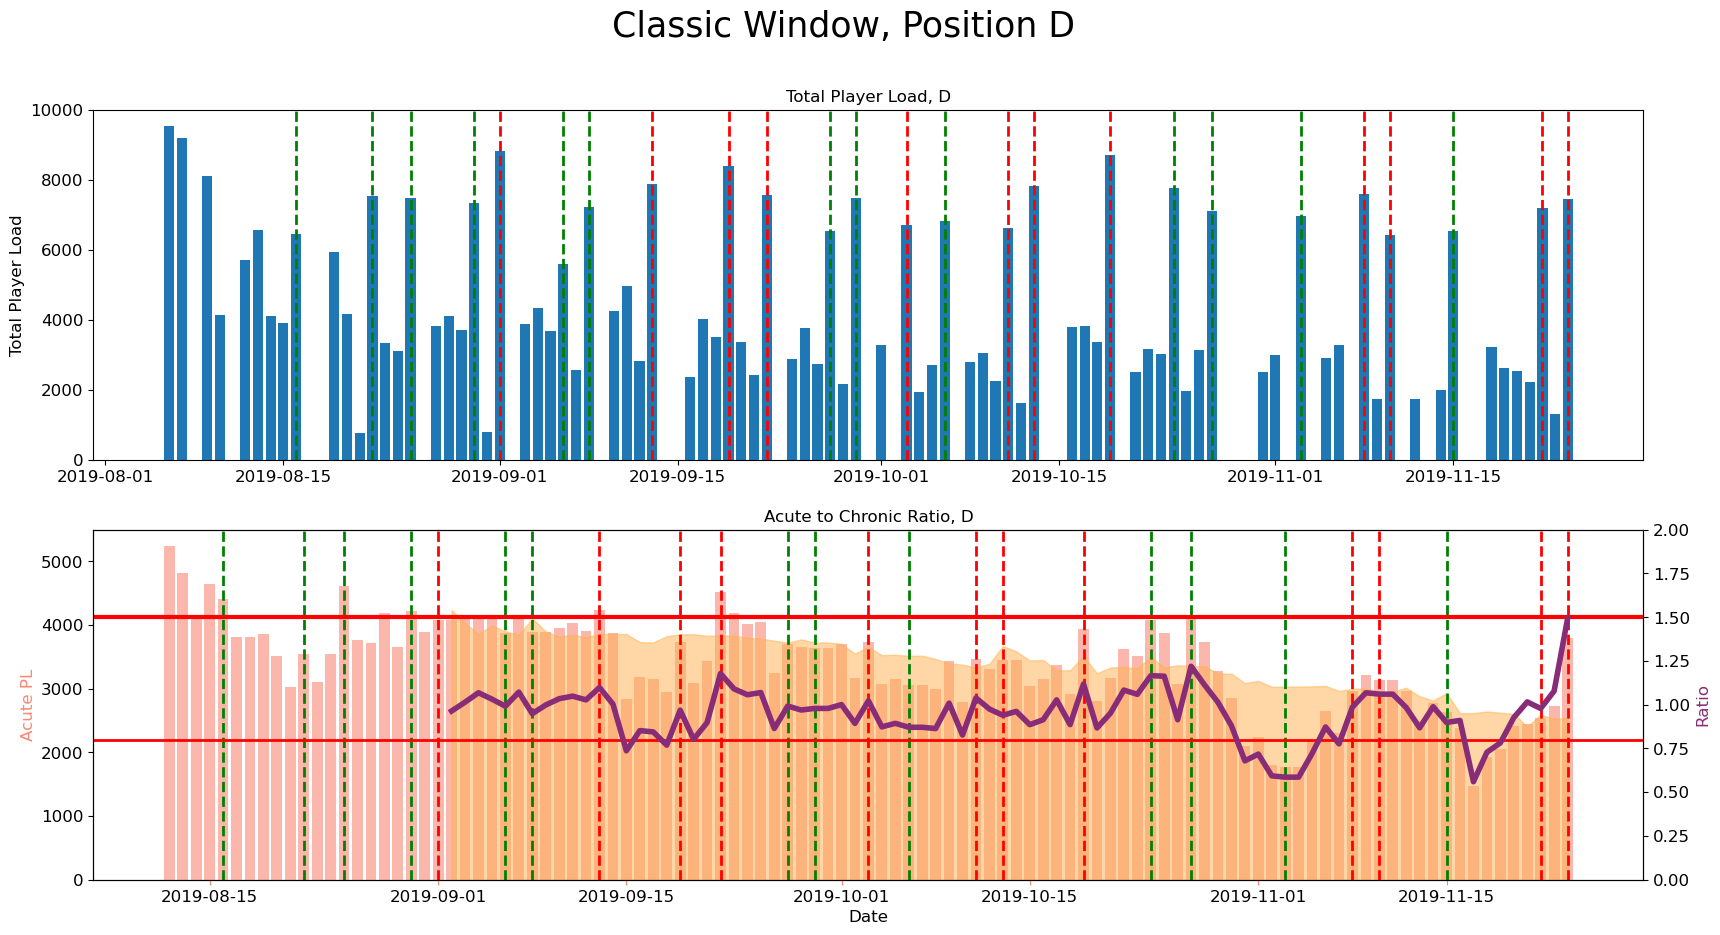

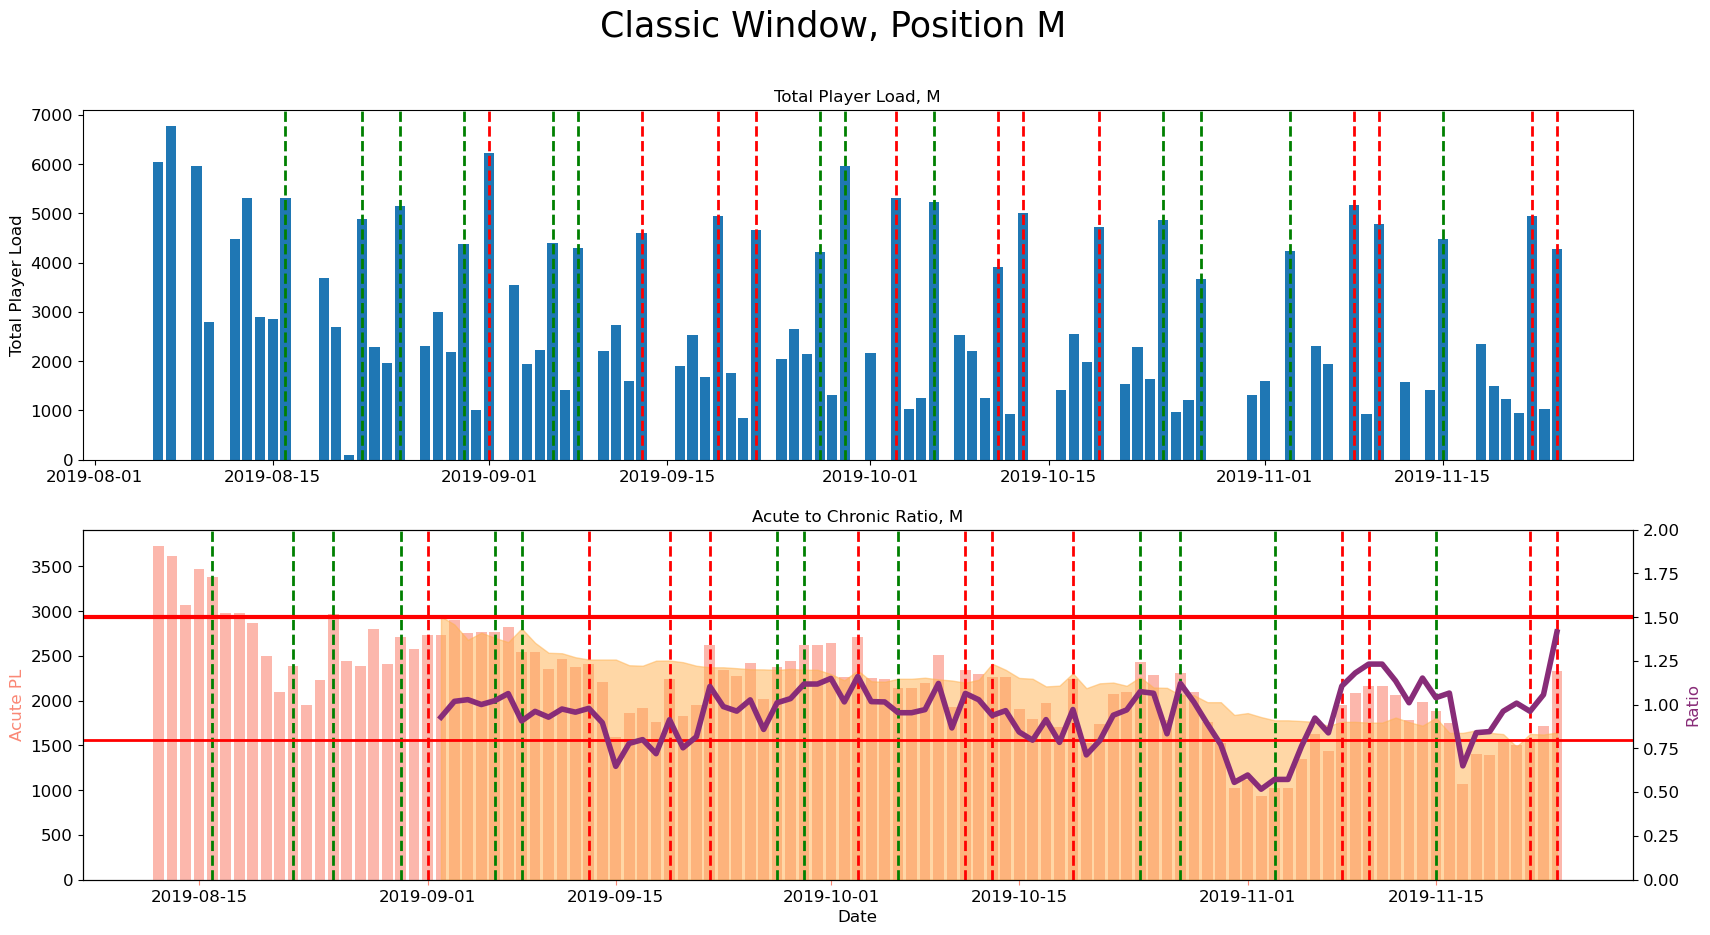

In [20]:
for i in session_df['Position.Name'].unique():
    df_position = session_df[session_df['Position.Name'] == i]
    df_position = df_position.groupby("Date").sum()
    df_position = df_position.resample('D').sum()
    df_position = df_position.infer_objects(copy=False)
    df_position.drop(columns=['Player.Name', 'Period.Name', 'Position.Name'], inplace=True)
    df_position["Acute_PL"] = (df_position.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
    df_position["Chronic_PL"] = (df_position.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
    df_position["Acute_Chronic"] = df_position.loc[:,"Acute_PL"]/df_position.loc[:,"Chronic_PL"]
    fig, axs = plt.subplots(2,figsize=(20, 10))
    fig.suptitle(f'Classic Window, Position {i}', fontsize=25)

    axs[0].bar(df_position.index, df_position["Total.Player.Load"])
    axs[0].tick_params(axis='x', labelsize=12)
    axs[0].set_ylabel('Total Player Load', fontsize=12)
    axs[0].tick_params(axis='y', labelsize=12)
    axs[0].set_title(f"Total Player Load, {i}", fontsize=12)

    # Match days
    for match_date, match_type in match_days.items():
        if match_date in df_all_classic.index:
            color = 'green' if match_type == 'Home' else 'red'
            axs[0].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
            axs[0].text

    color='#FA8775'
    axs[1].set_xlabel("Date", fontsize=12)
    axs[1].tick_params(axis='x', labelsize=12, color=color)
    axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
    axs[1].bar(df_position.index, df_position["Acute_PL"], color=color, alpha=0.6)
    axs[1].tick_params(axis='y', labelsize=12)

    color='#FFB14E'
    axs[1].fill_between(df_position.index, df_position["Chronic_PL"], color=color, alpha=0.5)
    axs[1] = plt.gca()
    axs[1].set_title(f"Acute to Chronic Ratio, {i}", fontsize=12)
    axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

    color='#882C78'
    axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
    axs1.plot(df_position.index, df_position["Acute_Chronic"], color=color, linewidth=4.0)
    axs1.tick_params(axis='y', labelsize=12)
    axs1 = plt.gca()
    axs1.set_ylim([0,2.0])
    axs1.axhline(y=1.5,c="red",linewidth=3,zorder=0)
    axs1.axhline(y=0.8,c="red",linewidth=2,zorder=0)

    # Match days
    for match_date, match_type in match_days.items():
        if match_date in df_all_classic.index:
            color = 'green' if match_type == 'Home' else 'red'
            axs[1].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
            axs[1].text(match_date, axs[1].get_ylim()[1], '', rotation=90, verticalalignment='bottom', color=color, fontsize=10)

    # Save the figures
    plt.savefig(f'Images/Classic_Window_Position_{i}.png')

plt.show()

#### 3.2.2 Graphs with Alternative Window

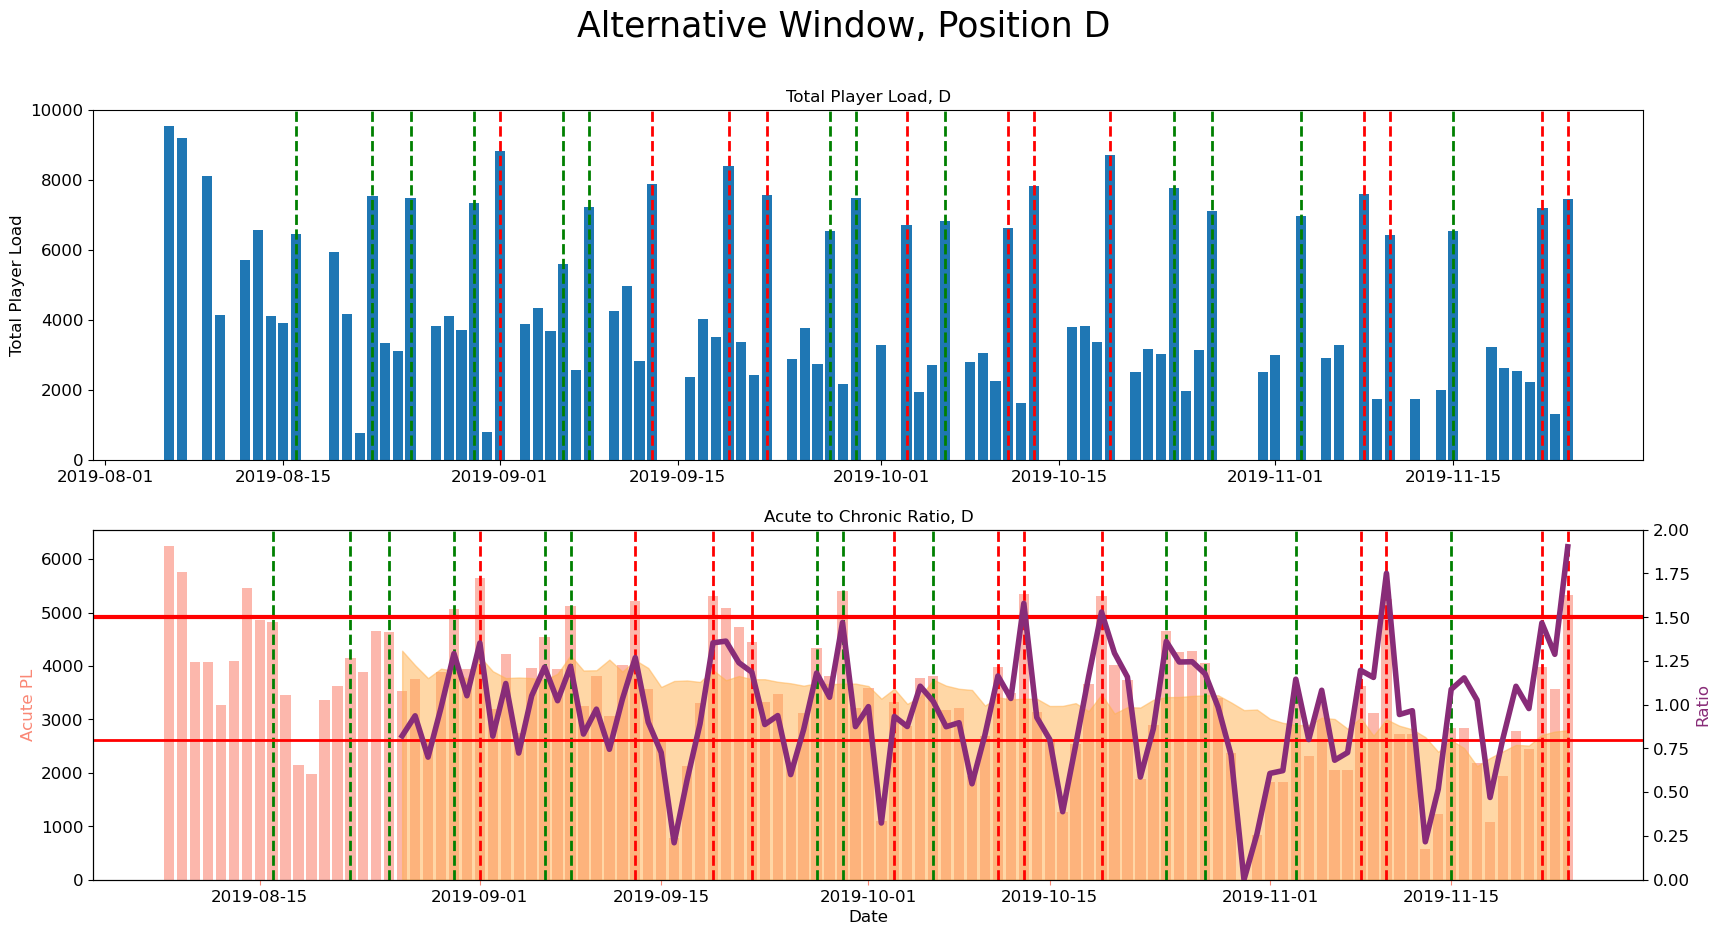

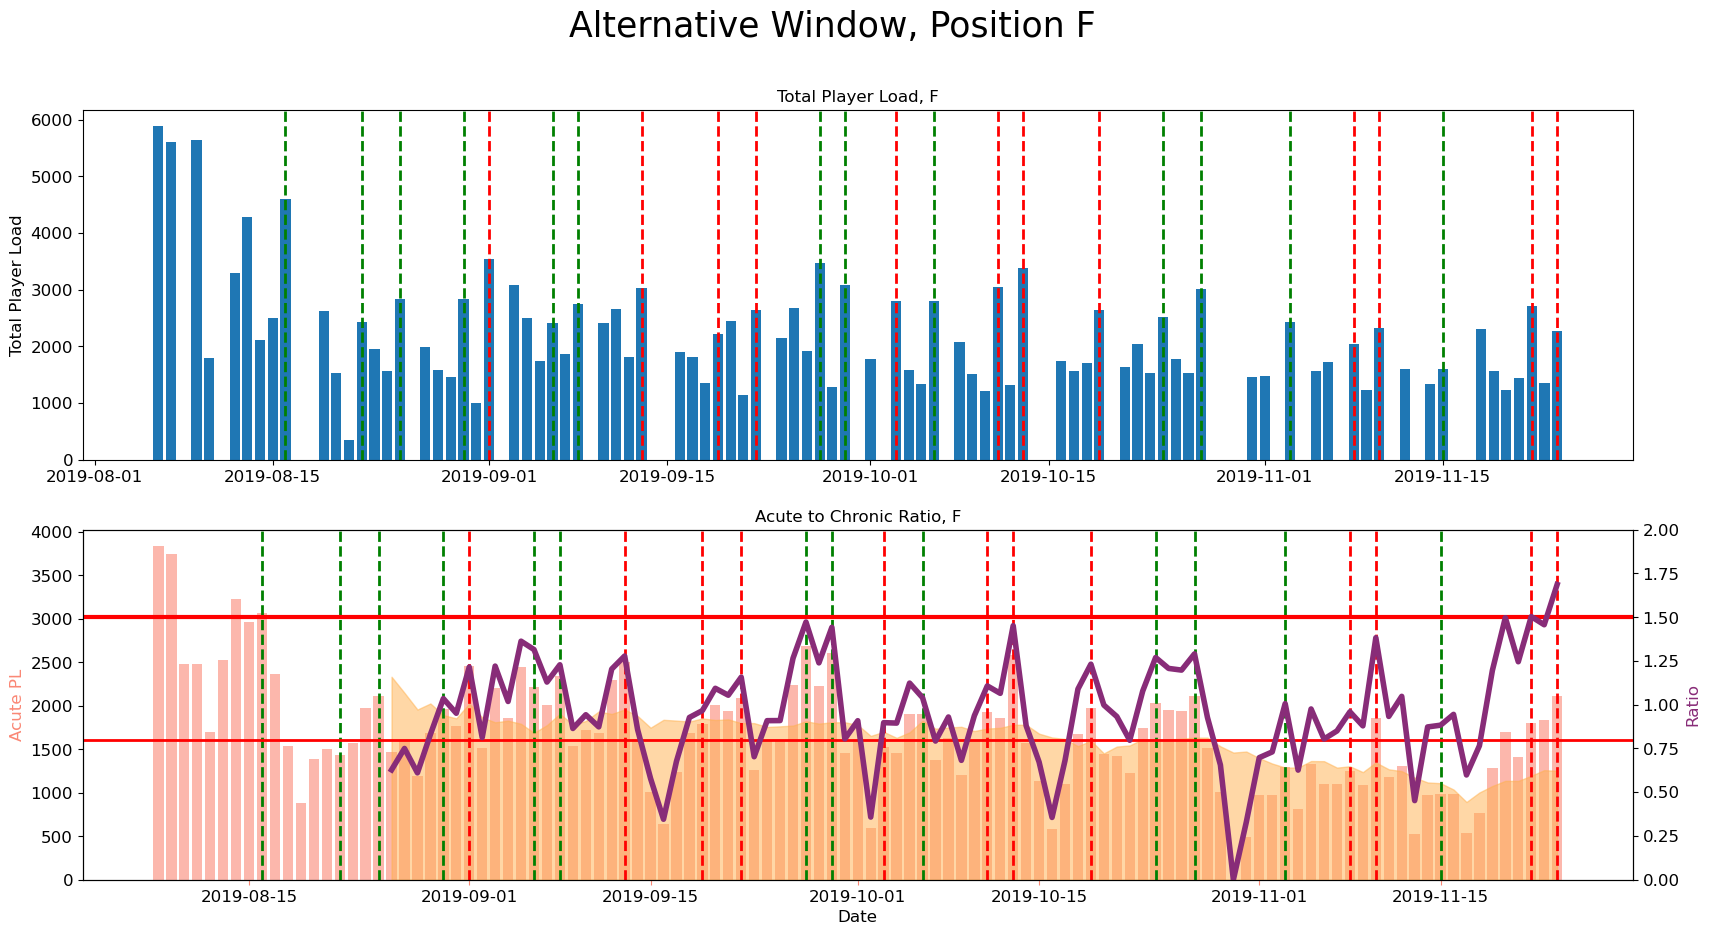

In [21]:
for i in session_df['Position.Name'].unique():
    df_position = session_df[session_df['Position.Name'] == i]
    df_position = df_position.groupby("Date").sum()
    df_position = df_position.resample('D').sum()
    df_position = df_position.infer_objects(copy=False)
    df_position.drop(columns=['Player.Name', 'Period.Name', 'Position.Name'], inplace=True)
    df_position["Acute_PL"] = (df_position.loc[:,"Total.Player.Load"].rolling('3D', 3).sum())/3
    df_position["Chronic_PL"] = (df_position.loc[:,"Total.Player.Load"].rolling('21D', 21).sum())/21
    df_position["Acute_Chronic"] = df_position.loc[:,"Acute_PL"]/df_position.loc[:,"Chronic_PL"]
    fig, axs = plt.subplots(2,figsize=(20, 10))
    fig.suptitle(f'Alternative Window, Position {i}', fontsize=25)

    axs[0].bar(df_position.index, df_position["Total.Player.Load"])
    axs[0].tick_params(axis='x', labelsize=12)
    axs[0].set_ylabel('Total Player Load', fontsize=12)
    axs[0].tick_params(axis='y', labelsize=12)
    axs[0].set_title(f"Total Player Load, {i}", fontsize=12)

    # Match days
    for match_date, match_type in match_days.items():
        if match_date in df_all_classic.index:
            color = 'green' if match_type == 'Home' else 'red'
            axs[0].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
        axs[0].text

    color='#FA8775'
    axs[1].set_xlabel("Date", fontsize=12)
    axs[1].tick_params(axis='x', labelsize=12, color=color)
    axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
    axs[1].bar(df_position.index, df_position["Acute_PL"], color=color, alpha=0.6)
    axs[1].tick_params(axis='y', labelsize=12)

    color='#FFB14E'
    axs[1].fill_between(df_position.index, df_position["Chronic_PL"], color=color, alpha=0.5)
    axs[1] = plt.gca()
    axs[1].set_title(f"Acute to Chronic Ratio, {i}", fontsize=12)
    axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

    color='#882C78'
    axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
    axs1.plot(df_position.index, df_position["Acute_Chronic"], color=color, linewidth=4.0)
    axs1.tick_params(axis='y', labelsize=12)
    axs1 = plt.gca()
    axs1.set_ylim([0,2.0])
    axs1.axhline(y=1.5,c="red",linewidth=3,zorder=0)
    axs1.axhline(y=0.8,c="red",linewidth=2,zorder=0)

    # Match days
    for match_date, match_type in match_days.items():
        if match_date in df_all_classic.index:
            color = 'green' if match_type == 'Home' else 'red'
            axs[1].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
            axs[1].text(match_date, axs[1].get_ylim()[1], '', rotation=90, verticalalignment='bottom', color=color, fontsize=10)

    # Save the figures
    plt.savefig(f'Images/Alternative_Window_Position_{i}.png')

plt.show()

#### 3.3 Individual Graphs

#### 3.3.1 Graphs with Classic Window

C:\Users\lasm1\AppData\Local\Temp\ipykernel_156652\1568411792.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2,figsize=(20, 10))


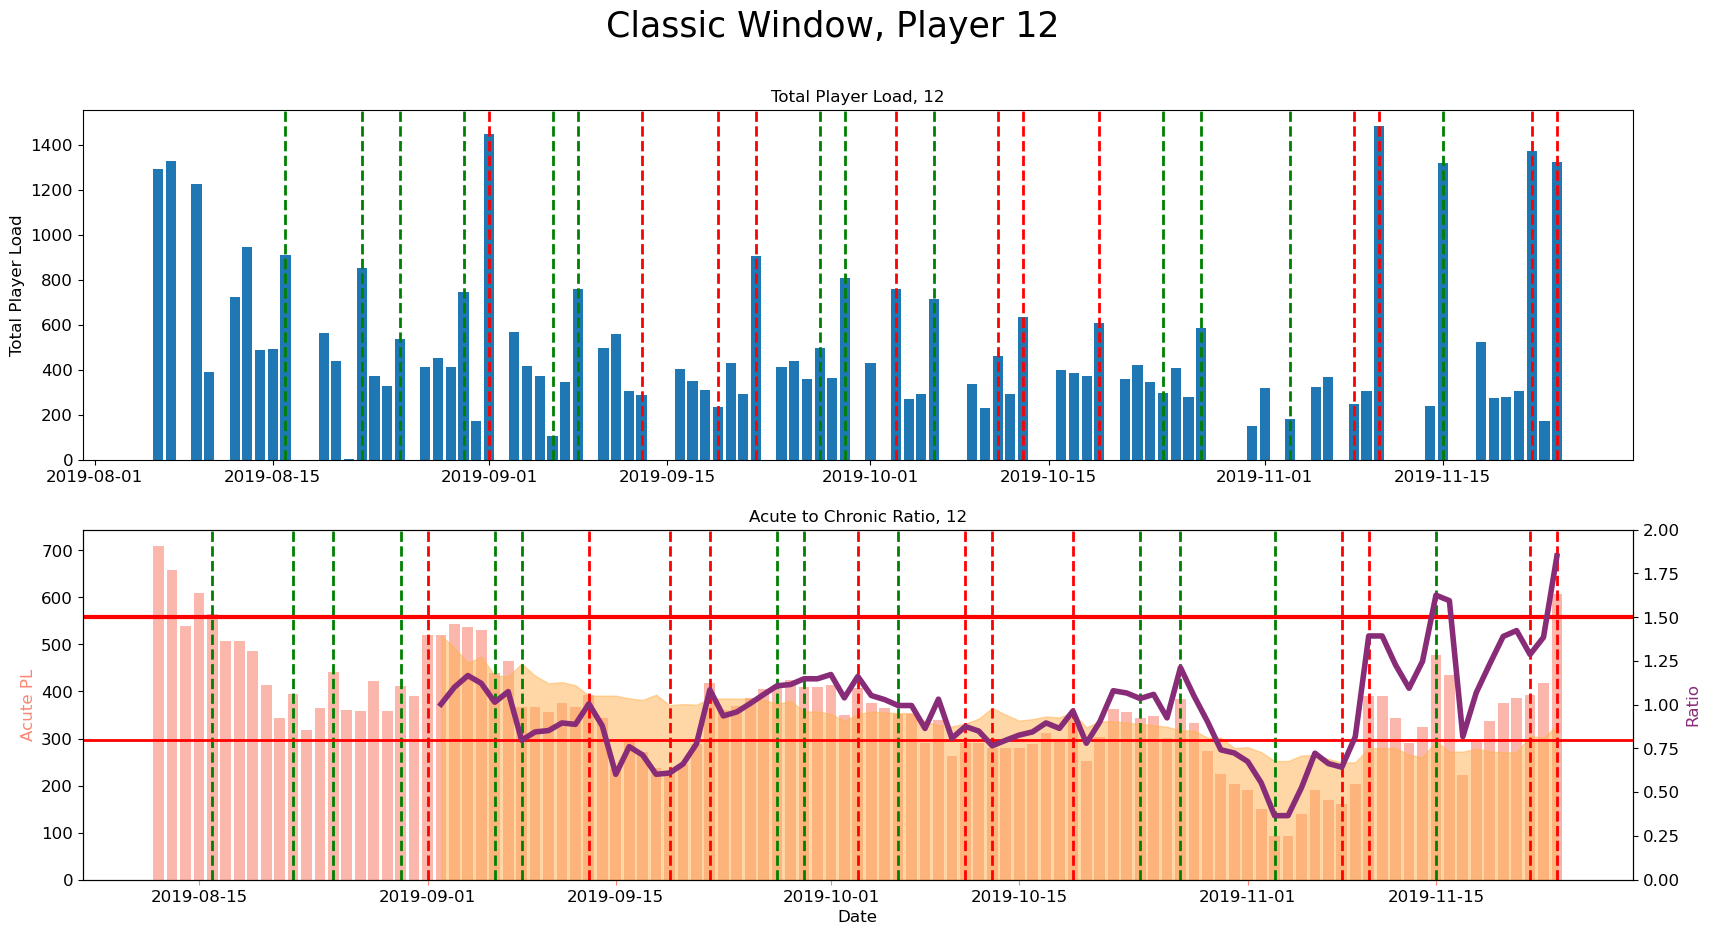

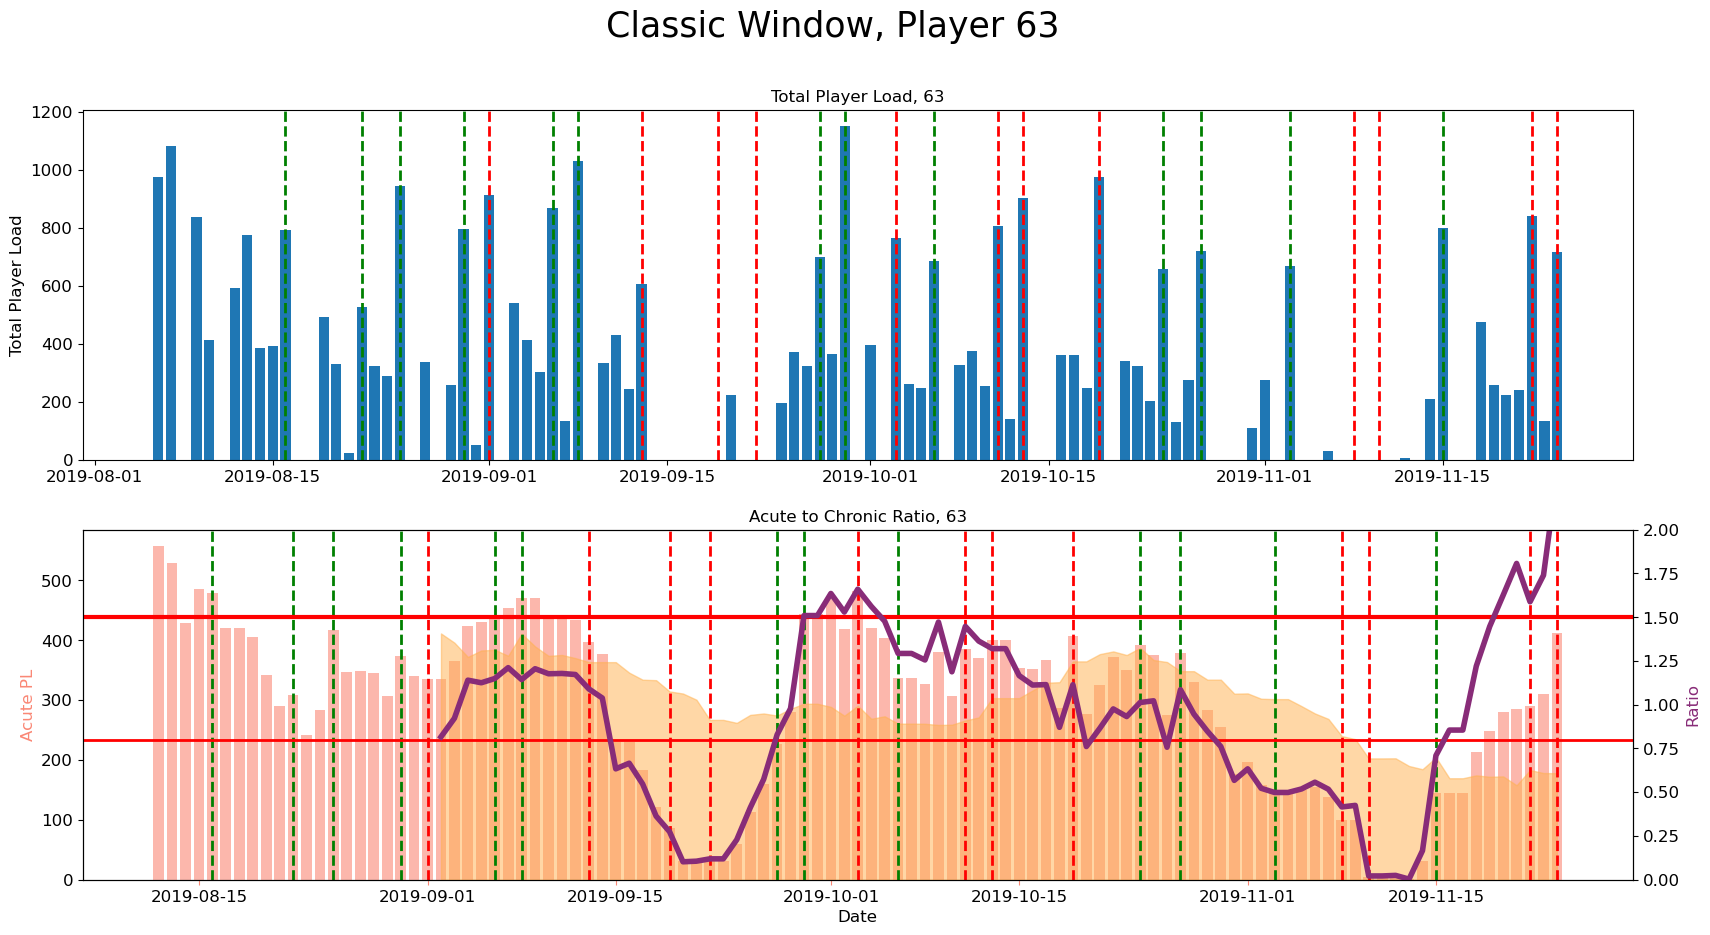

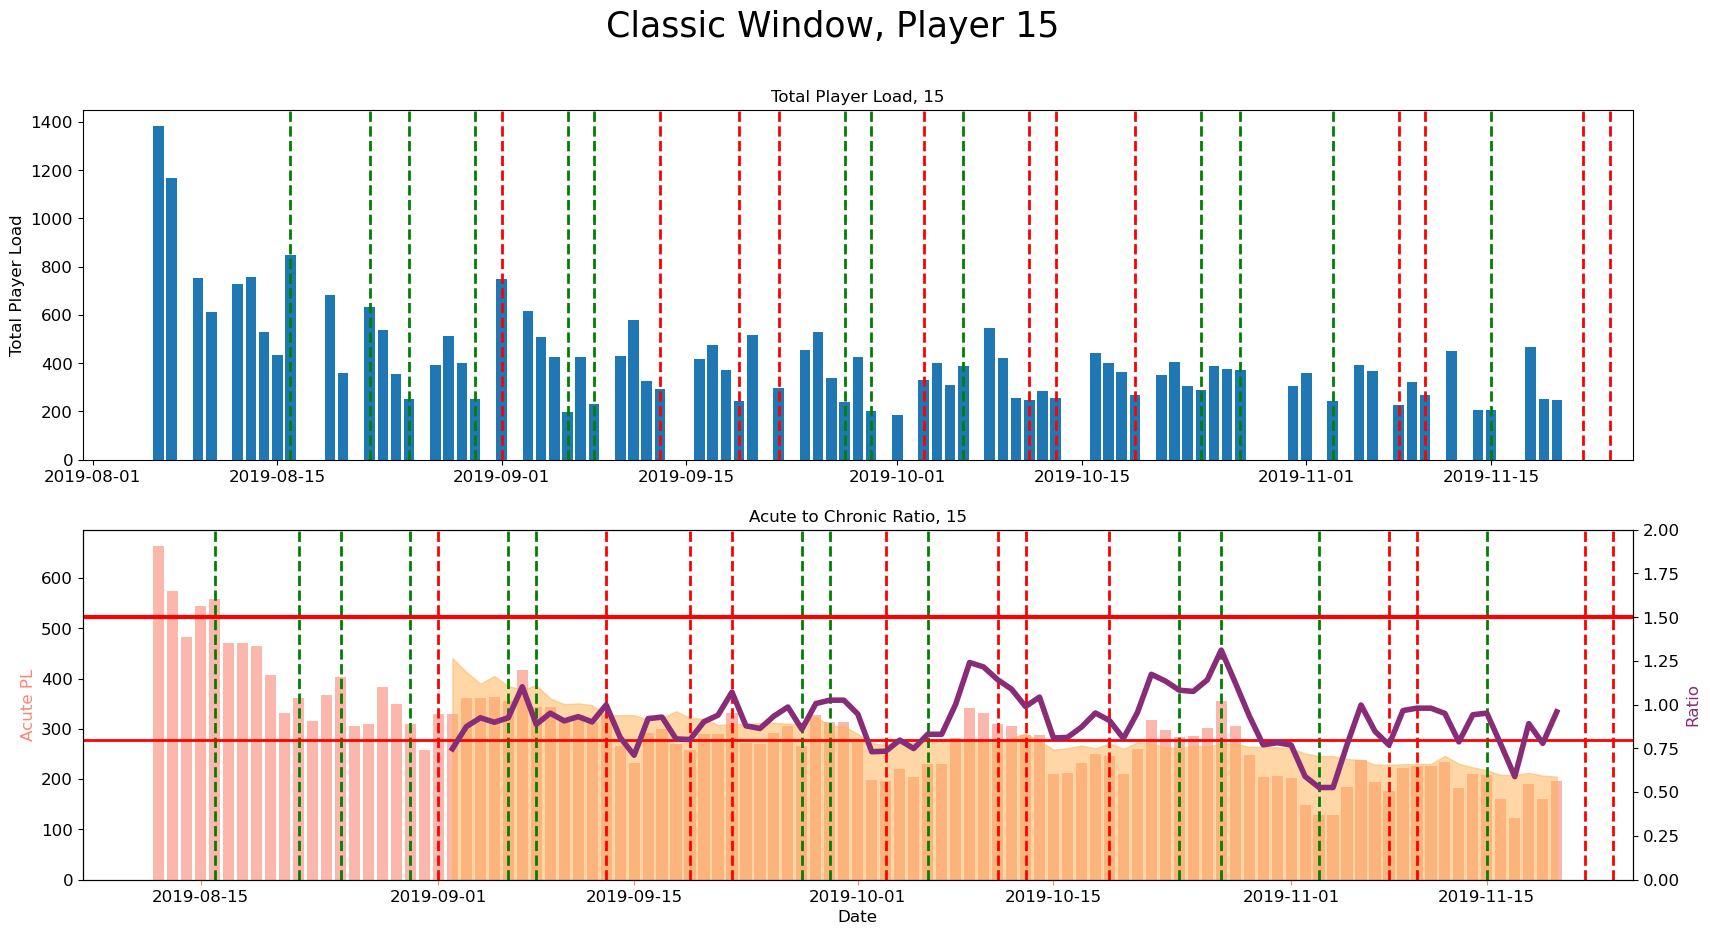

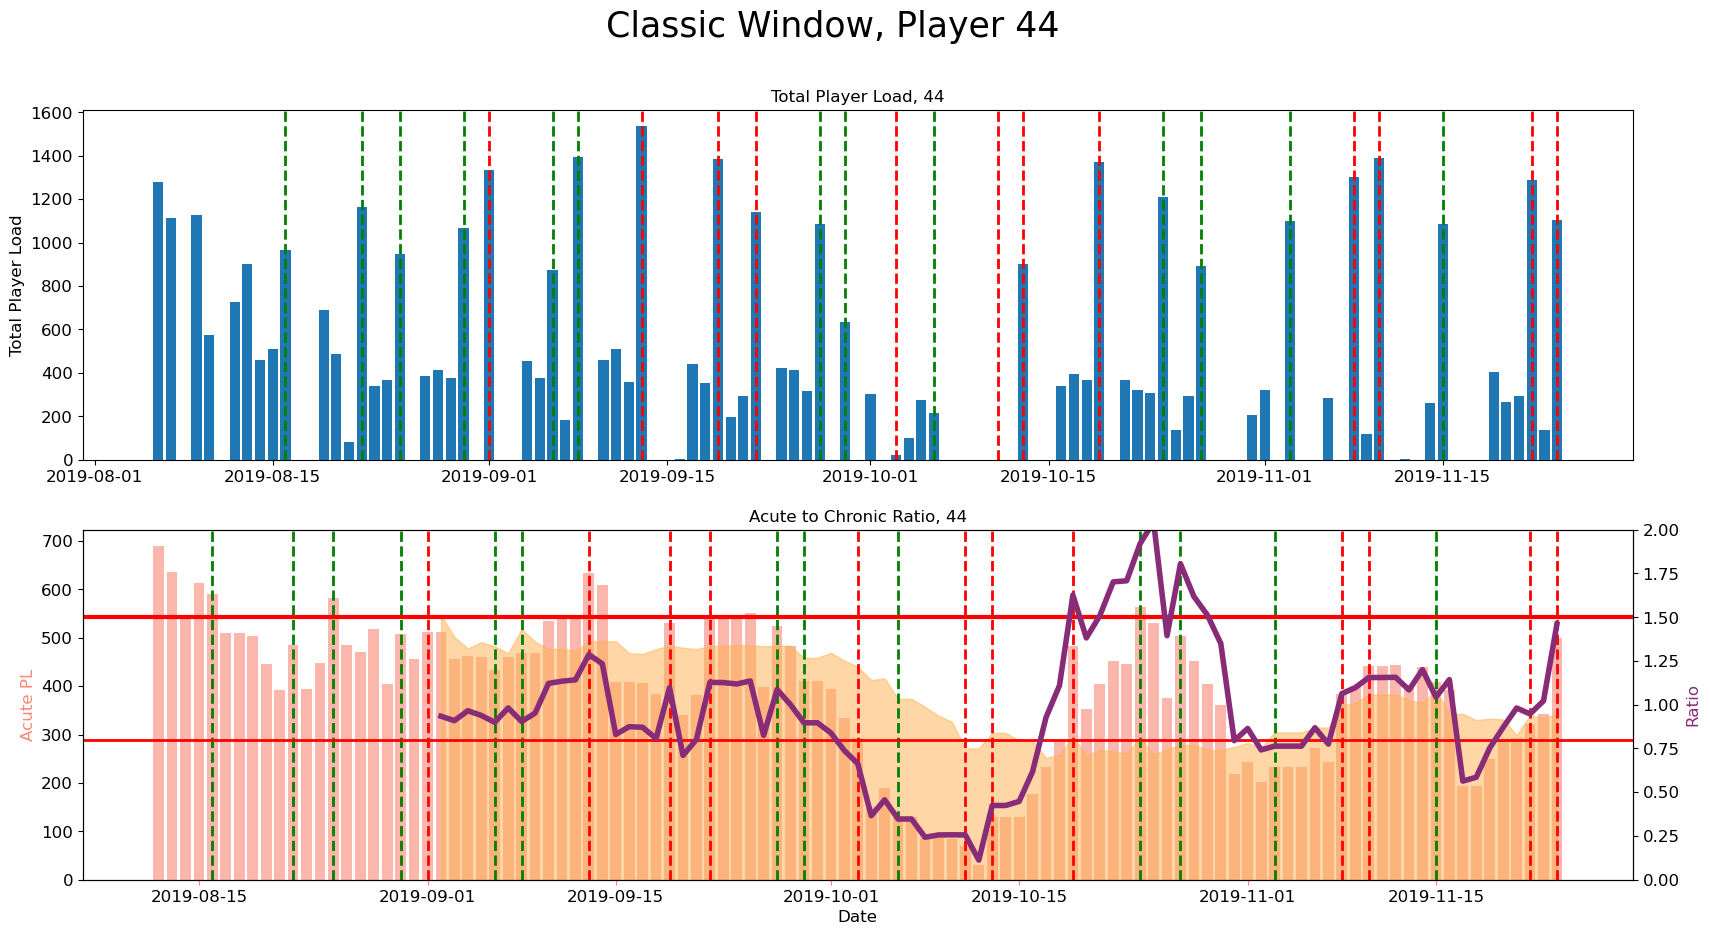

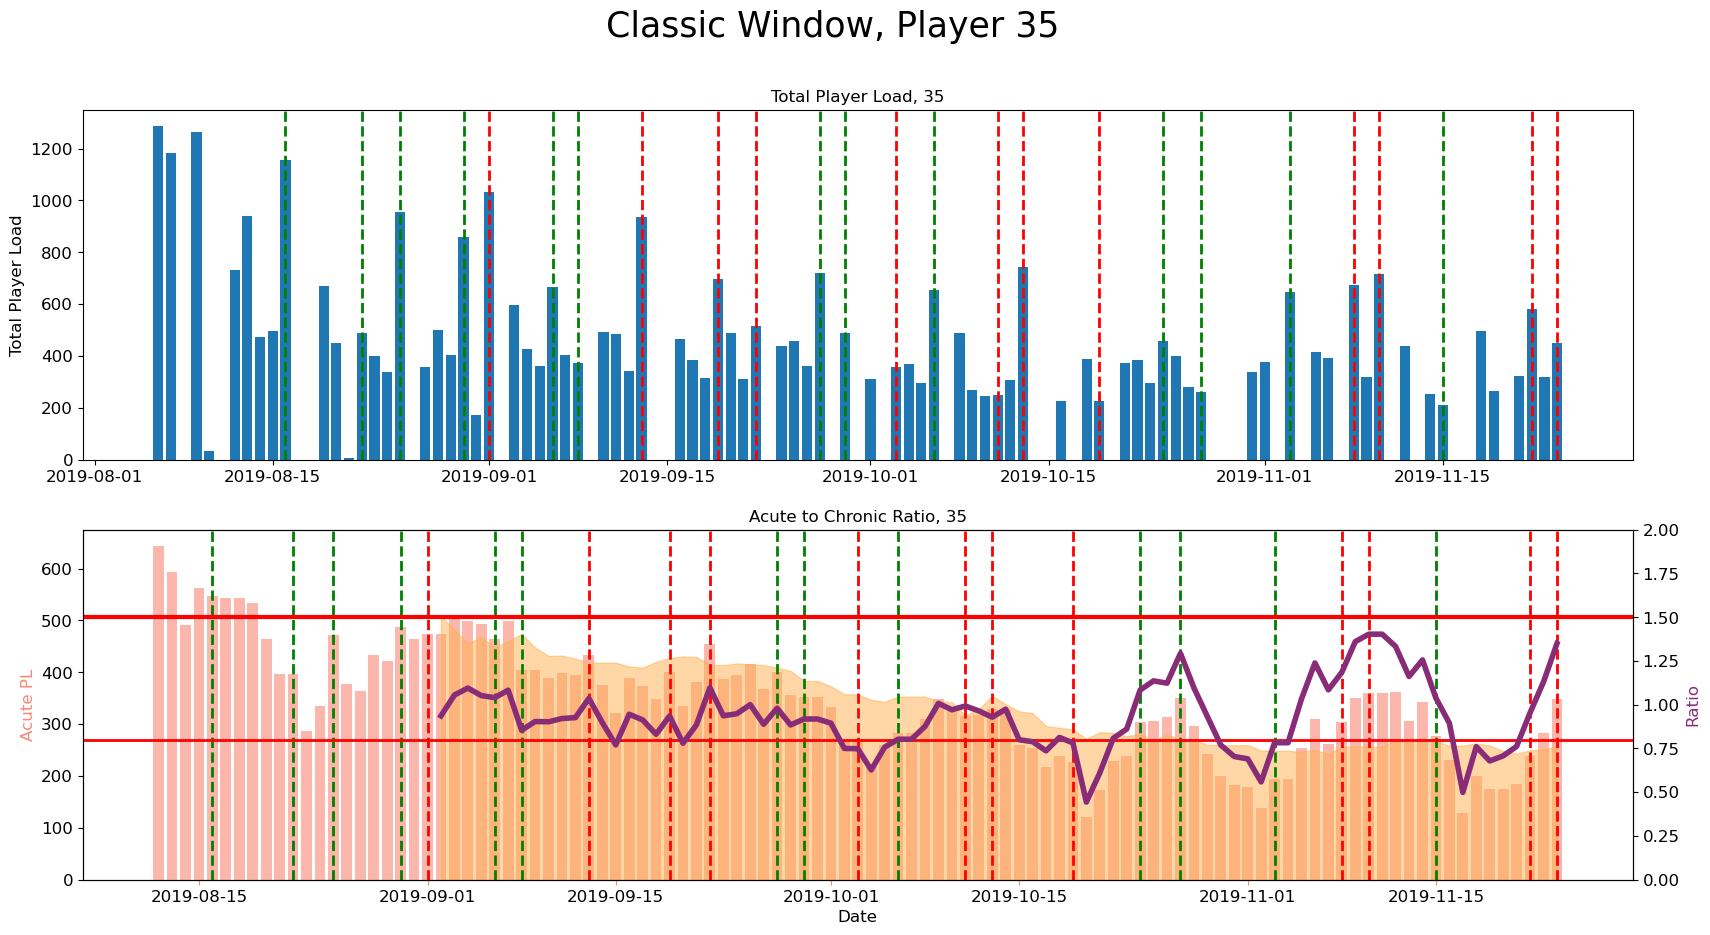

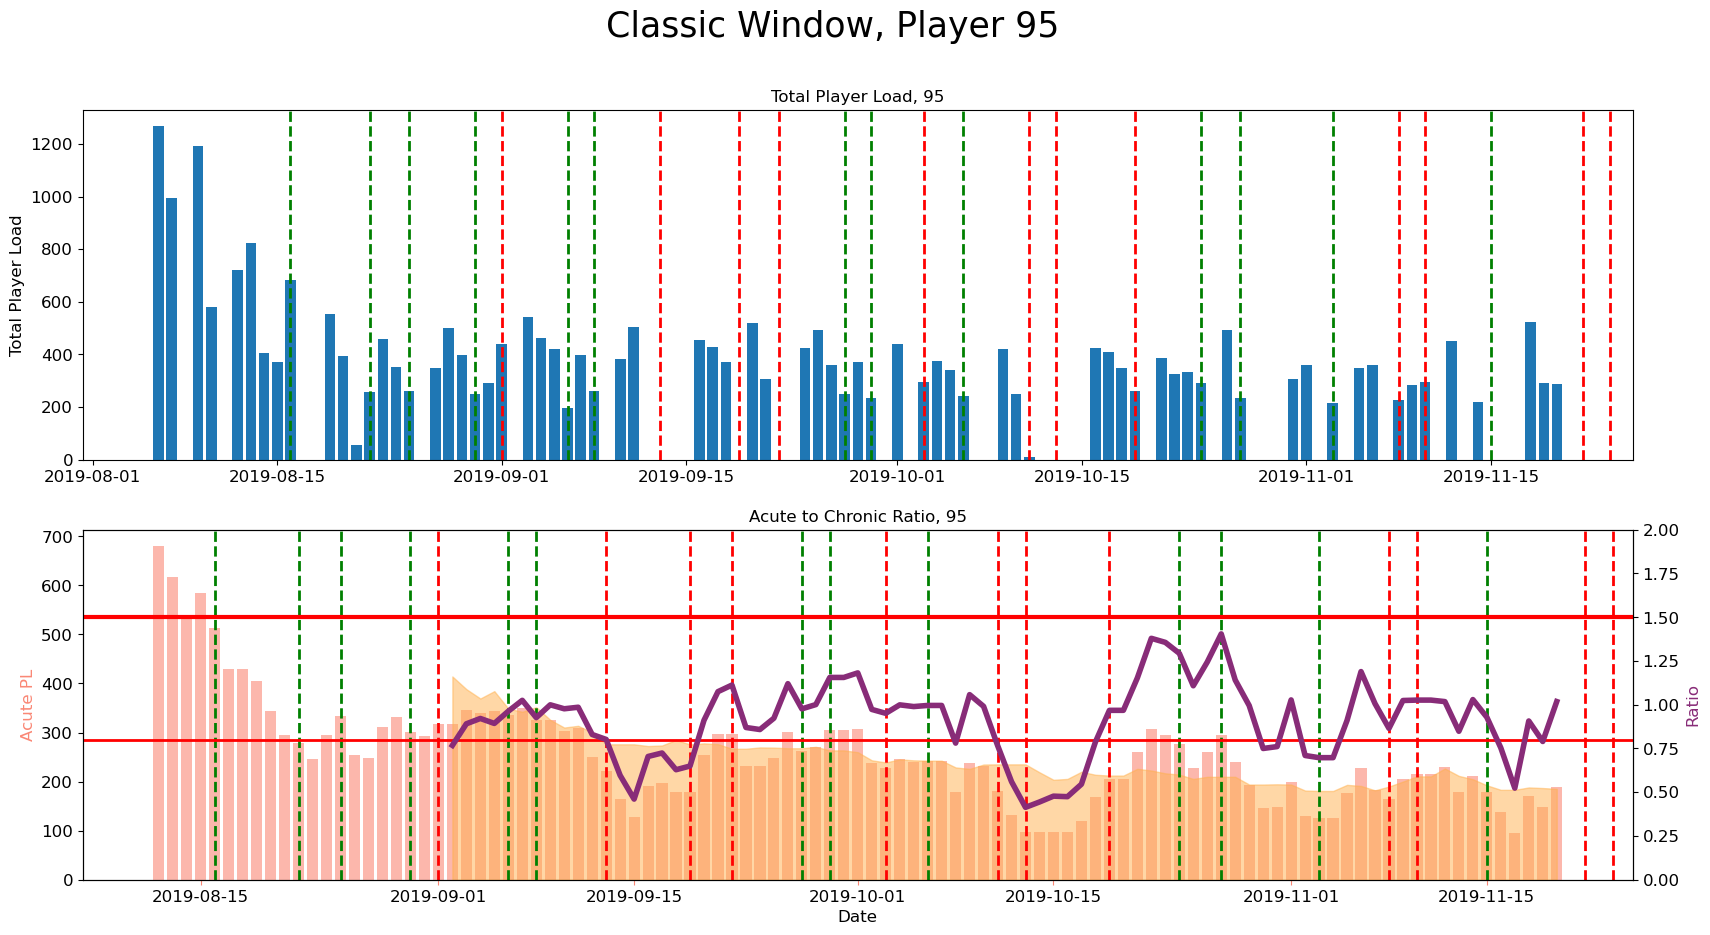

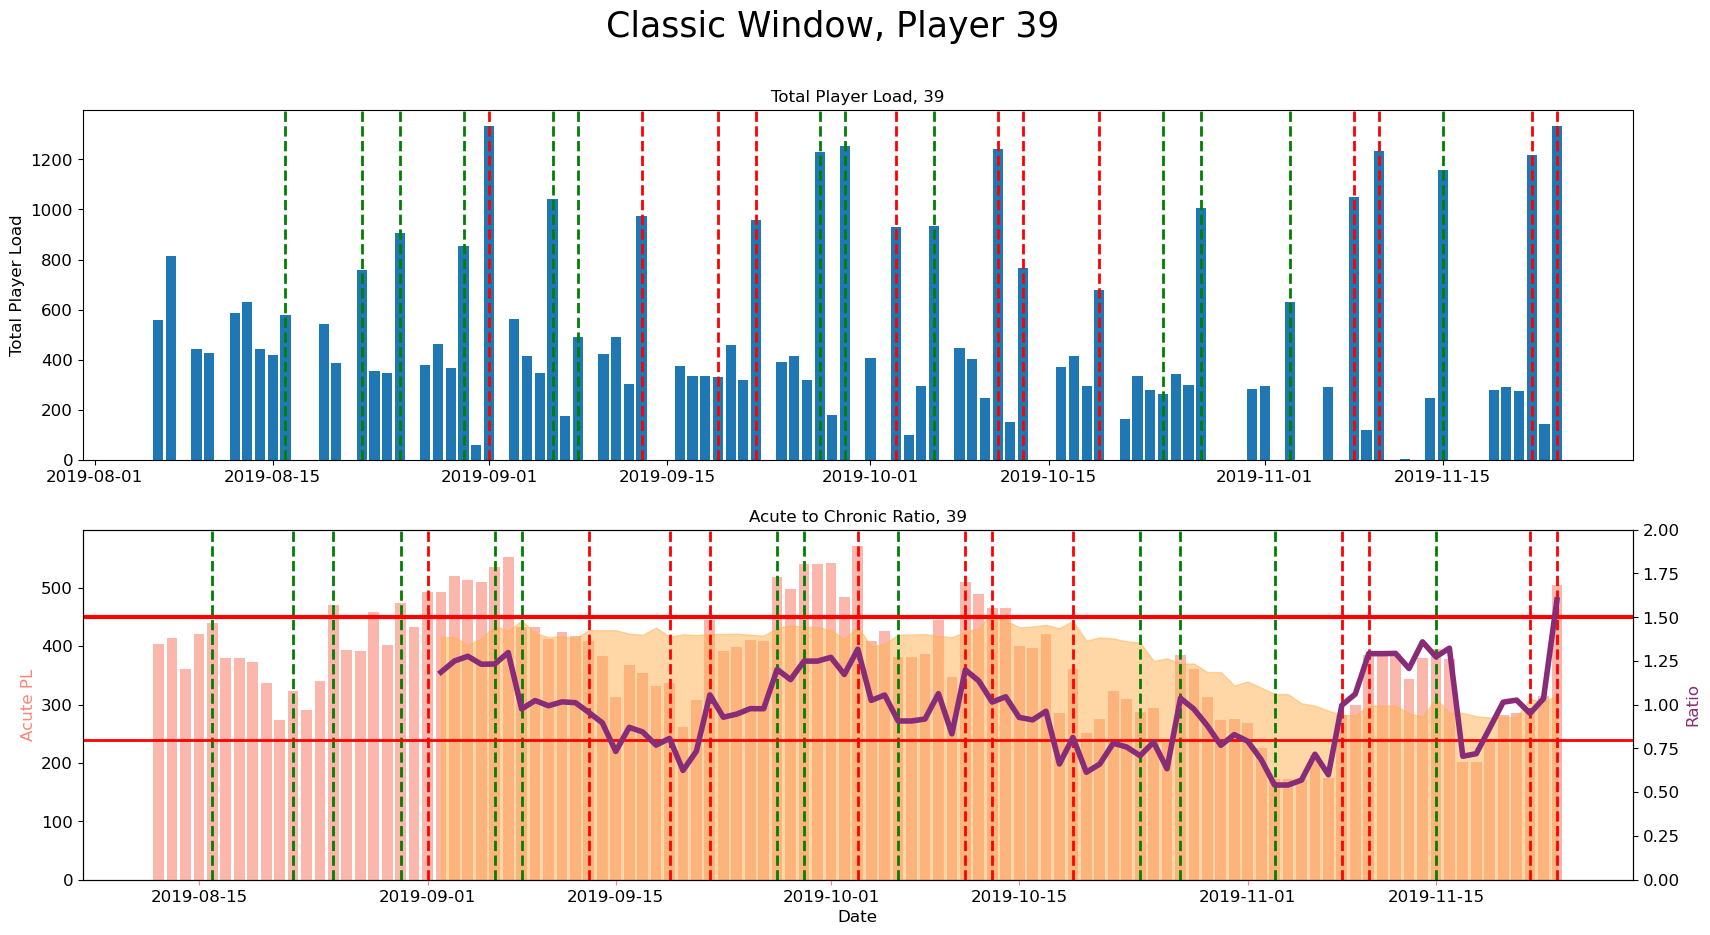

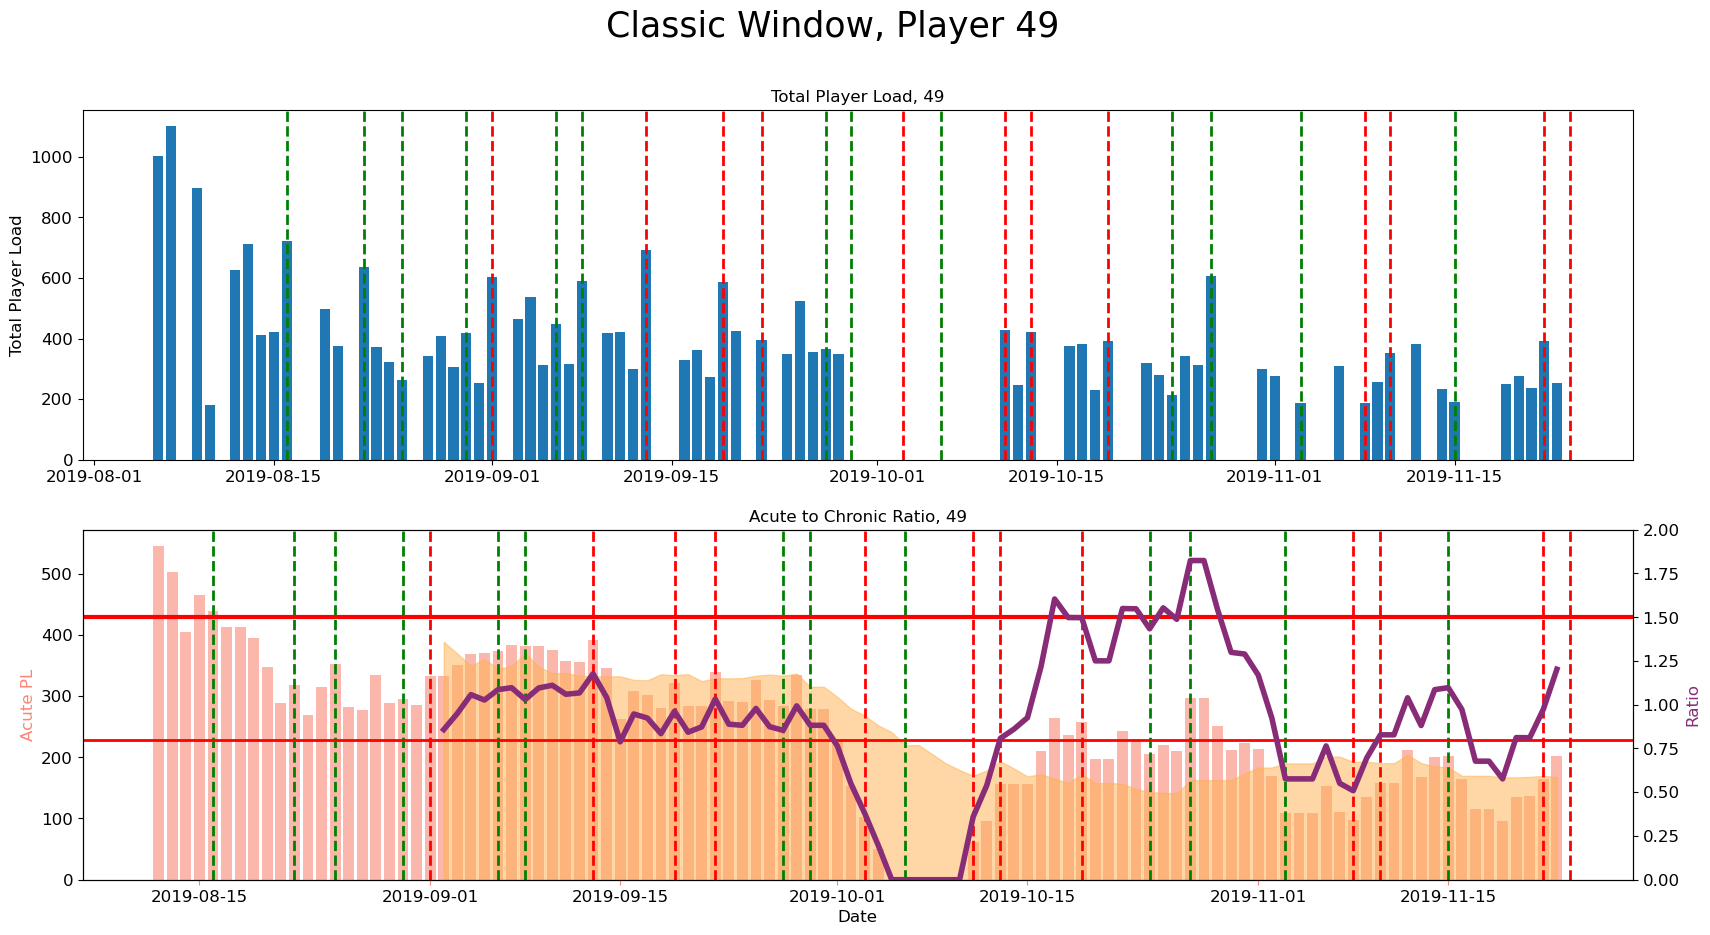

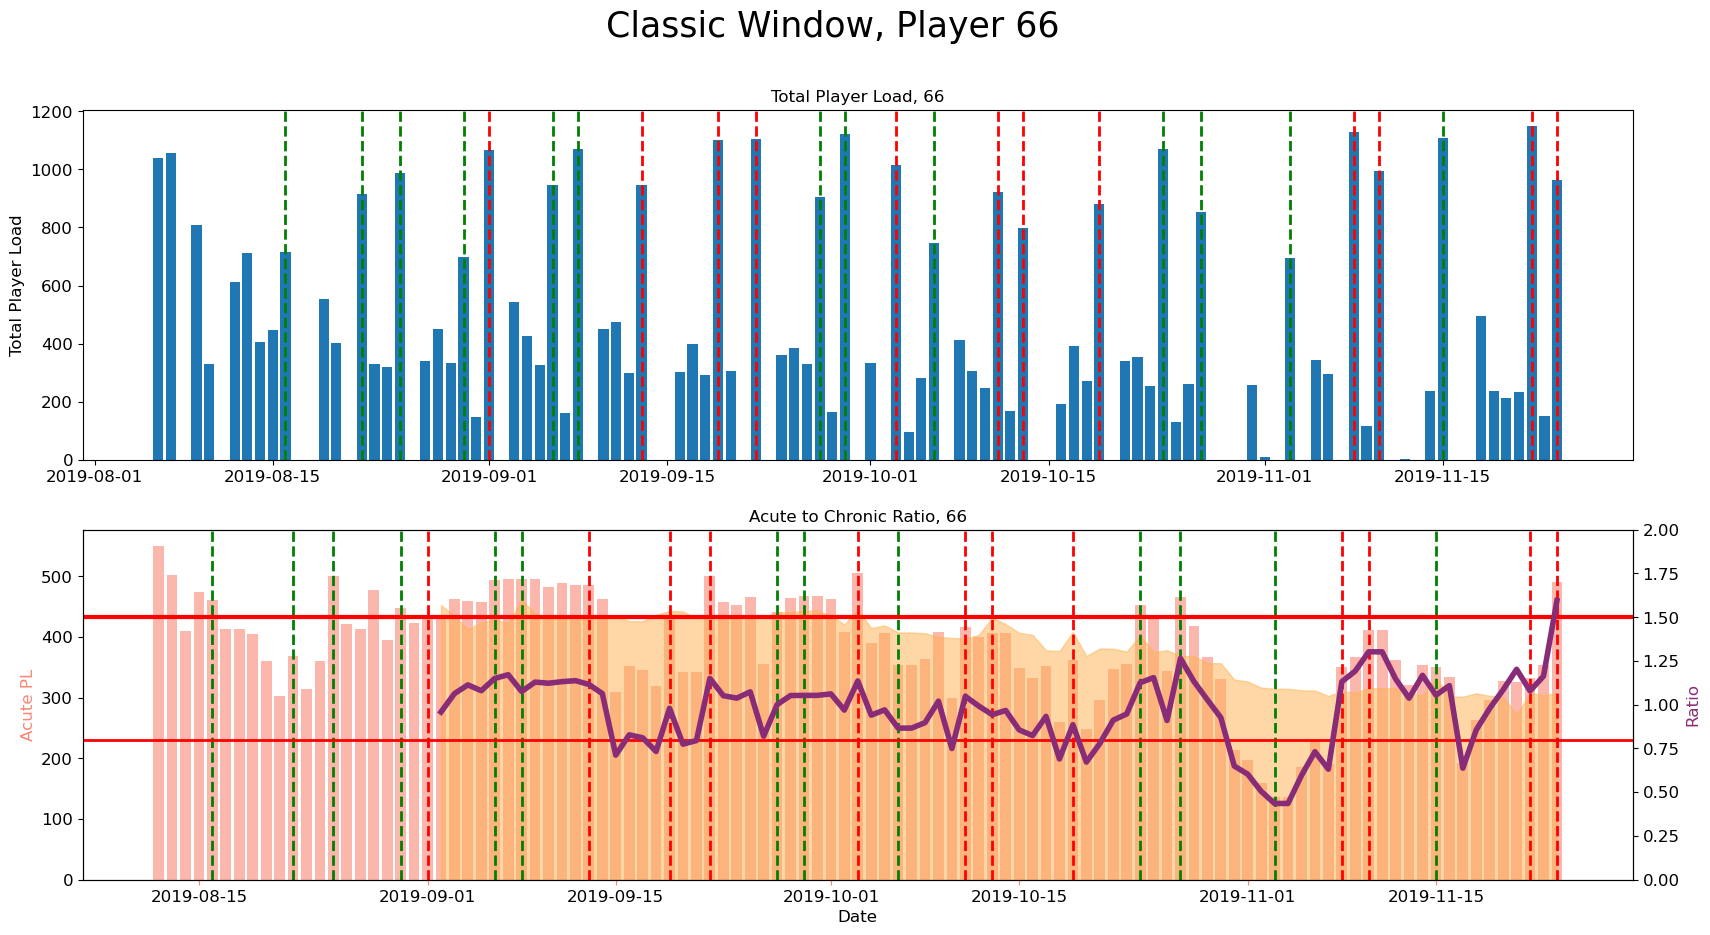

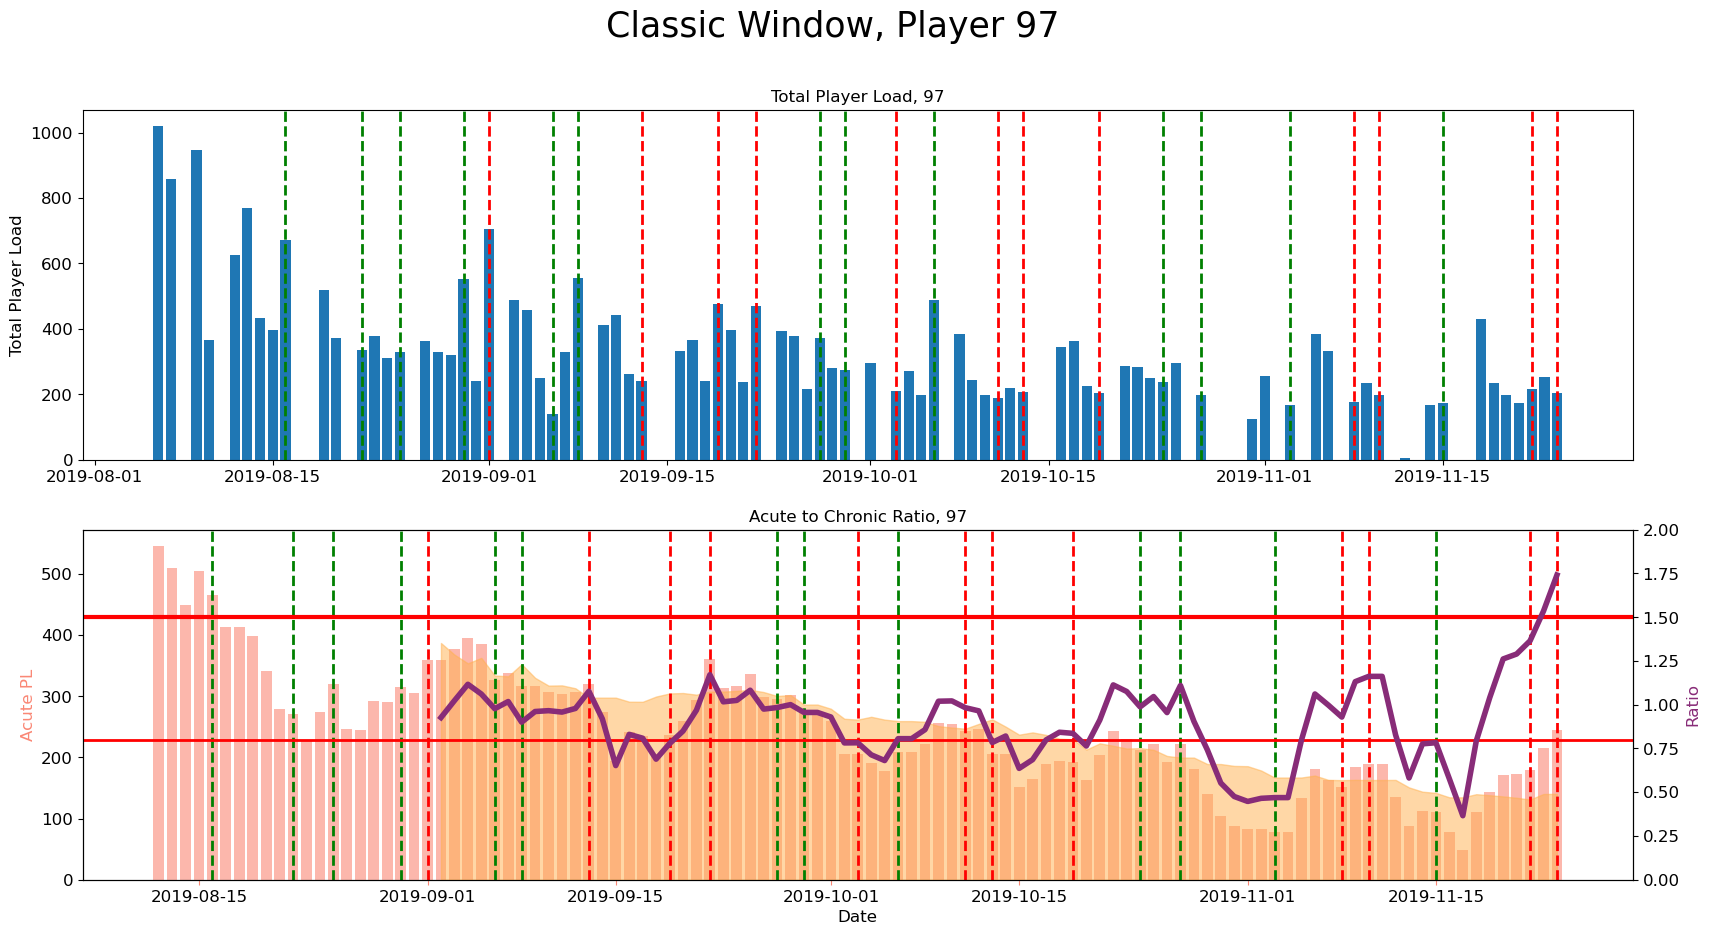

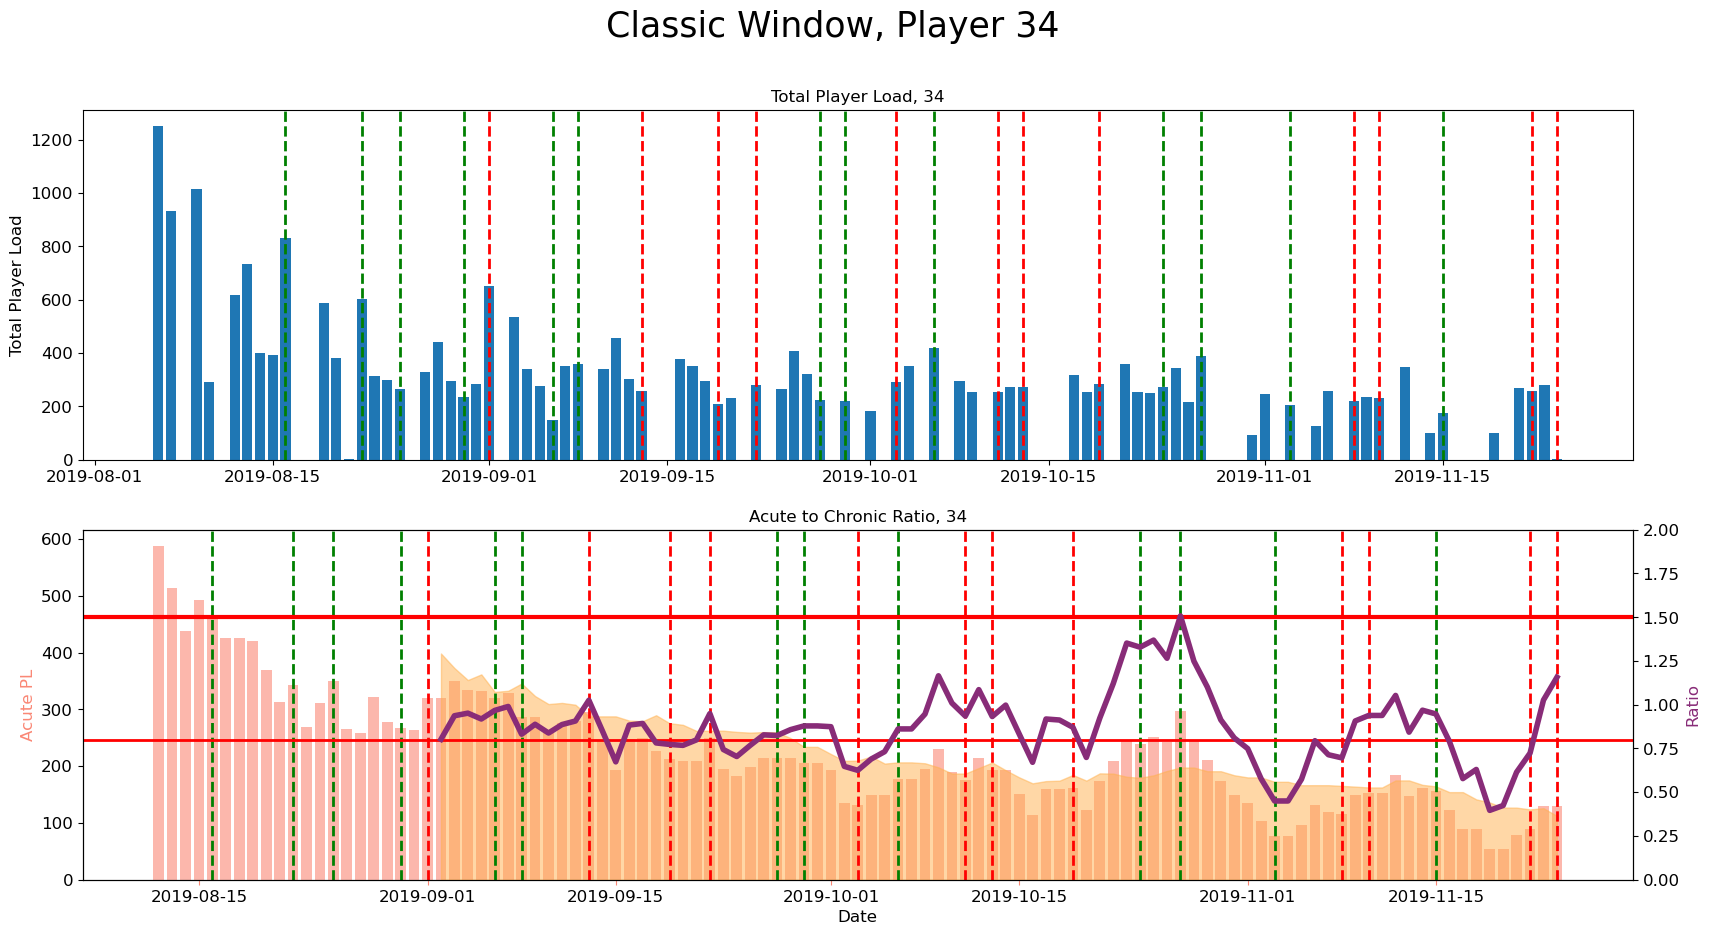

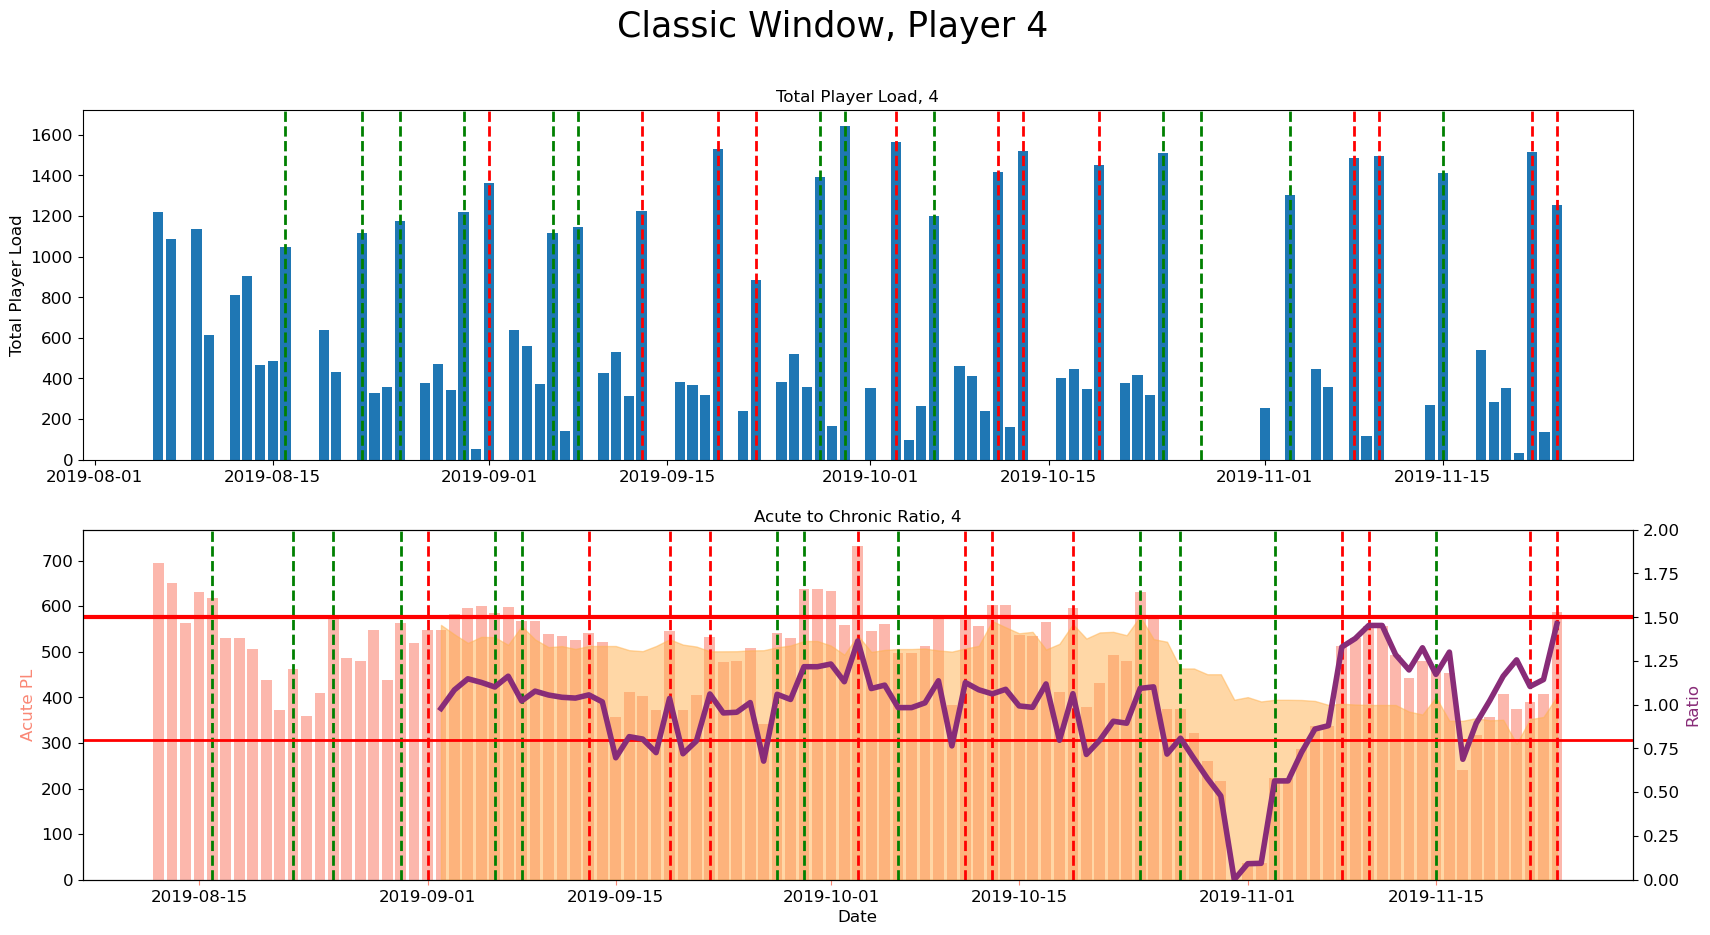

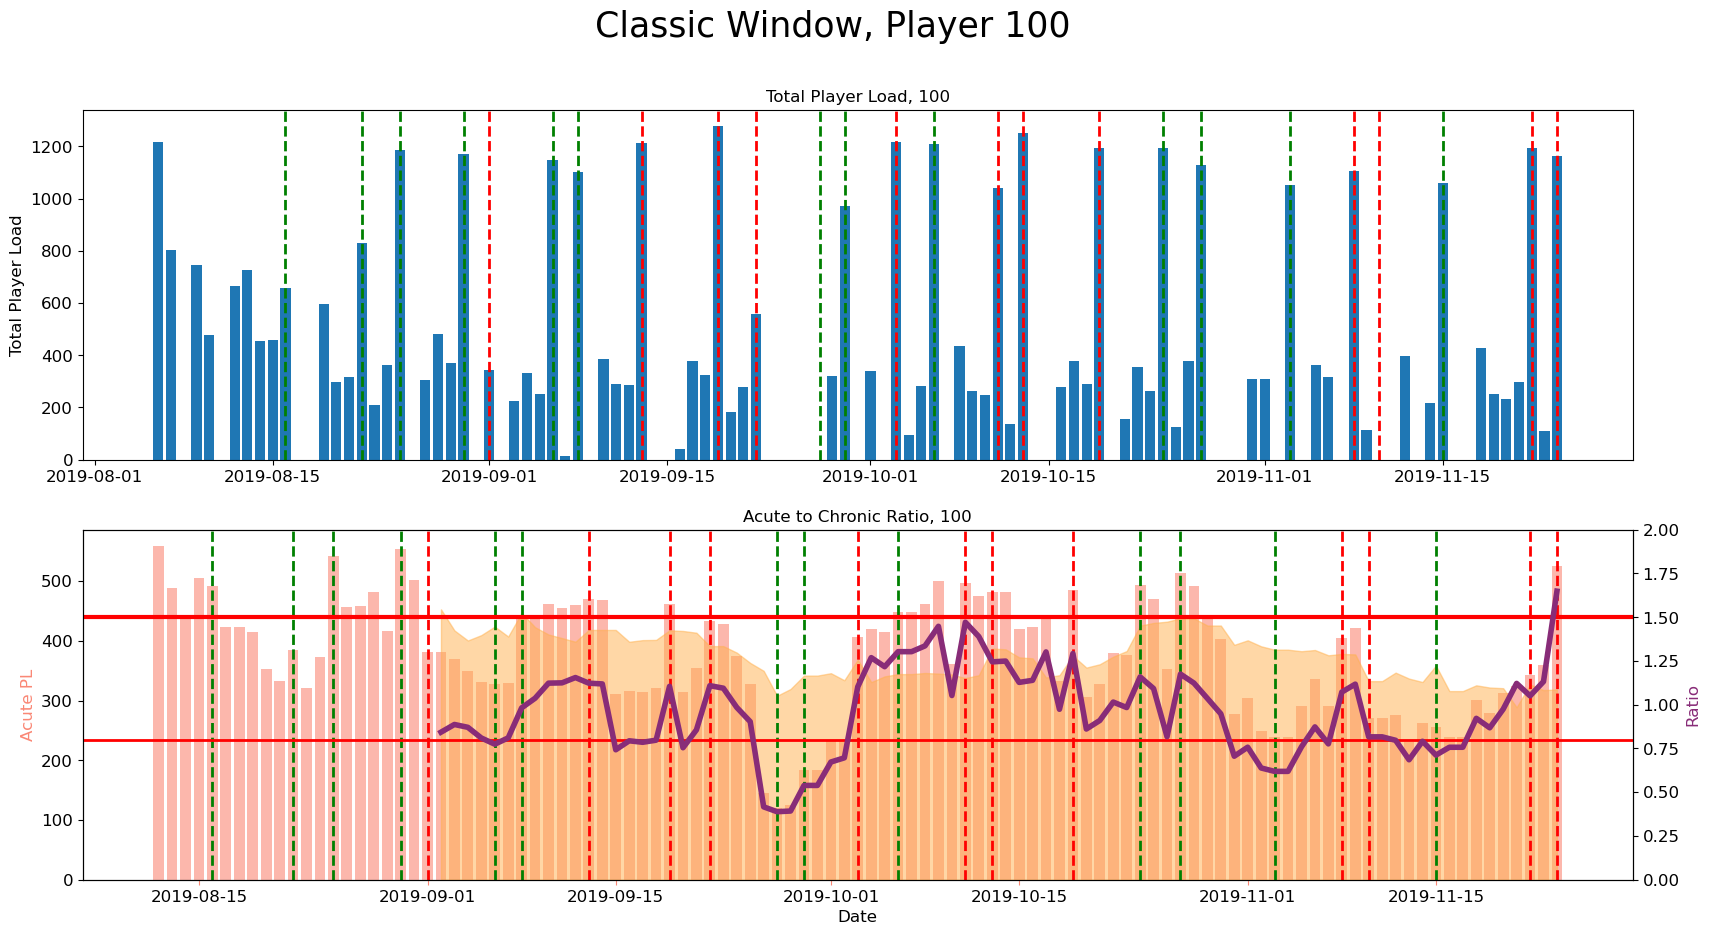

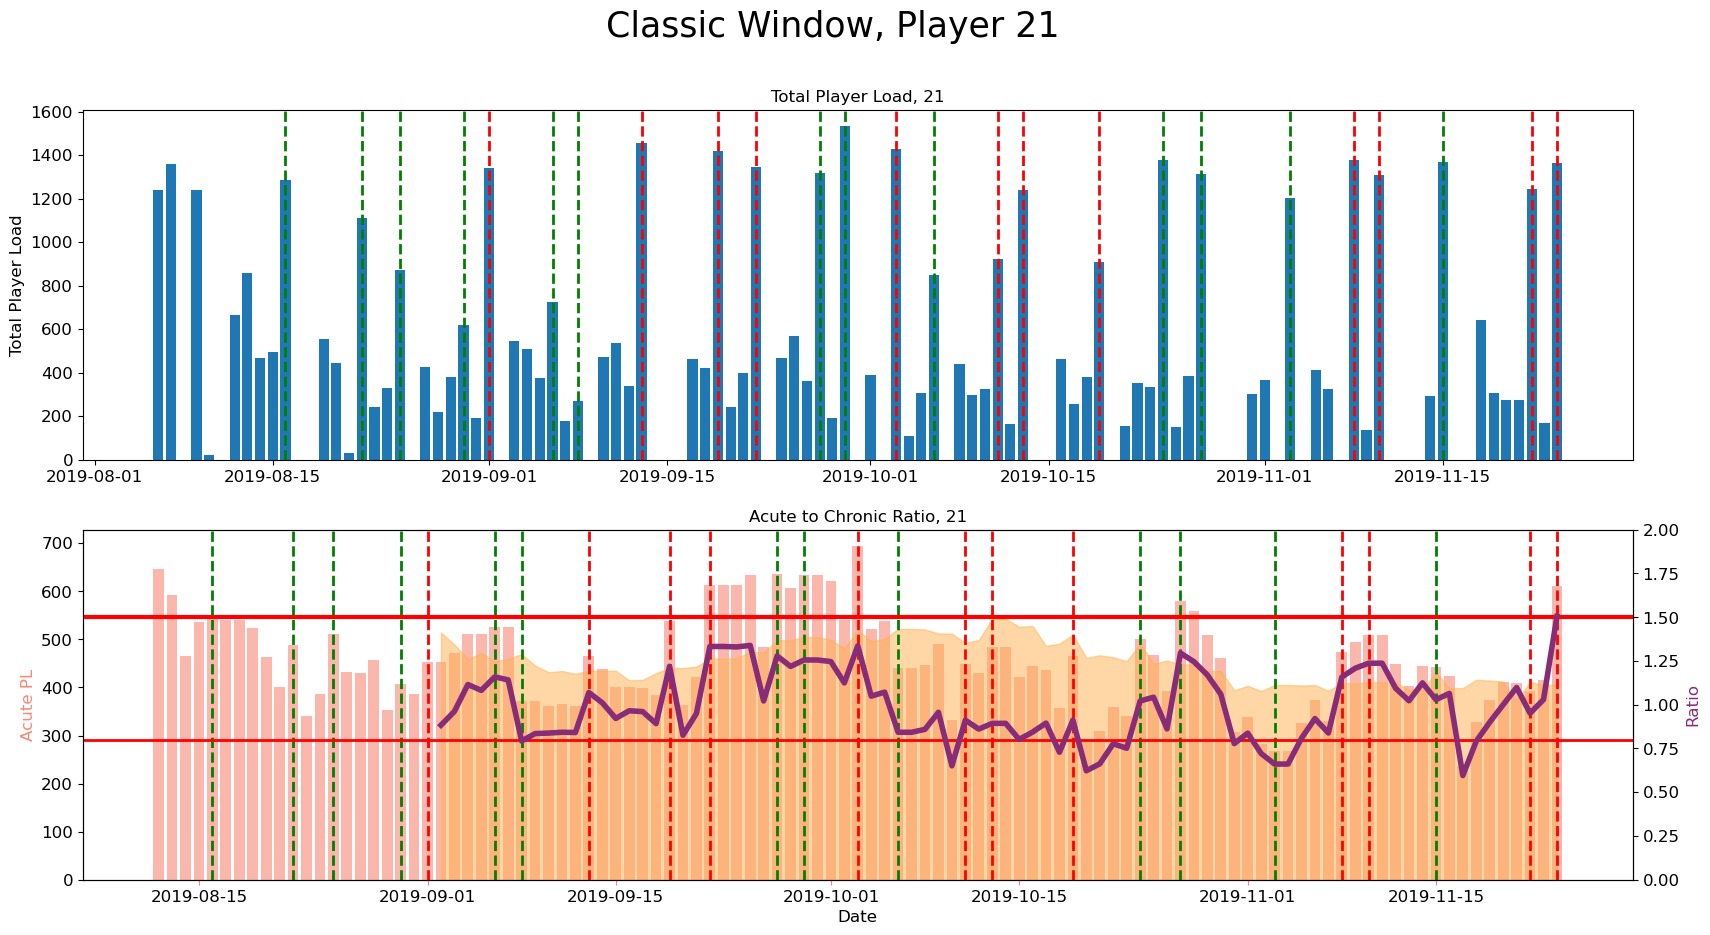

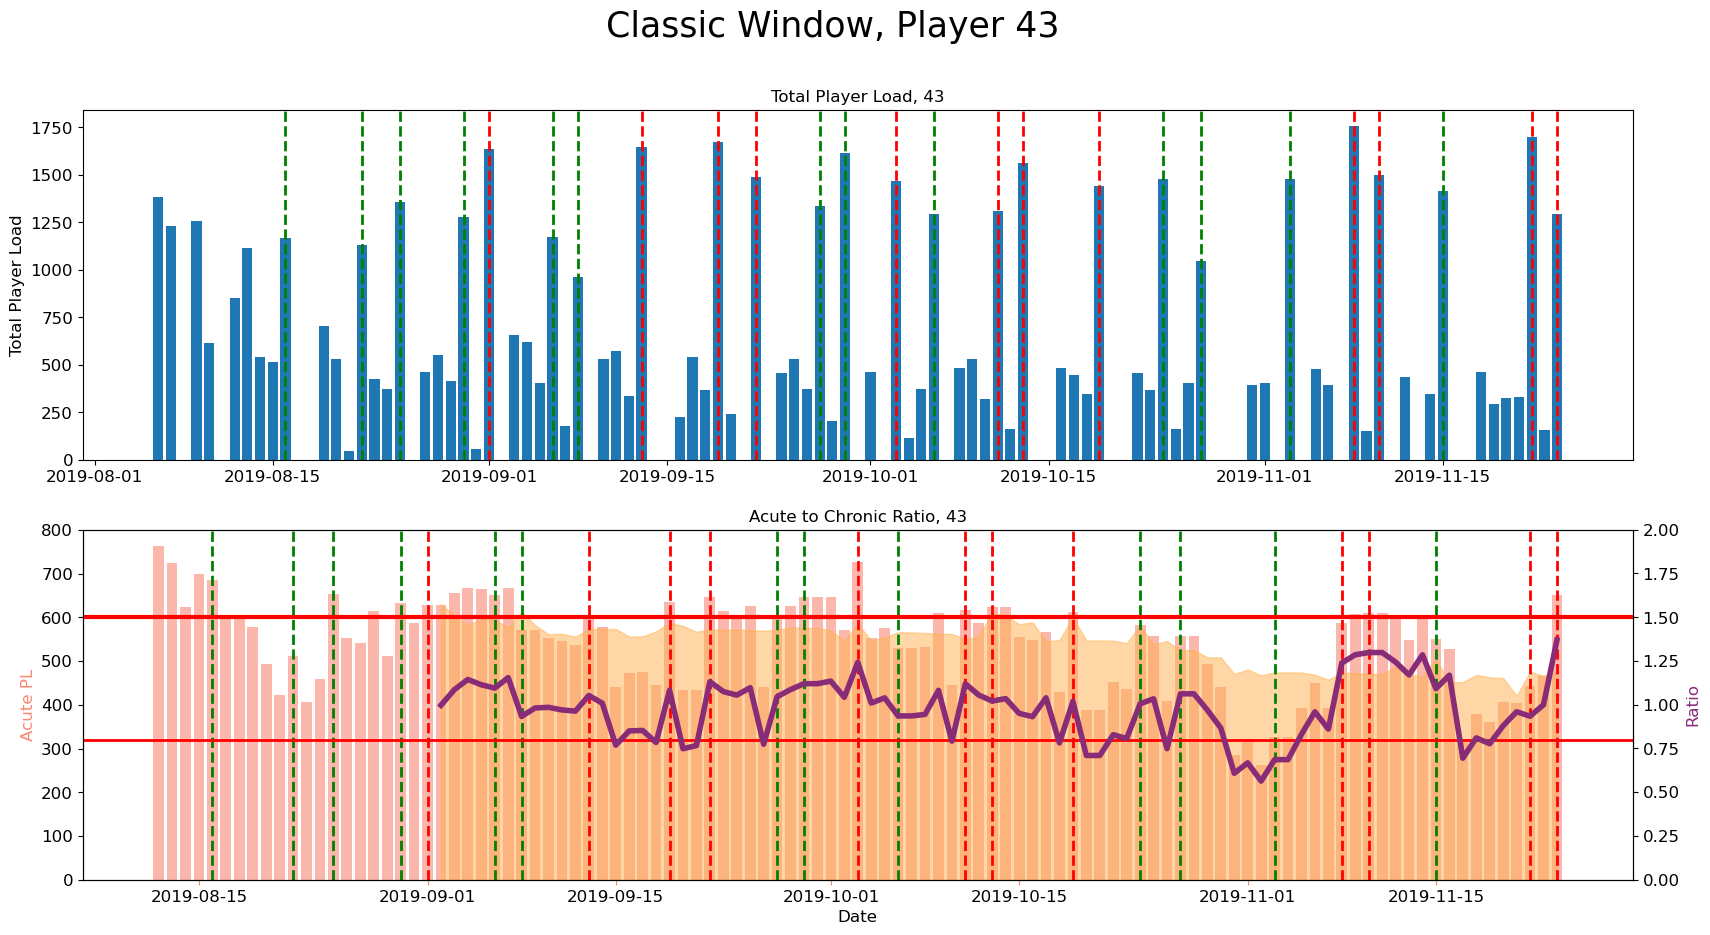

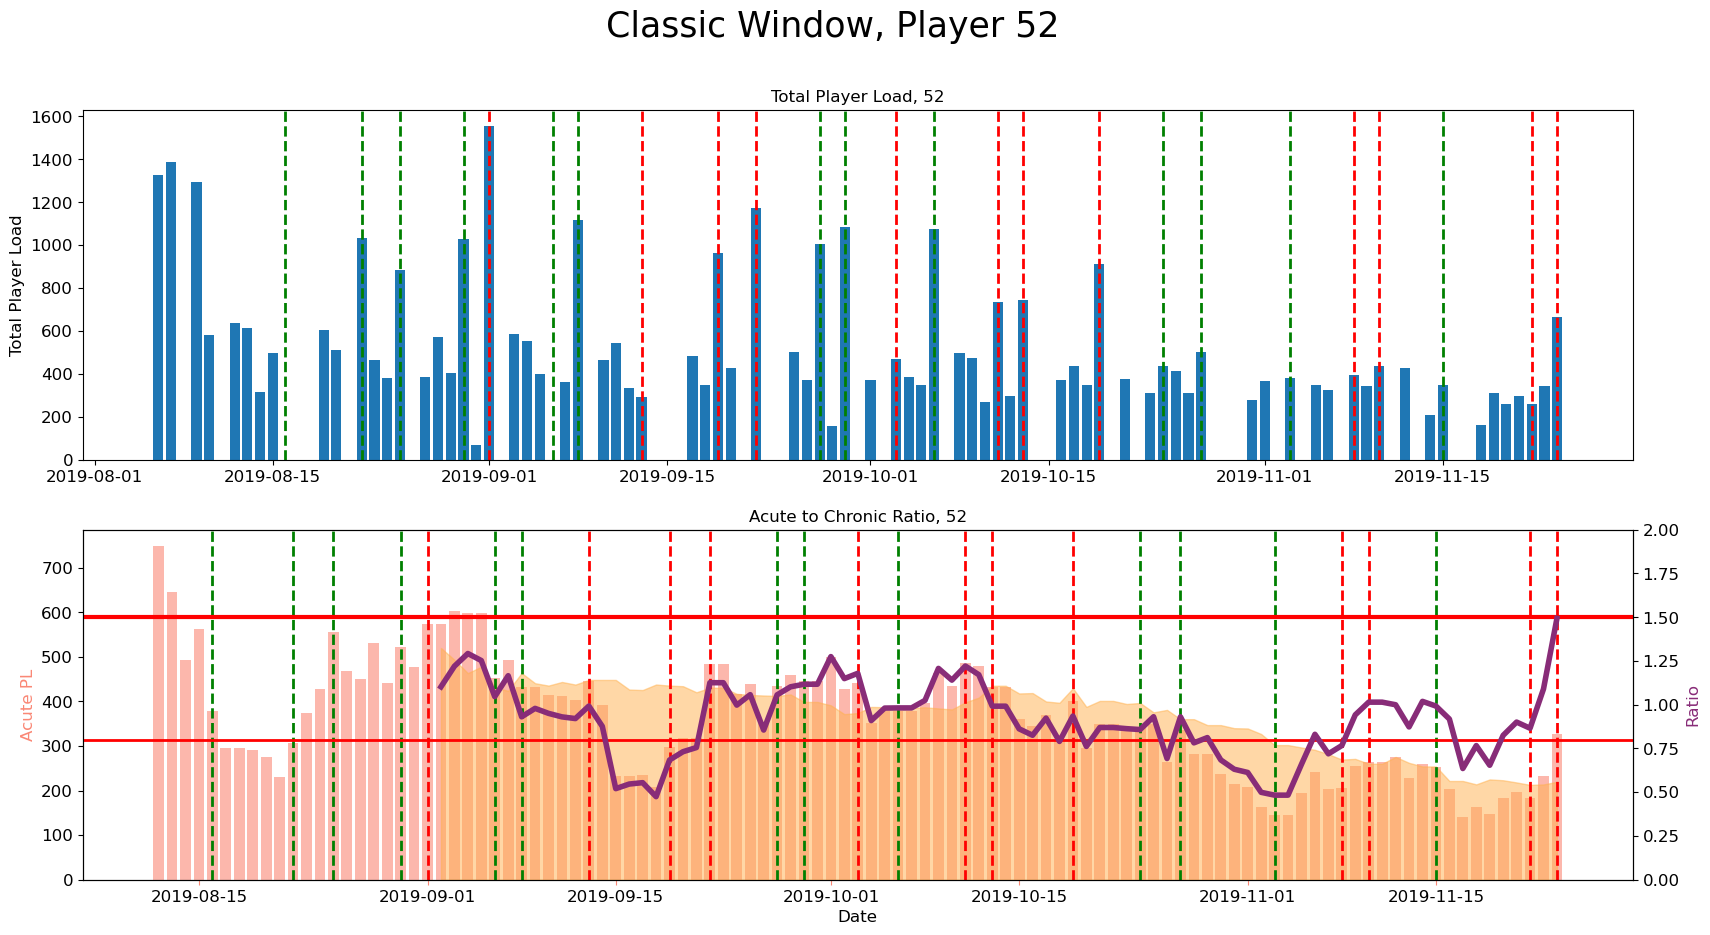

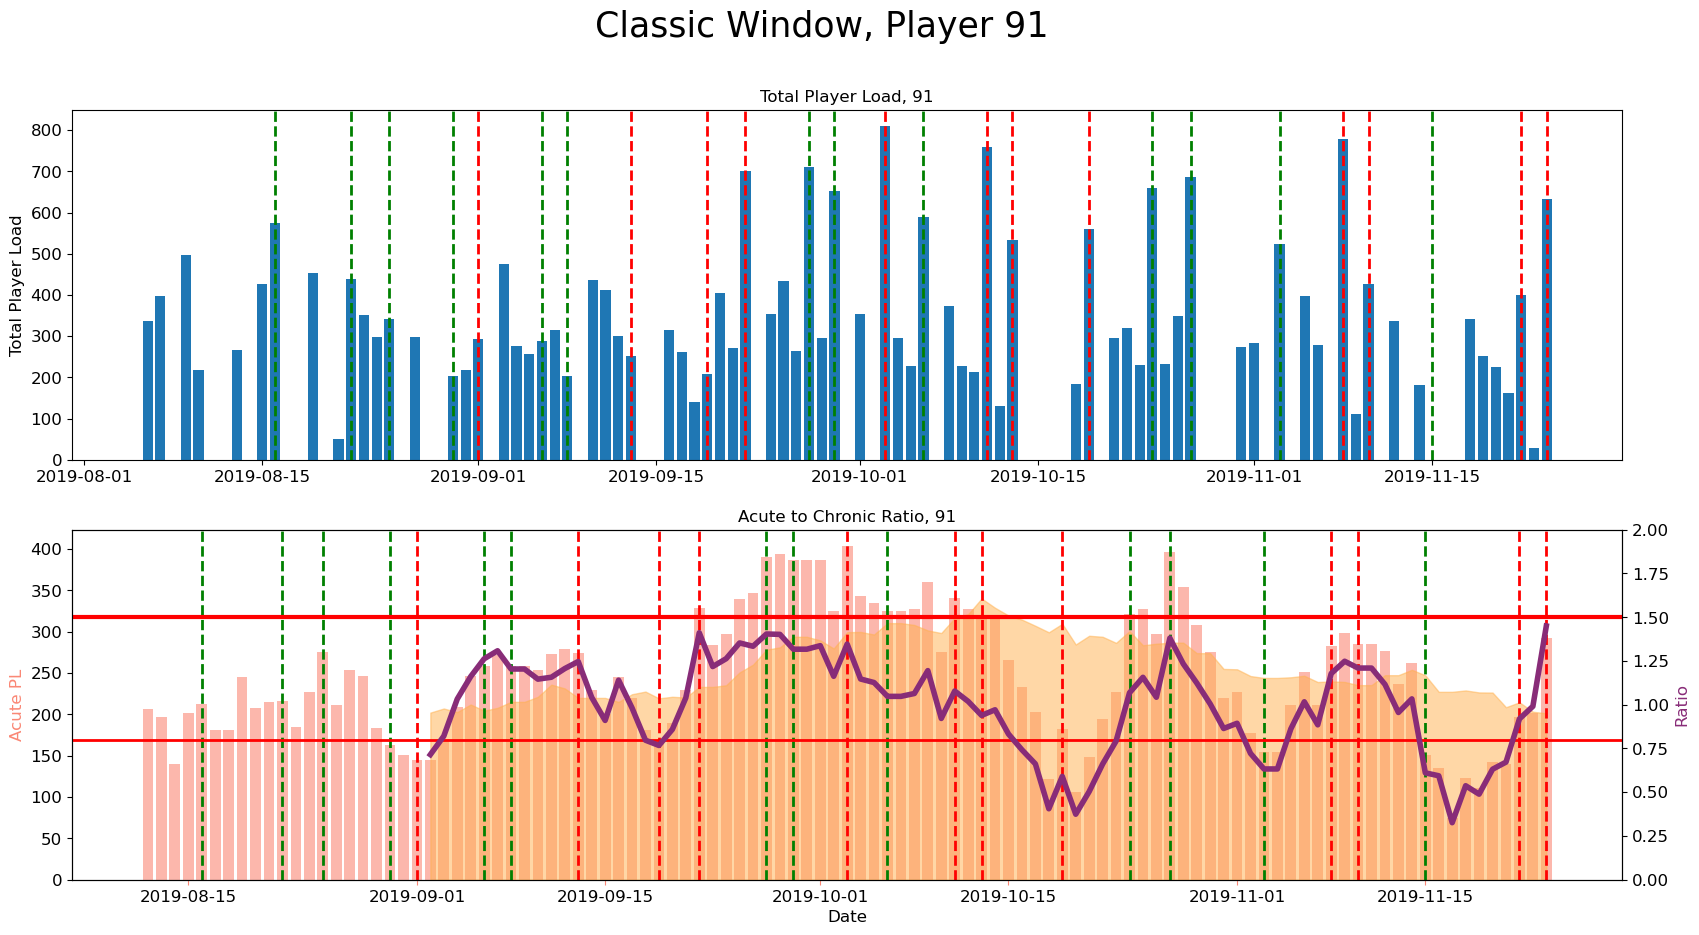

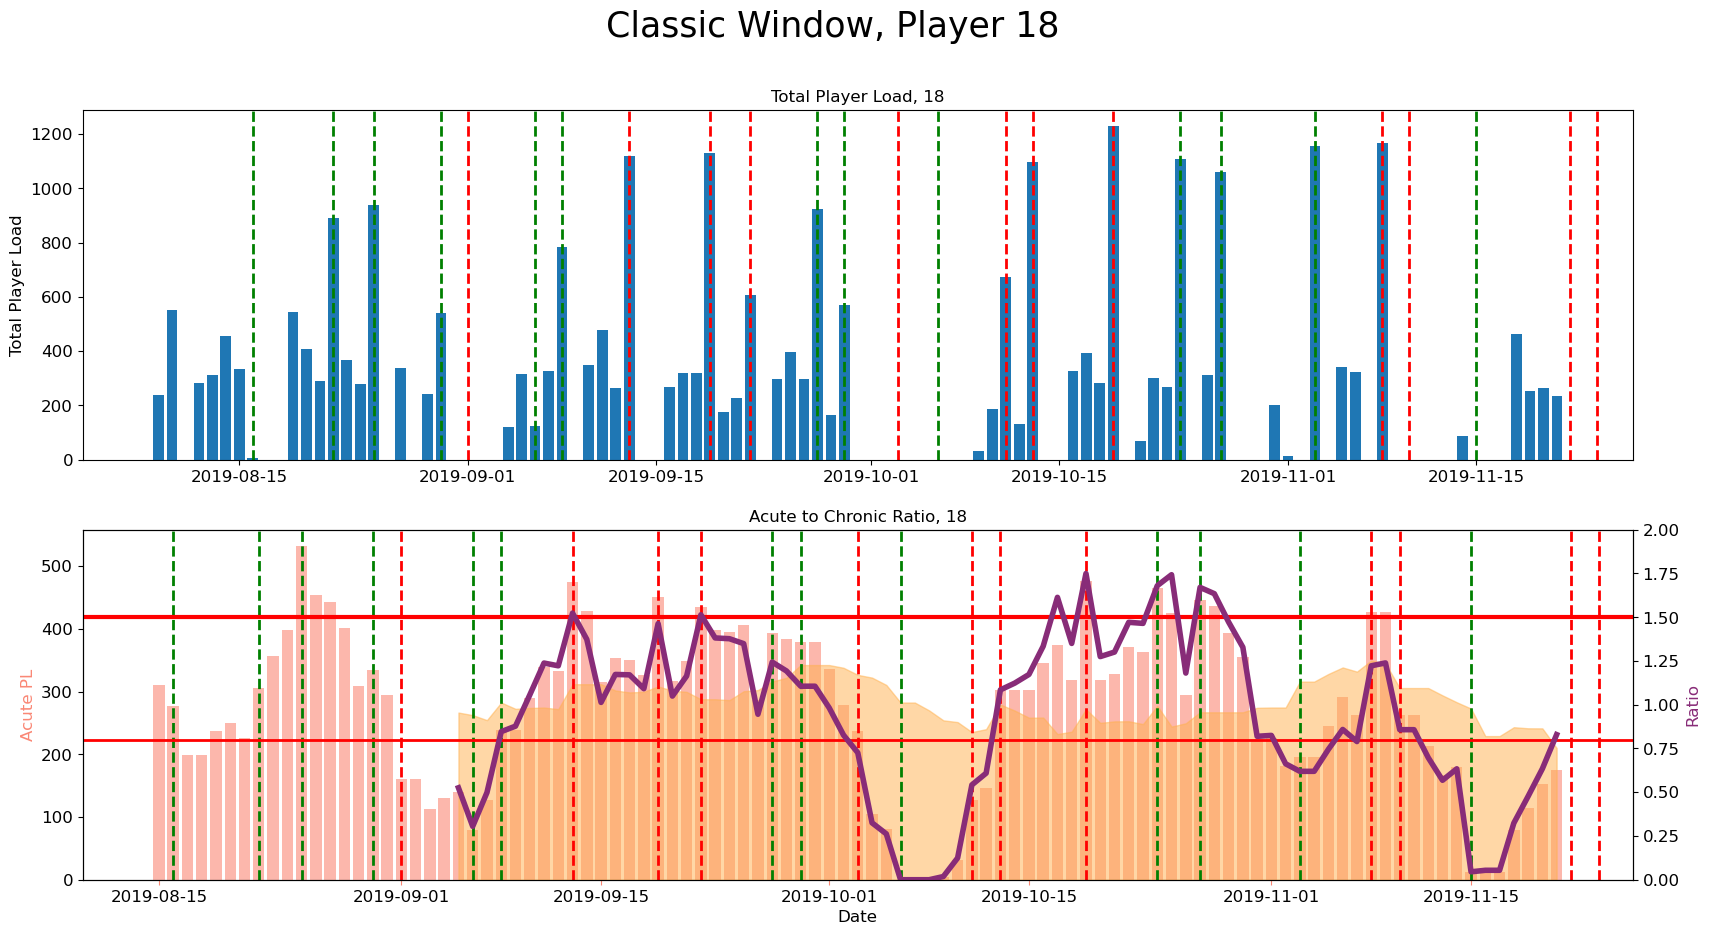

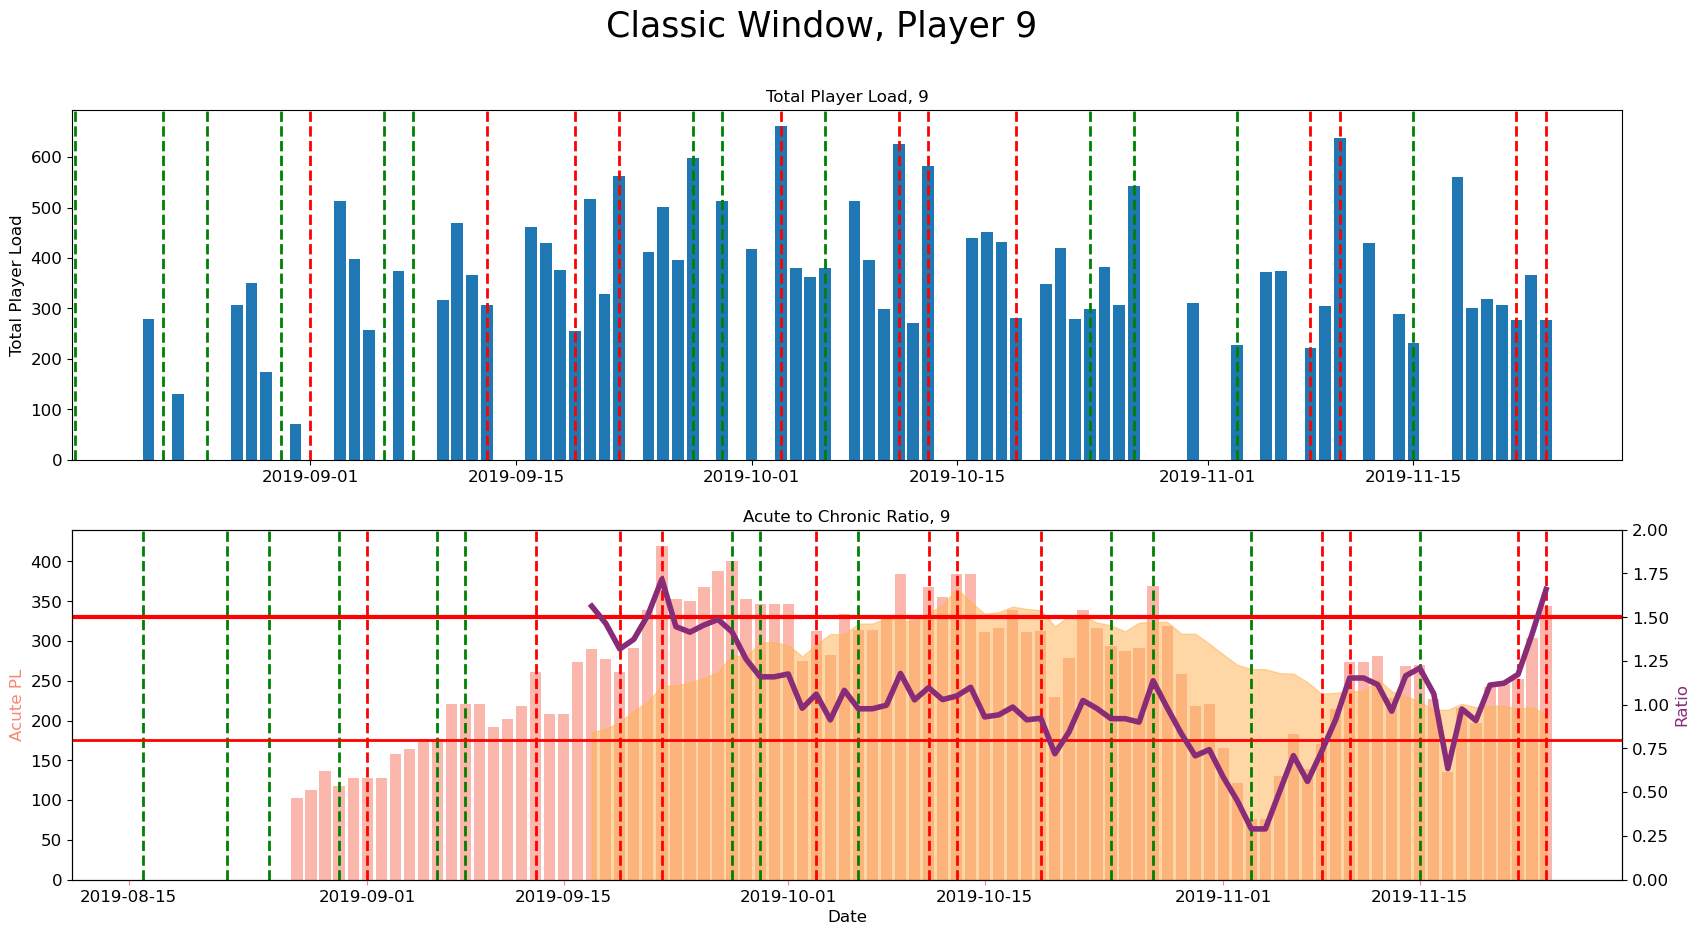

In [22]:
for i in session_df['Player.Name'].unique():
    df_player = session_df[session_df['Player.Name'] == i]
    df_player = df_player.groupby("Date").sum()
    df_player = df_player.resample('D').sum()
    df_player = df_player.infer_objects(copy=False)
    df_player.drop(columns=['Player.Name', 'Period.Name', 'Position.Name'], inplace=True)
    df_player["Acute_PL"] = (df_player.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
    df_player["Chronic_PL"] = (df_player.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
    df_player["Acute_Chronic"] = df_player.loc[:,"Acute_PL"]/df_player.loc[:,"Chronic_PL"]
    fig, axs = plt.subplots(2,figsize=(20, 10))
    fig.suptitle(f'Classic Window, Player {i}', fontsize=25)

    axs[0].bar(df_player.index, df_player["Total.Player.Load"])
    axs[0].tick_params(axis='x', labelsize=12)
    axs[0].set_ylabel('Total Player Load', fontsize=12)
    axs[0].tick_params(axis='y', labelsize=12)
    axs[0].set_title(f"Total Player Load, {i}", fontsize=12)

    # Match days
    for match_date, match_type in match_days.items():
        if match_date in df_all_classic.index:
            color = 'green' if match_type == 'Home' else 'red'
            axs[0].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
            axs[0].text

    color='#FA8775'
    axs[1].set_xlabel("Date", fontsize=12)
    axs[1].tick_params(axis='x', labelsize=12, color=color)
    axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
    axs[1].bar(df_player.index, df_player["Acute_PL"], color=color, alpha=0.6)
    axs[1].tick_params(axis='y', labelsize=12)

    color='#FFB14E'
    axs[1].fill_between(df_player.index, df_player["Chronic_PL"], color=color, alpha=0.5)
    axs[1] = plt.gca()
    axs[1].set_title(f"Acute to Chronic Ratio, {i}", fontsize=12)
    axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

    color='#882C78'
    axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
    axs1.plot(df_player.index, df_player["Acute_Chronic"], color=color, linewidth=4.0)
    axs1.tick_params(axis='y', labelsize=12)
    axs1 = plt.gca()
    axs1.set_ylim([0,2.0])
    axs1.axhline(y=1.5,c="red",linewidth=3,zorder=0)
    axs1.axhline(y=0.8,c="red",linewidth=2,zorder=0)

    # Match days
    for match_date, match_type in match_days.items():
        if match_date in df_all_classic.index:
            color = 'green' if match_type == 'Home' else 'red'
            axs[1].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
            axs[1].text(match_date, axs[1].get_ylim()[1], '', rotation=90, verticalalignment='bottom', color=color, fontsize=10)

    # Save the figures
    plt.savefig(f'Images/Classic_Window_Player_{i}.png')

plt.show()

#### 3.3.2 Graphs with Alternative Window

C:\Users\lasm1\AppData\Local\Temp\ipykernel_156652\3584955505.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2,figsize=(20, 10))


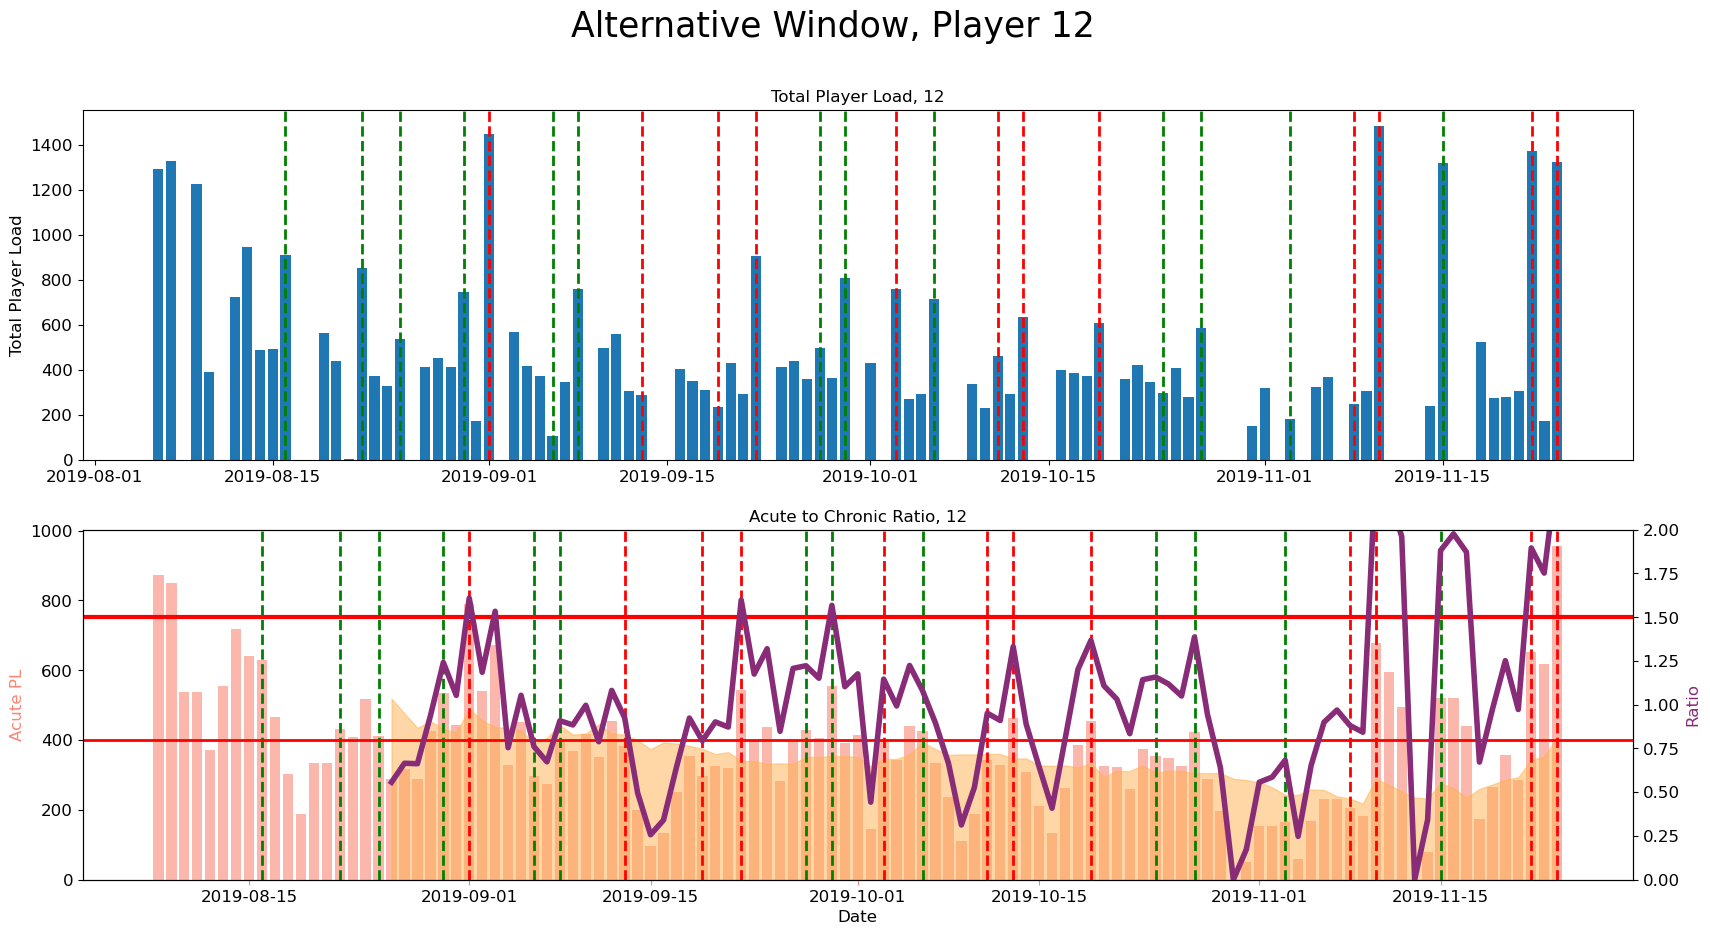

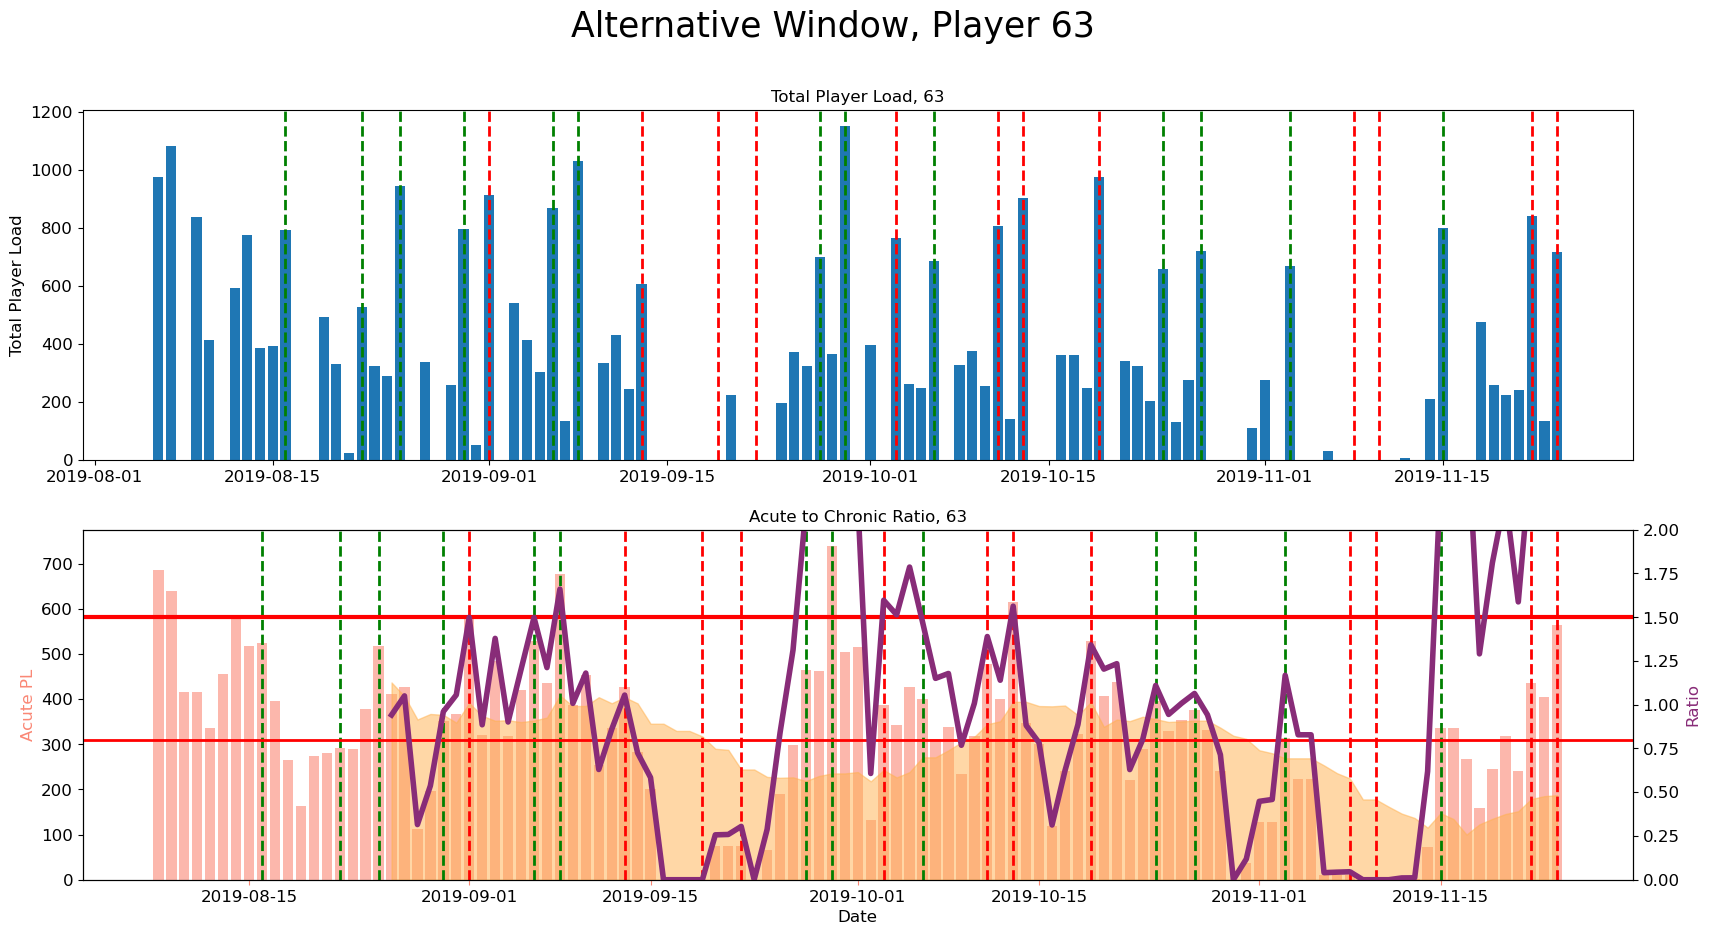

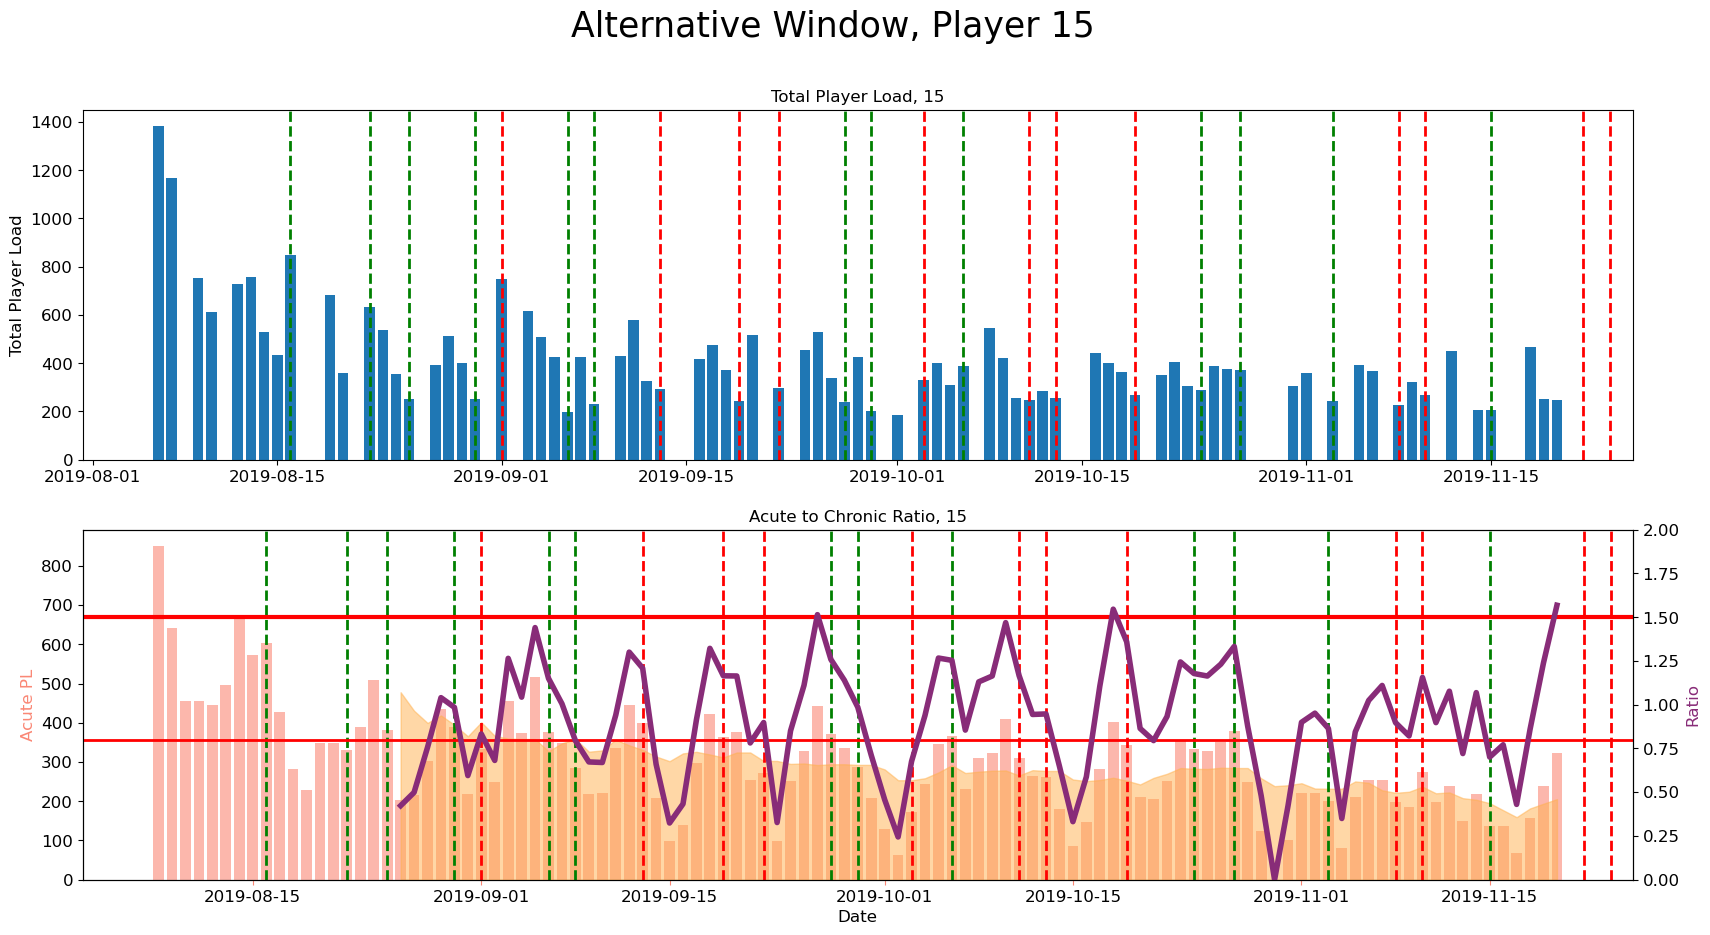

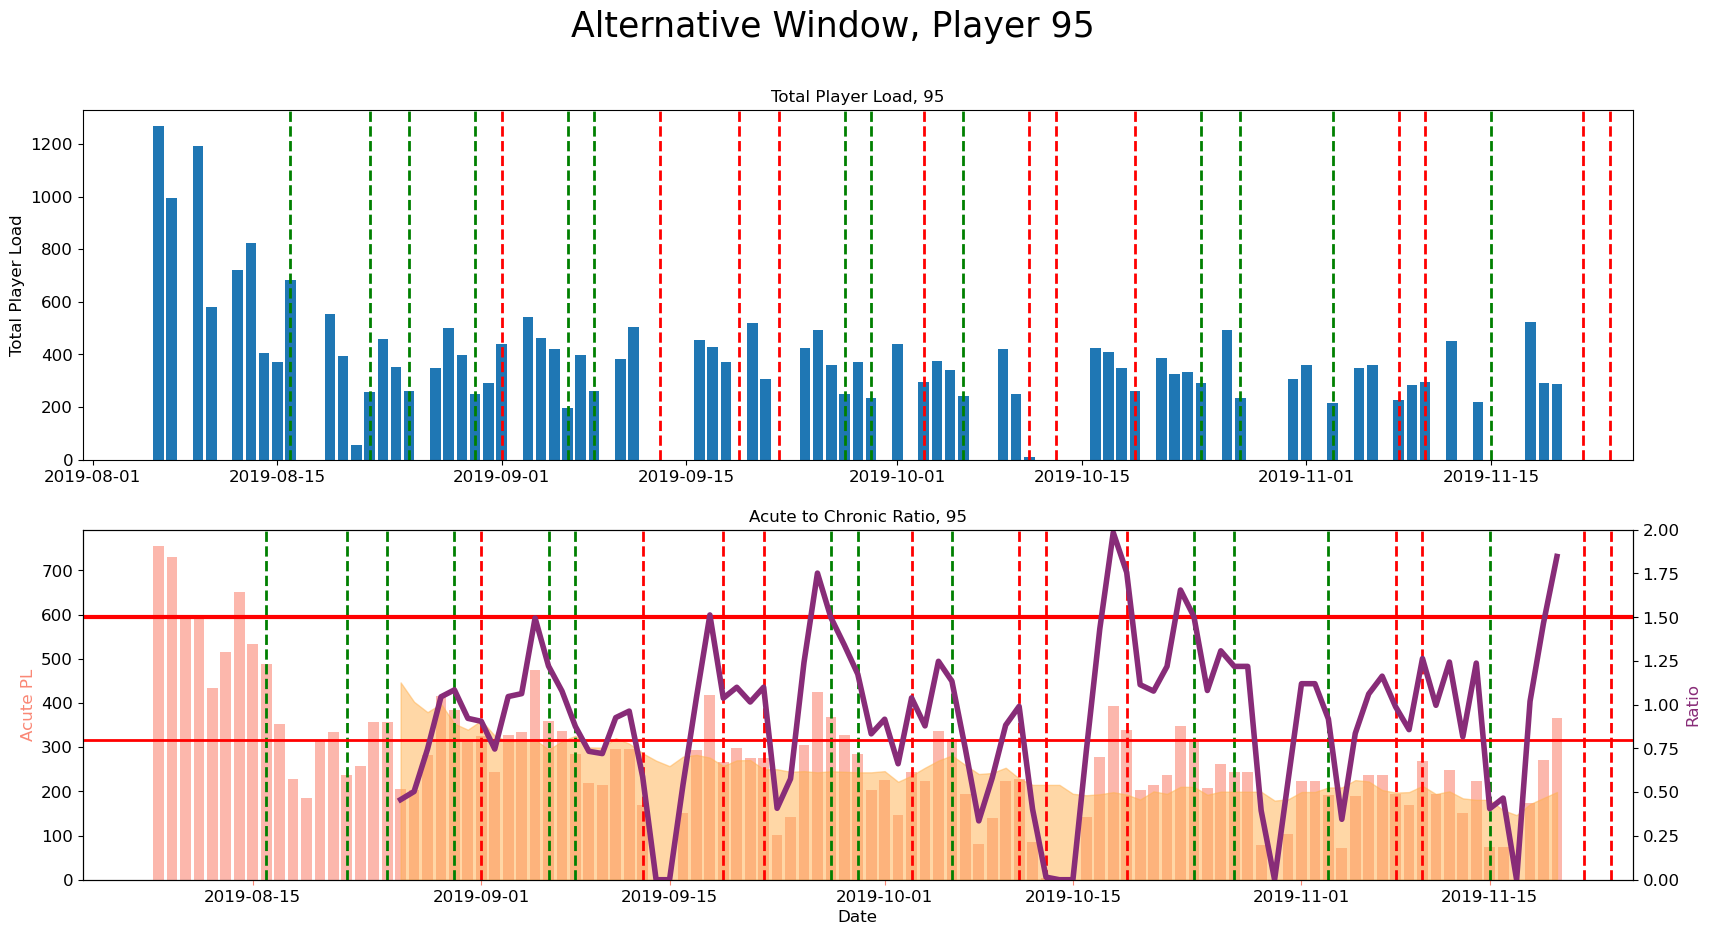

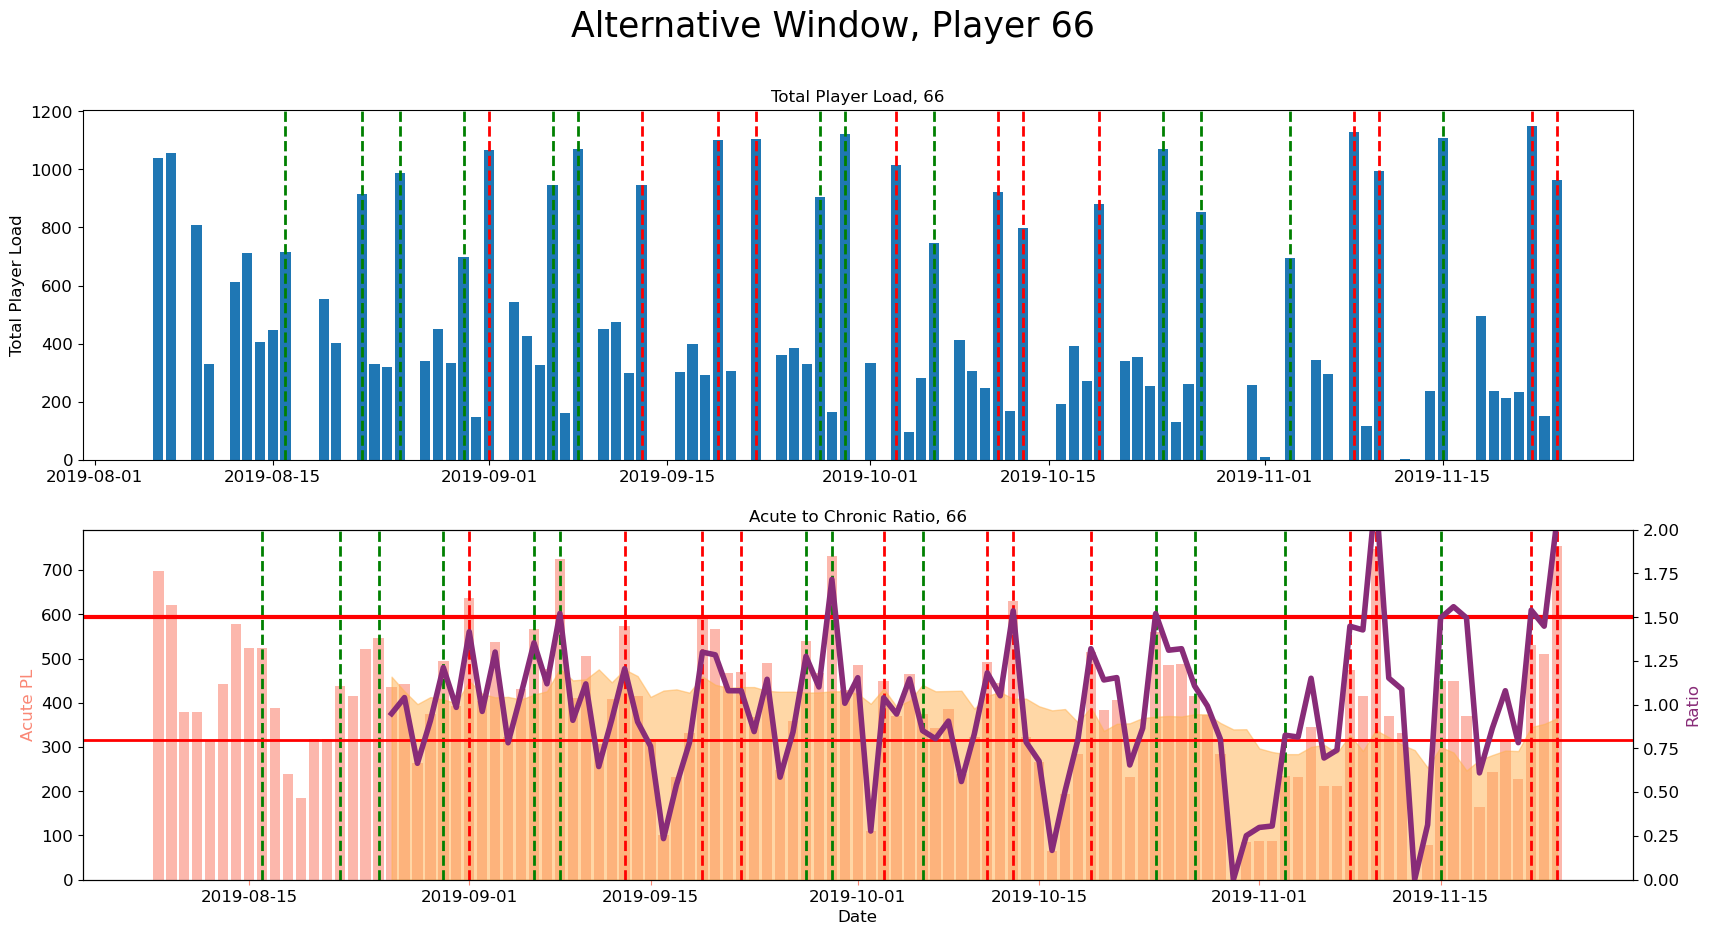

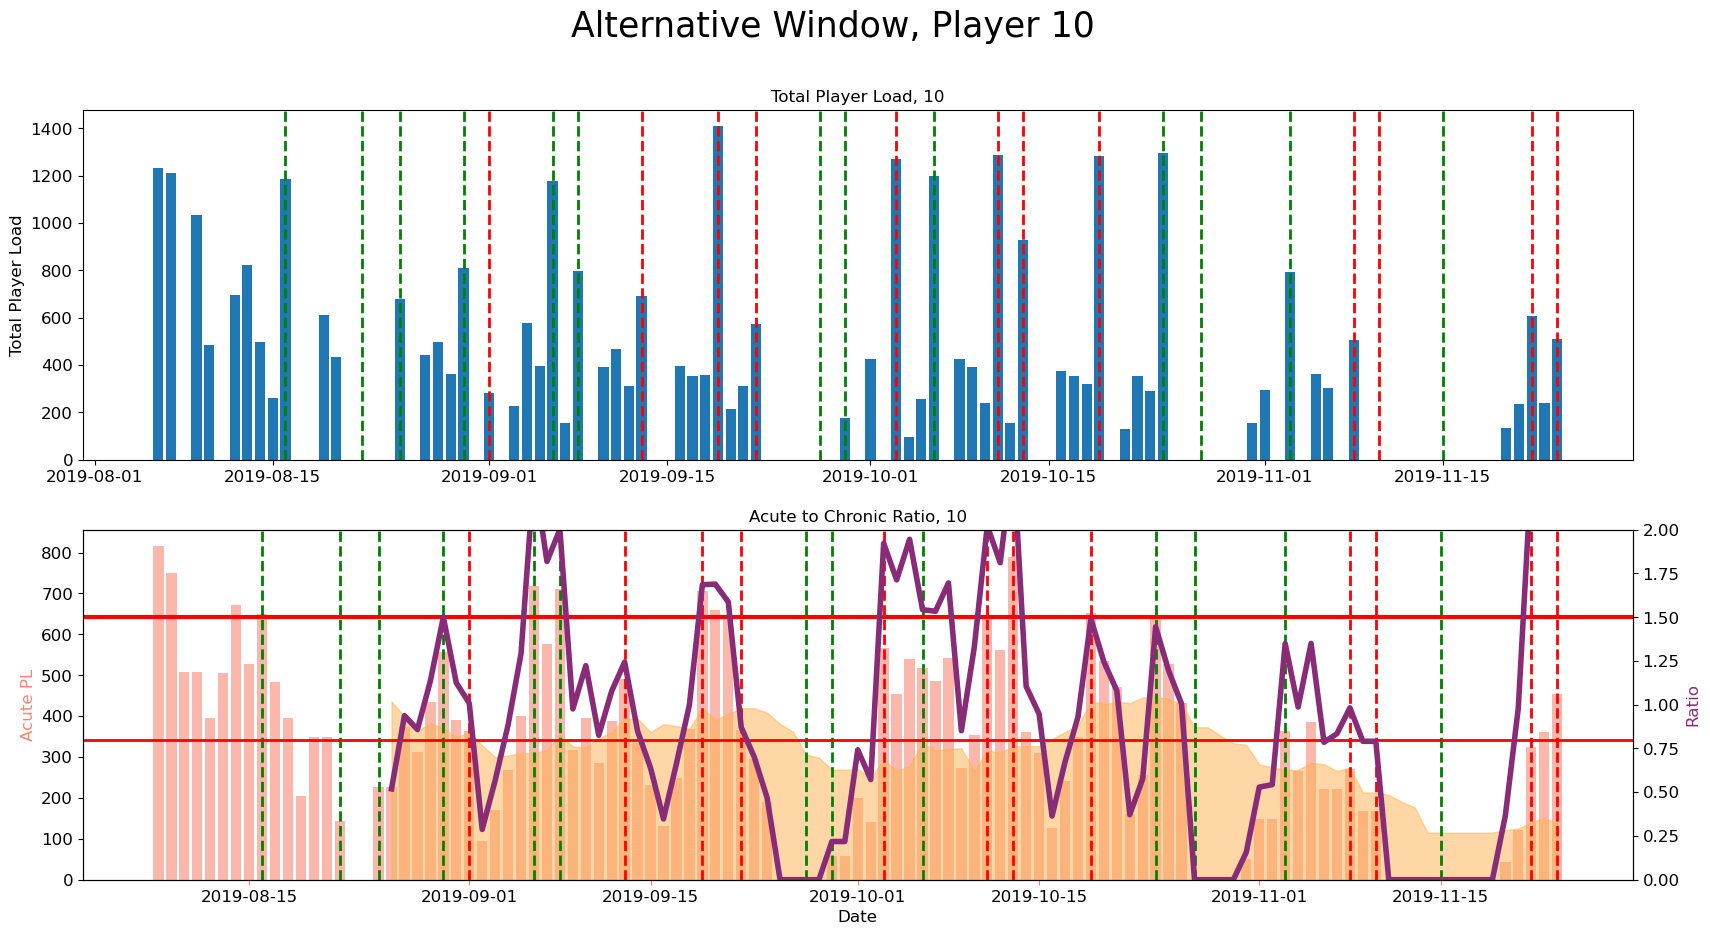

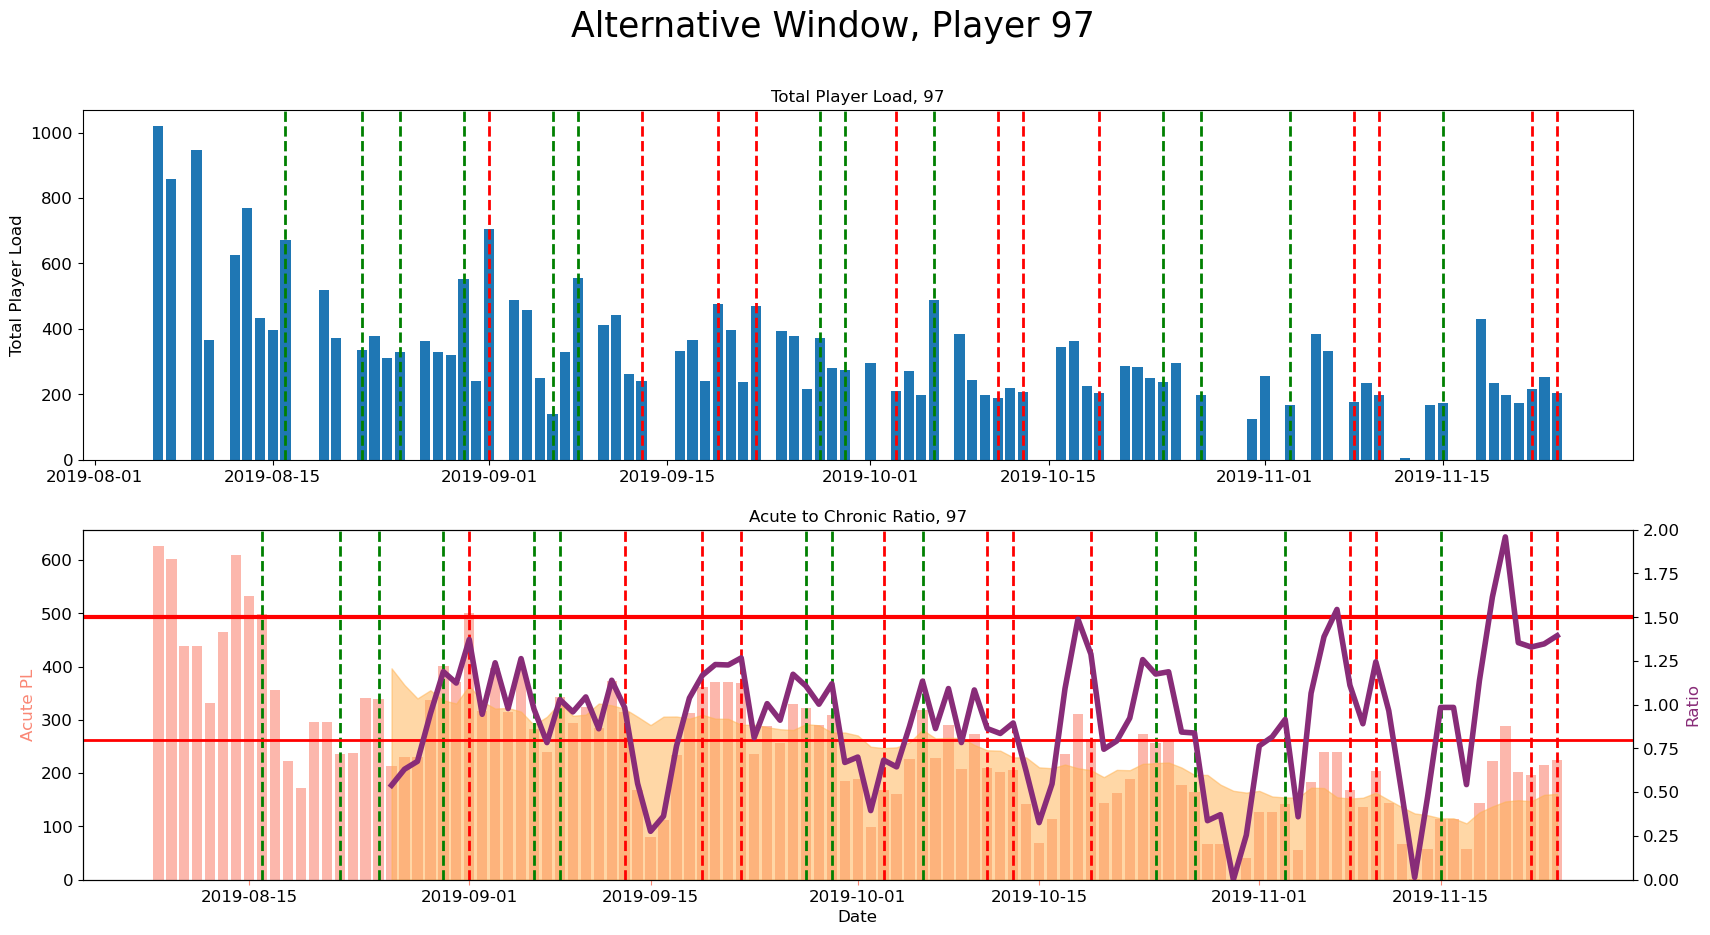

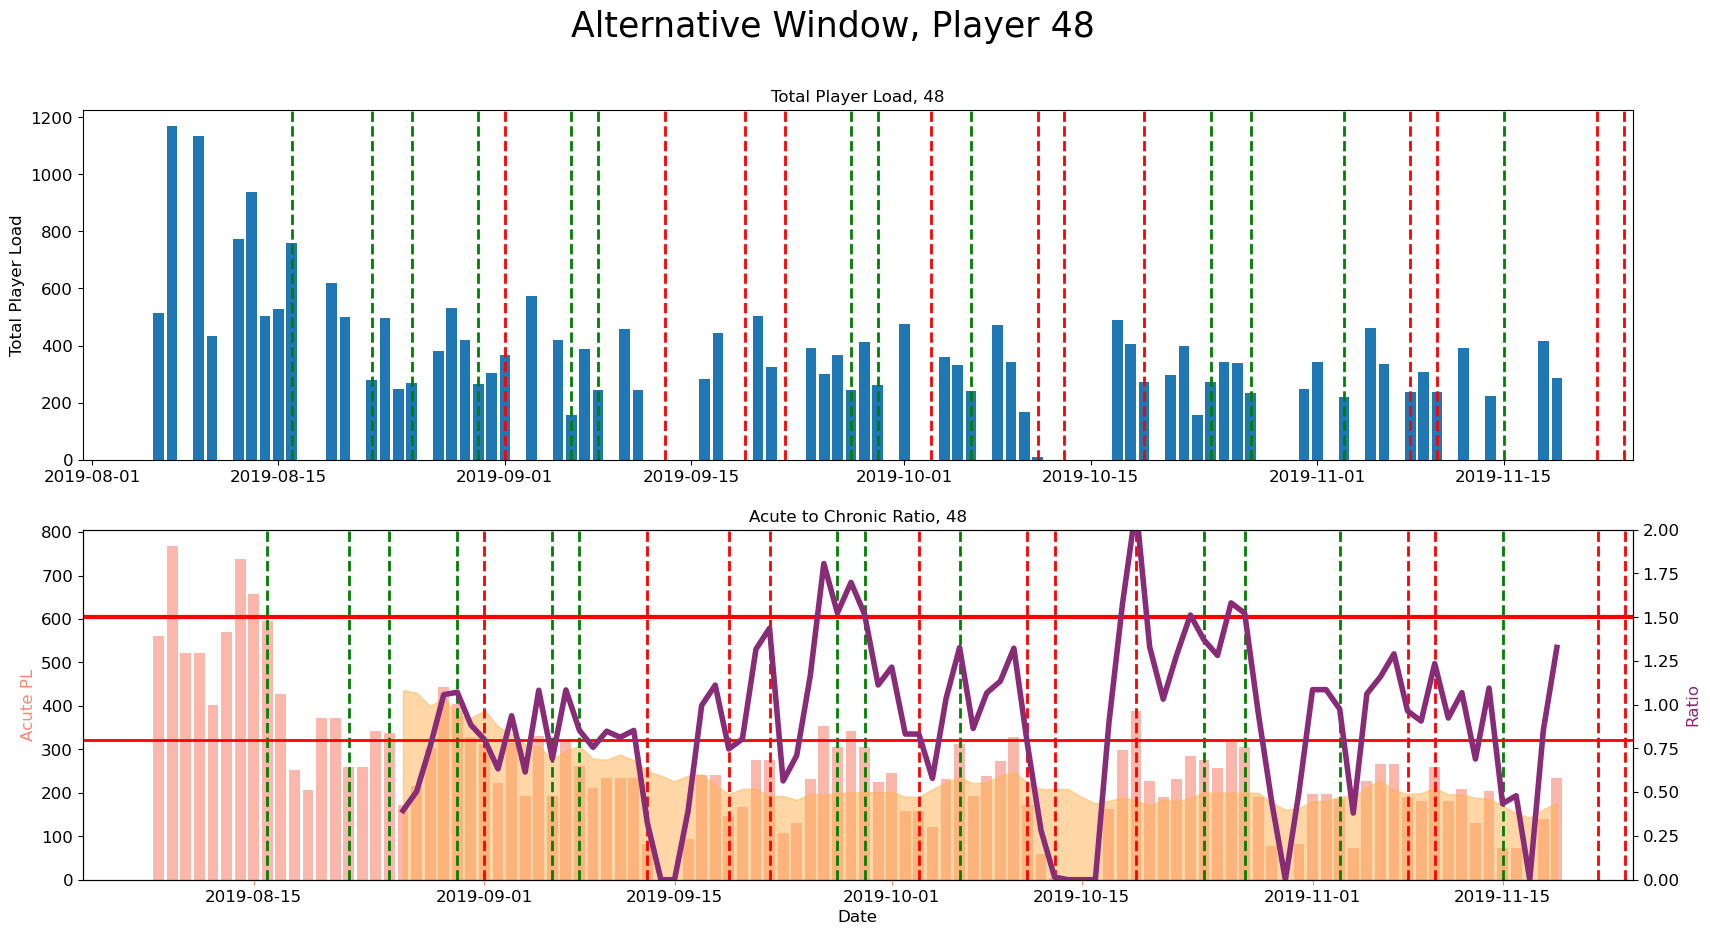

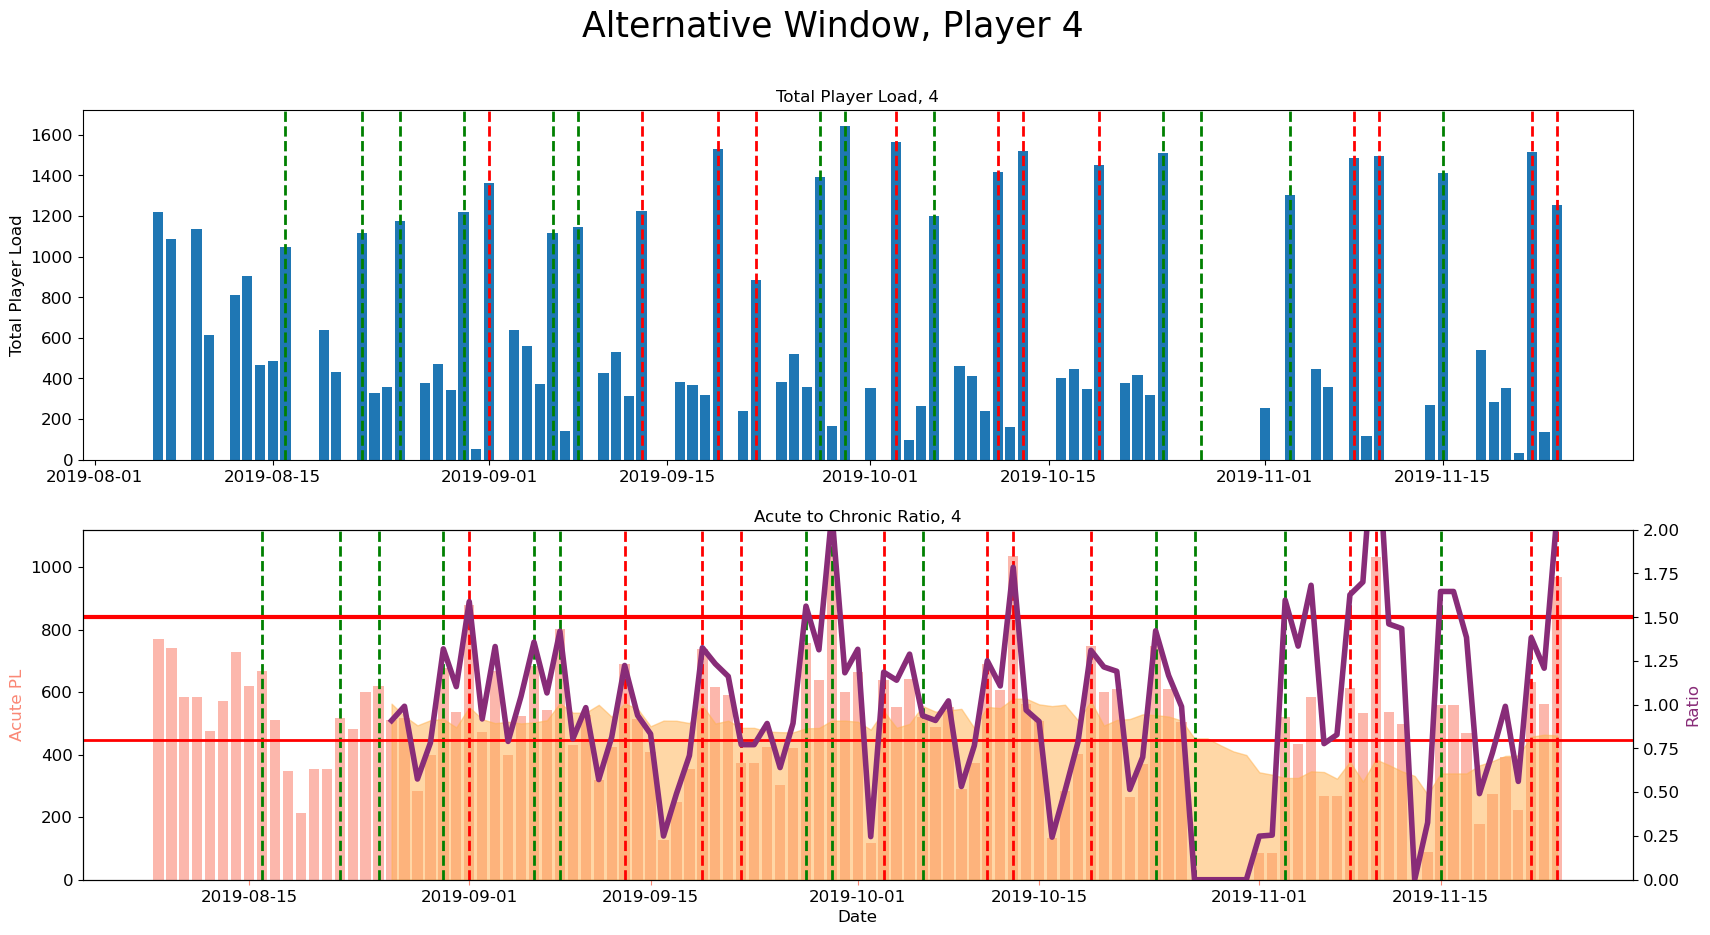

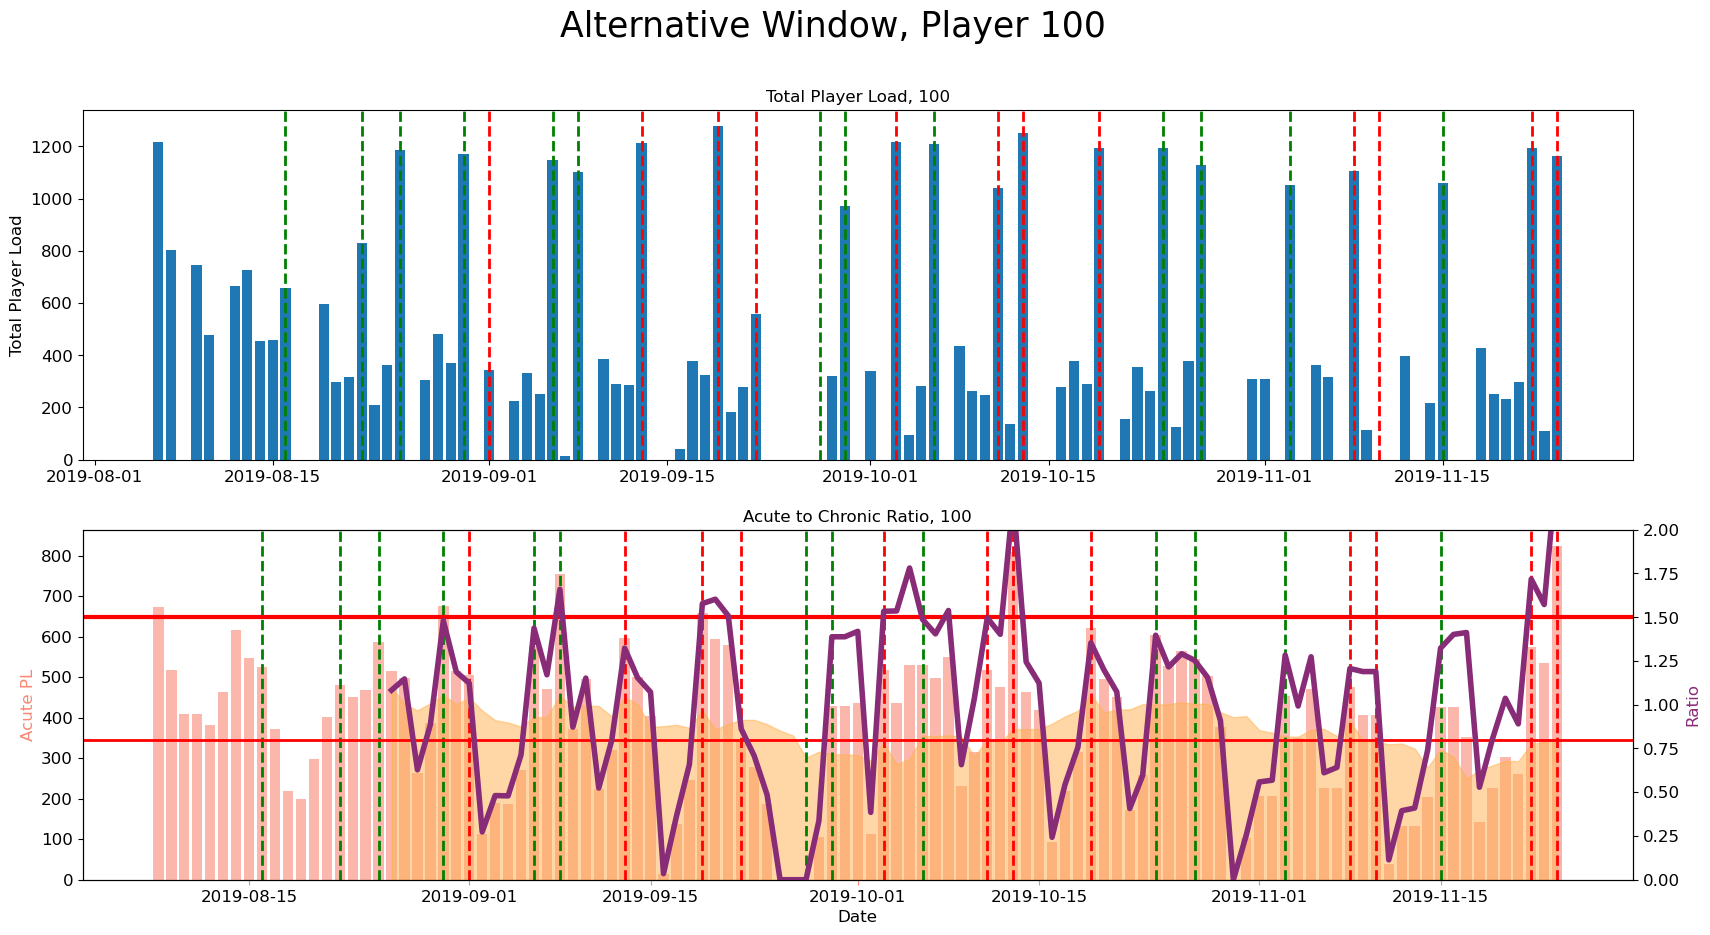

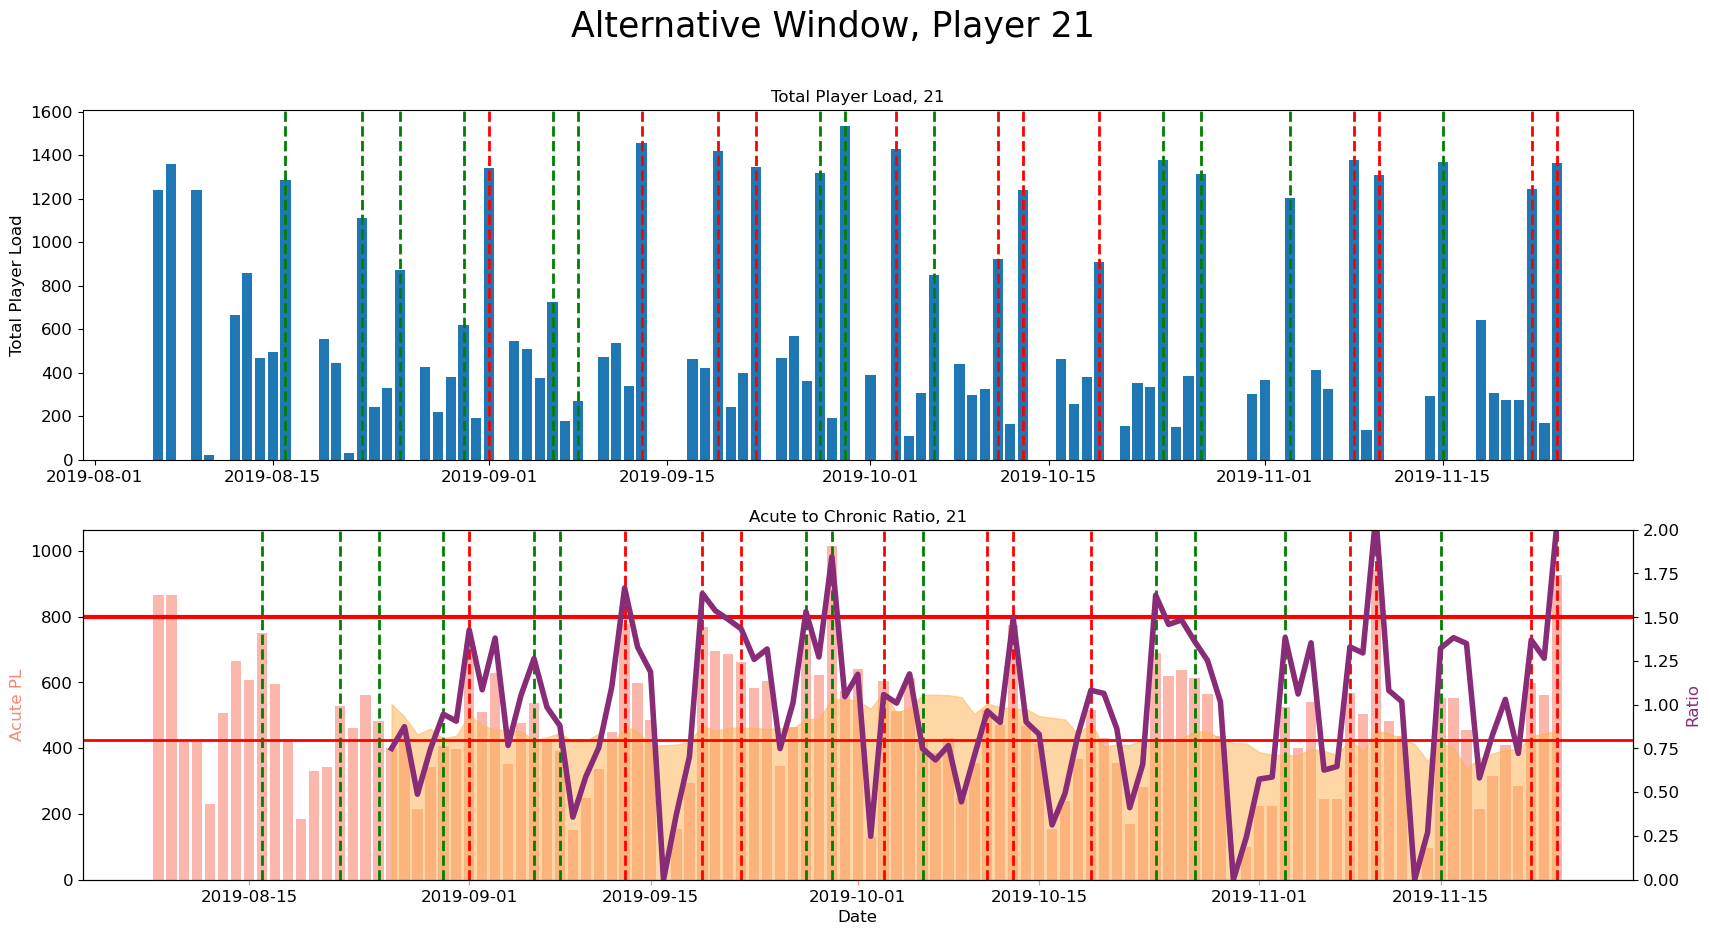

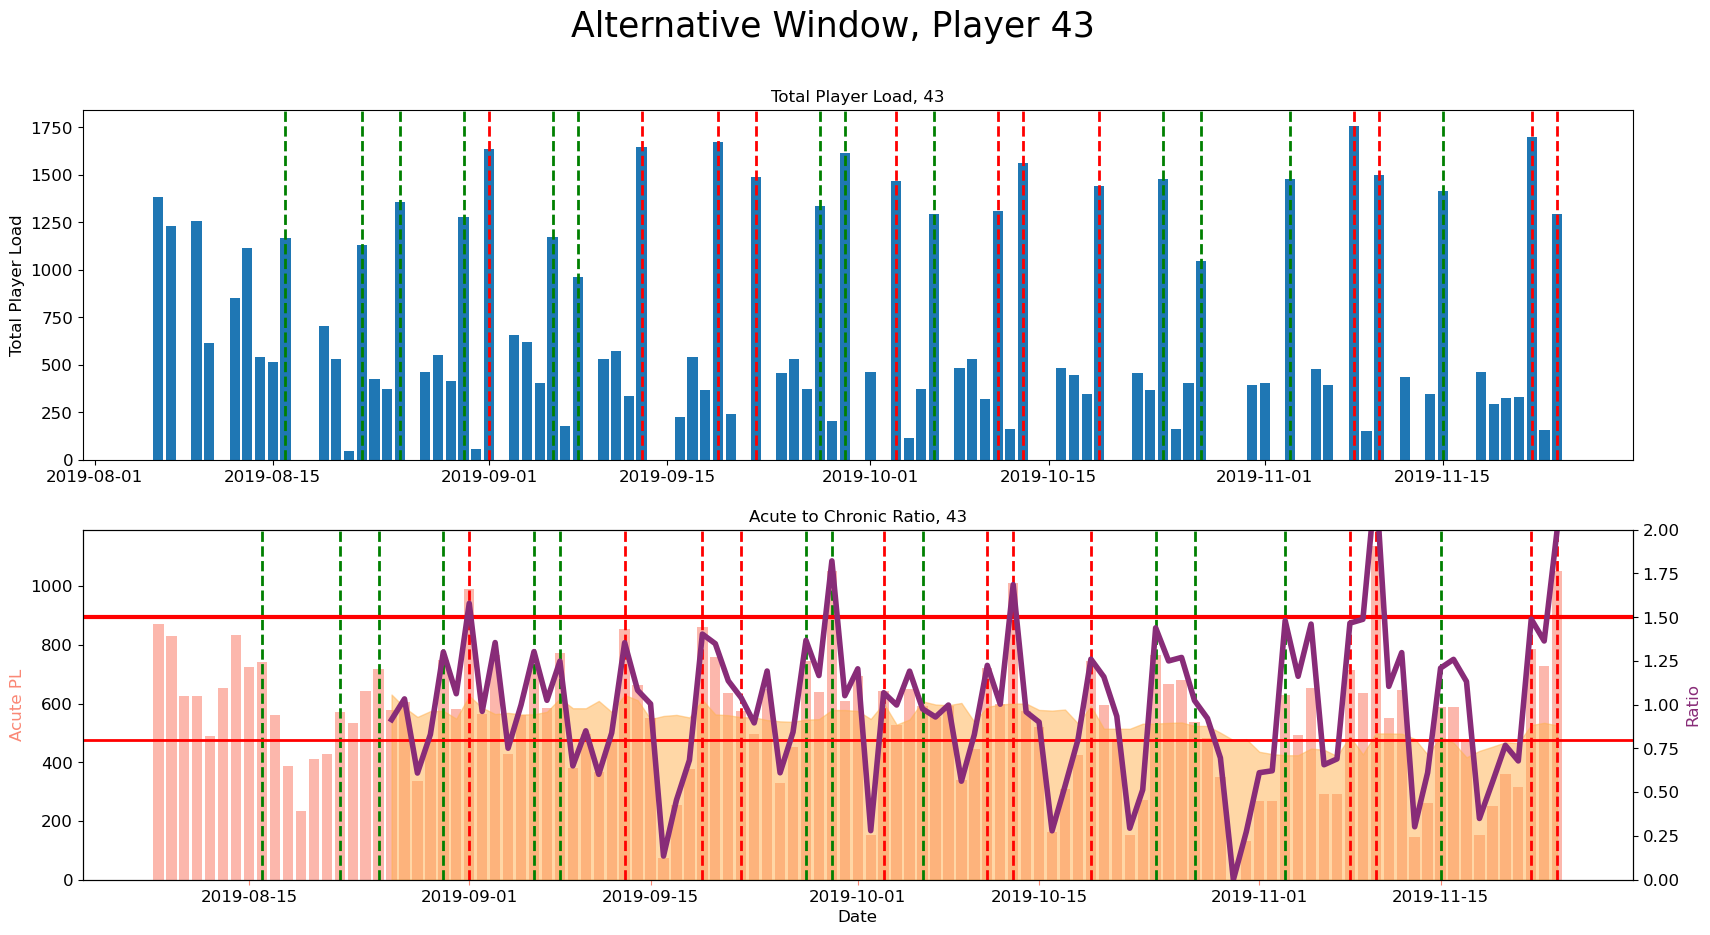

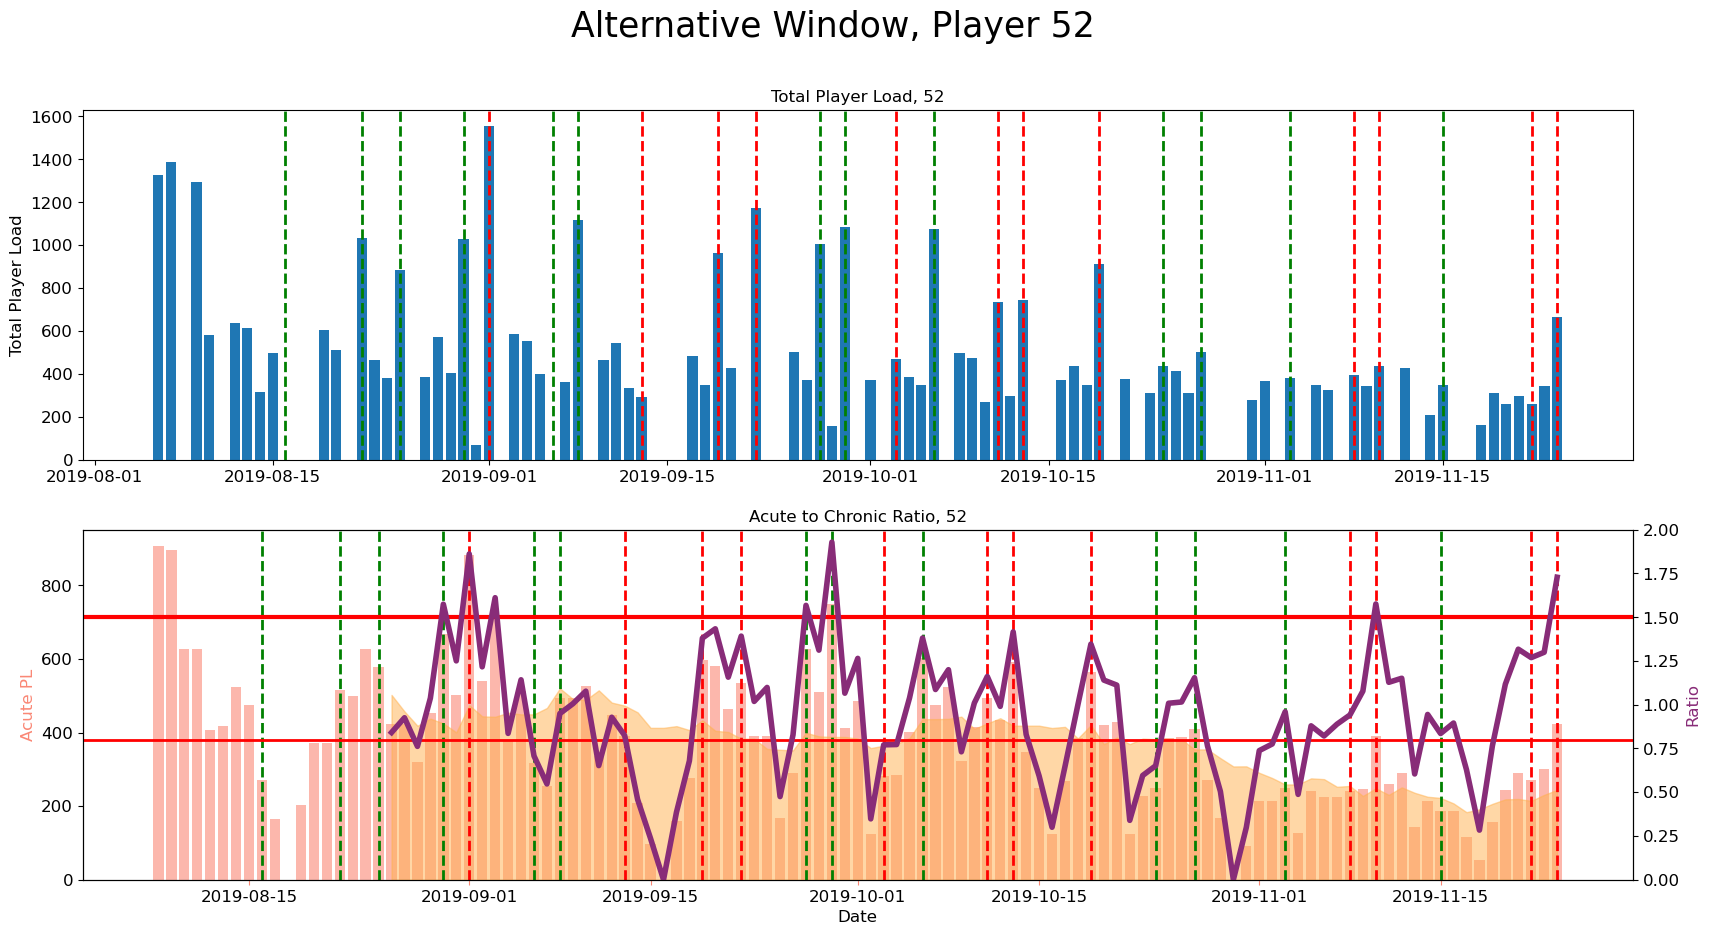

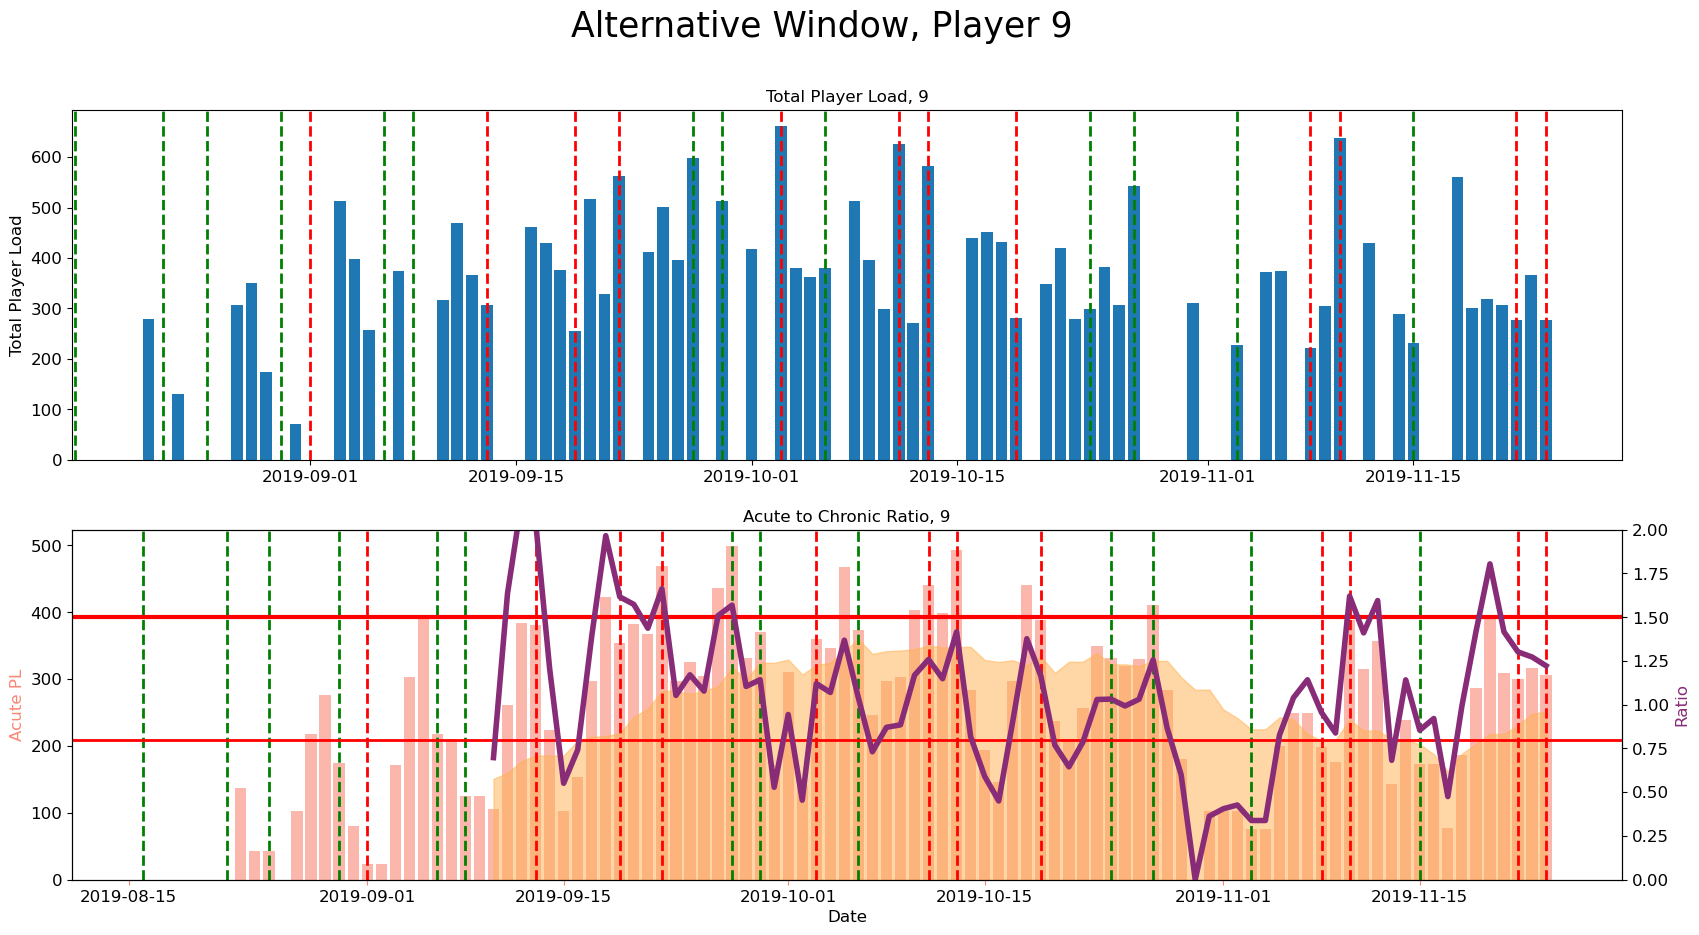

In [23]:
for i in session_df['Player.Name'].unique():
    df_player = session_df[session_df['Player.Name'] == i]
    df_player = df_player.groupby("Date").sum()
    df_player = df_player.resample('D').sum()
    df_player = df_player.infer_objects(copy=False)
    df_player.drop(columns=['Player.Name', 'Period.Name', 'Position.Name'], inplace=True)
    df_player["Acute_PL"] = (df_player.loc[:,"Total.Player.Load"].rolling('3D', 3).sum())/3
    df_player["Chronic_PL"] = (df_player.loc[:,"Total.Player.Load"].rolling('21D', 21).sum())/21
    df_player["Acute_Chronic"] = df_player.loc[:,"Acute_PL"]/df_player.loc[:,"Chronic_PL"]
    fig, axs = plt.subplots(2,figsize=(20, 10))

    fig.suptitle(f'Alternative Window, Player {i}', fontsize=25)
    axs[0].bar(df_player.index, df_player["Total.Player.Load"])
    axs[0].tick_params(axis='x', labelsize=12)
    axs[0].set_ylabel('Total Player Load', fontsize=12)
    axs[0].tick_params(axis='y', labelsize=12)
    axs[0].set_title(f"Total Player Load, {i}", fontsize=12)

    # Match days
    for match_date, match_type in match_days.items():
        if match_date in df_all_classic.index:
            color = 'green' if match_type == 'Home' else 'red'
            axs[0].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
            axs[0].text

    color='#FA8775'
    axs[1].set_xlabel("Date", fontsize=12)
    axs[1].tick_params(axis='x', labelsize=12, color=color)
    axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
    axs[1].bar(df_player.index, df_player["Acute_PL"], color=color, alpha=0.6)
    axs[1].tick_params(axis='y', labelsize=12)

    color='#FFB14E'
    axs[1].fill_between(df_player.index, df_player["Chronic_PL"], color=color, alpha=0.5)
    axs[1] = plt.gca()
    axs[1].set_title(f"Acute to Chronic Ratio, {i}", fontsize=12)
    axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

    color='#882C78'
    axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
    axs1.plot(df_player.index, df_player["Acute_Chronic"], color=color, linewidth=4.0)
    axs1.tick_params(axis='y', labelsize=12)
    axs1 = plt.gca()
    axs1.set_ylim([0,2.0])
    axs1.axhline(y=1.5,c="red",linewidth=3,zorder=0)
    axs1.axhline(y=0.8,c="red",linewidth=2,zorder=0)

    # Match days
    for match_date, match_type in match_days.items():
        if match_date in df_all_classic.index:
            color = 'green' if match_type == 'Home' else 'red'
            axs[1].axvline(x=match_date, color=color, linestyle='--', linewidth=2)
            axs[1].text(match_date, axs[1].get_ylim()[1], '', rotation=90, verticalalignment='bottom', color=color, fontsize=10)

    # Save the figures
    plt.savefig(f'Images/Alternative_Window_Player_{i}.png')

plt.show()

## 4. Data Analysis
There are additional functions that allow us to find specific values or metrics more easily. We will focus on finding the minimum and maximum player workload, and the ratio between acute and chronic workload.

#### 4.1 Finding Minimum and Maximum Values

The 5 highest workloads throughout the season were experienced by the following players:

In [24]:
total_load_per_player = session_df.groupby('Player.Name')['Total.Player.Load'].sum().reset_index()
total_load_per_player['Player.Name'] = total_load_per_player['Player.Name'].astype('str')
total_load_per_player = total_load_per_player.sort_values(by='Total.Player.Load', ascending=False)

total_load_per_player[:5]

Player.Name  Total.Player.Load
10          43        61807.06587
0            4        54531.06541
6           21        52448.84502
11          44        45528.61318
16          66        44035.16557

Total Load for the Entire Team

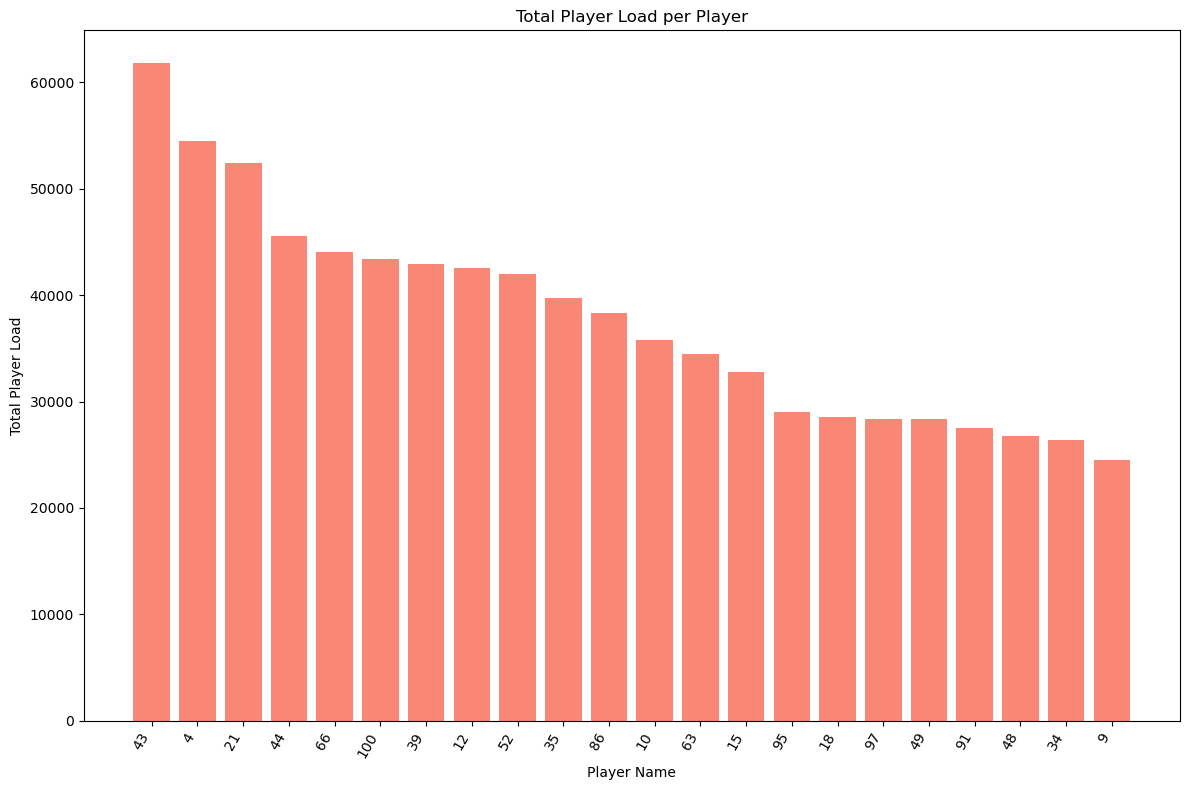

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(12, 8))
plt.bar(total_load_per_player['Player.Name'], 
        total_load_per_player['Total.Player.Load'], 
        color='#FA8775')

plt.xlabel('Player Name')
plt.ylabel('Total Player Load')
plt.title('Total Player Load per Player')

plt.xticks(rotation=60, ha='right')

plt.tight_layout()
plt.show()

plt.savefig('Images/Total_Load_per_Player.png')

Workload by Position Based on Number of Players

In [26]:
total_load_per_position = session_df.groupby('Position.Name')['Total.Player.Load'].sum().reset_index()
player_count_per_position = session_df.groupby('Position.Name')['Player.Name'].nunique().reset_index()
player_count_per_position.rename(columns={'Player.Name': 'Player.Count'}, inplace=True)
total_load_per_position = pd.merge(total_load_per_position, player_count_per_position, on='Position.Name')
total_load_per_position['Load.Per.Player'] = total_load_per_position['Total.Player.Load'] / total_load_per_position['Player.Count']
total_load_per_position = total_load_per_position.sort_values(by='Load.Per.Player', ascending=False)

total_load_per_position[:5]

Position.Name  Total.Player.Load  Player.Count  Load.Per.Player
2             M       251844.09578             6     41974.015963
0             D       388052.15793            10     38805.215793
1             F       190091.91588             7     27155.987983

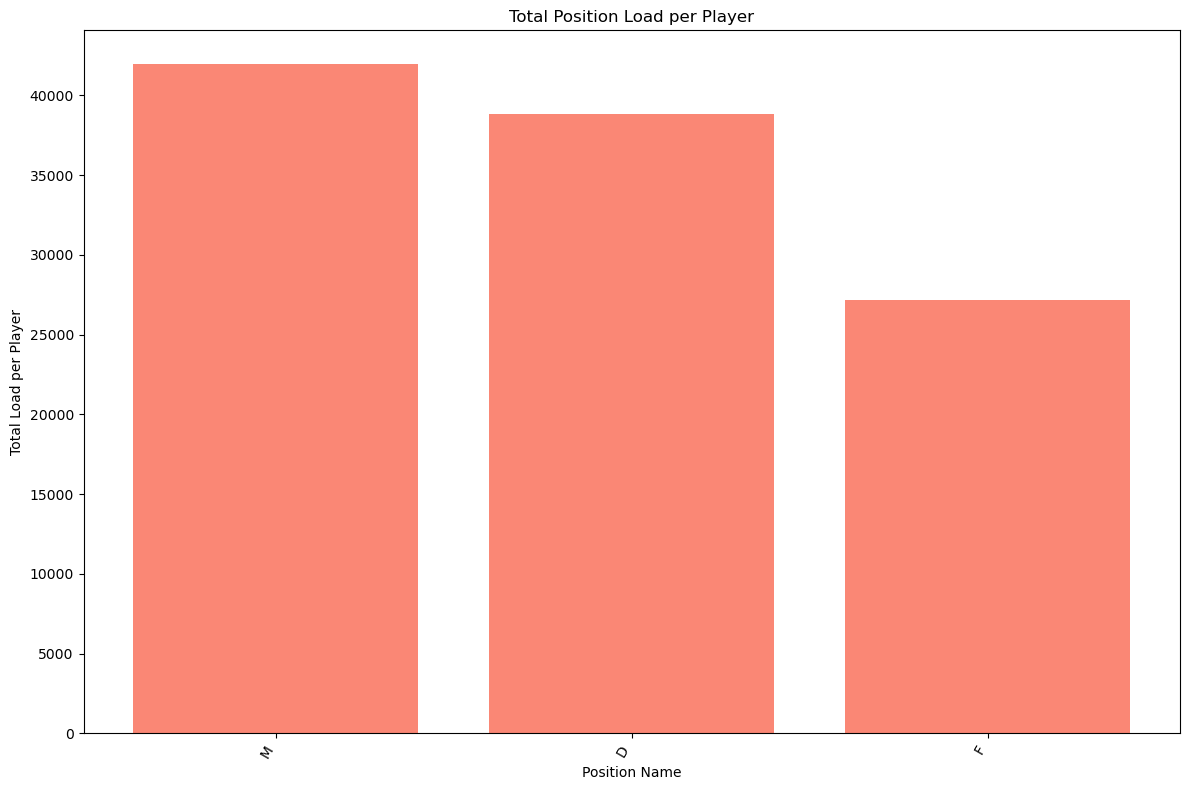

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(12, 8))
plt.bar(total_load_per_position['Position.Name'], 
        total_load_per_position['Load.Per.Player'], 
        color='#FA8775')

plt.xlabel('Position Name')
plt.ylabel('Total Load per Player')
plt.title('Total Position Load per Player')

plt.xticks(rotation=60, ha='right')

plt.tight_layout()
plt.show()

plt.savefig('Images/Total_Position_Load_per_Player.png')

Workload per Session Based on Day

In [28]:
total_load_per_day = session_df.reset_index().groupby('Date')['Total.Player.Load'].sum().reset_index()
total_load_per_day = total_load_per_day.sort_values(by='Total.Player.Load', ascending=False)

total_load_per_day[:5]

Date  Total.Player.Load
1  2019-08-07        21576.70582
0  2019-08-06        21457.62648
2  2019-08-09        19715.55092
21 2019-09-01        18599.06151
44 2019-09-29        16510.51763

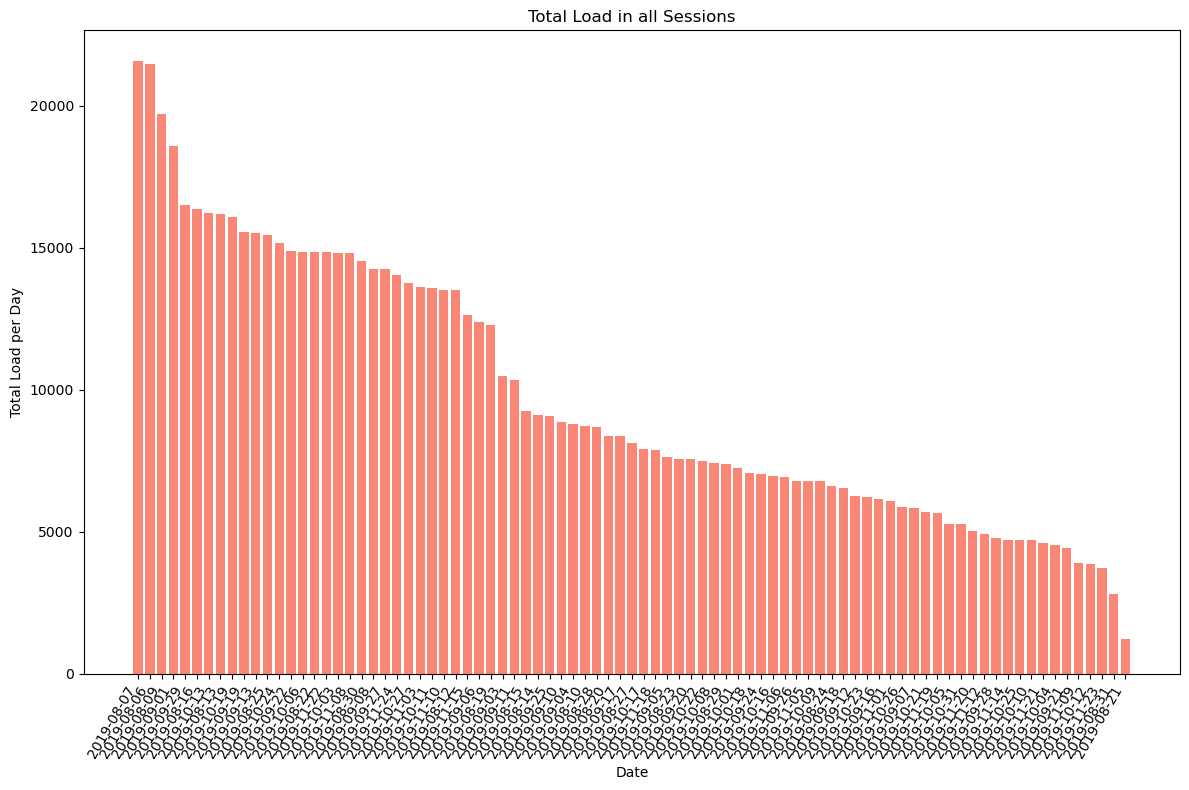

<Figure size 640x480 with 0 Axes>

In [29]:
total_load_per_day['Date'] = total_load_per_day['Date'].astype(str)

total_load_per_day = total_load_per_day.sort_values(by='Total.Player.Load', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(total_load_per_day['Date'], total_load_per_day['Total.Player.Load'], color='#FA8775')

plt.xlabel('Date')
plt.ylabel('Total Load per Day')
plt.title('Total Load in all Sessions')

plt.xticks(rotation=60, ha='right')

plt.tight_layout()

plt.show()

plt.savefig('Images/Total_Load_per_Day.png')

From this ranking of the team's highest total player load for a single day, we see that the two daily practices at the beginning of the season (August 6th, 7th, and 9th) were the highest values for the team throughout the entire season.

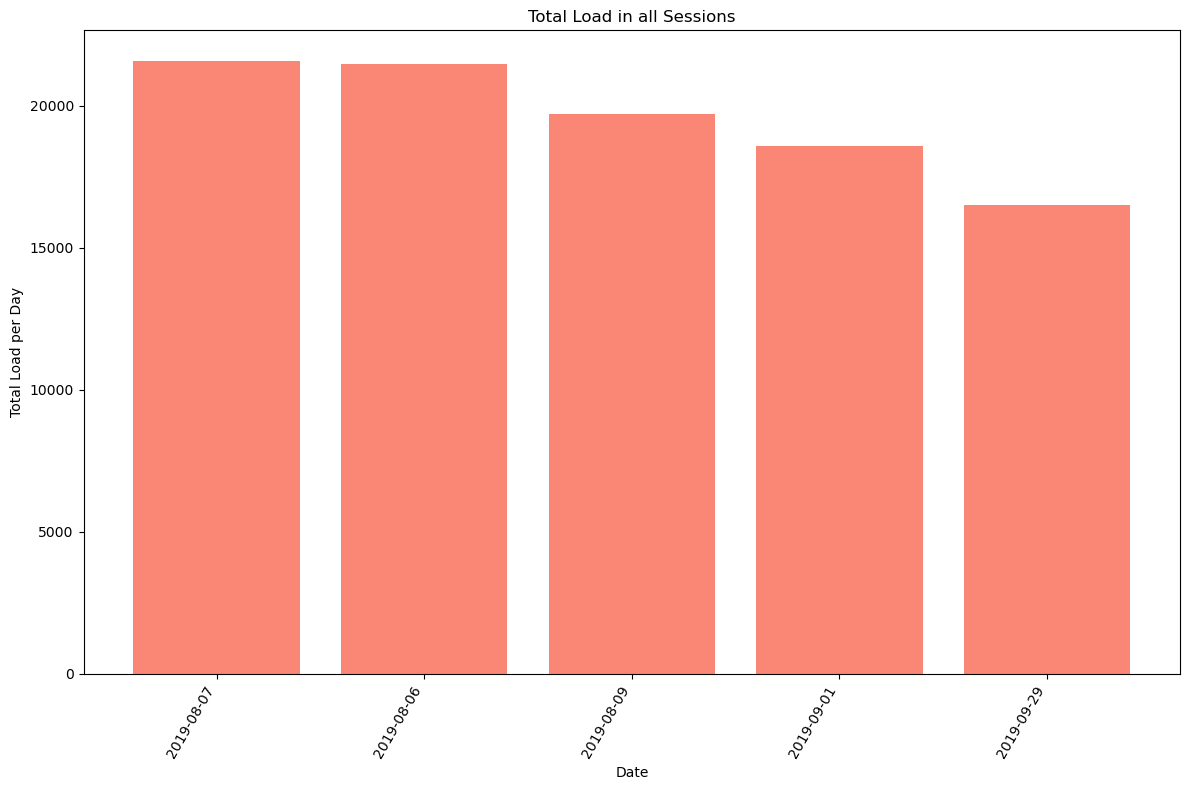

<Figure size 640x480 with 0 Axes>

In [30]:
total_load_per_day_5 = total_load_per_day[:5]

plt.figure(figsize=(12, 8))
plt.bar(total_load_per_day_5['Date'], total_load_per_day_5['Total.Player.Load'], color='#FA8775')

plt.xlabel('Date')
plt.ylabel('Total Load per Day')
plt.title('Total Load in all Sessions')

plt.xticks(rotation=60, ha='right')

plt.tight_layout()

plt.show()

plt.savefig('Images/Total_Load_per_Day_5.png')

**Note**: *Keep in mind that game days demand a lot of effort from those playing, but in this case, we are summing the values for the entire team. In relation to this, the fourth and fifth highest player load for the team occurred on game days (September 1st and September 29th, respectively), and there was an almost equally high player load despite the session duration on those game days being much shorter.*